In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

# Load the dataset
data = pd.read_csv("Data.csv")

print(data.head())


   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day  month  duration  campaign  pdays  previous poutcome   y  
0  cellular    19   oct        79         1     -1         0  unknown  no  
1  cellular    11   may       220         1    339         4  failure  no  
2  cellular    16   apr       185         1    330         1  failure  no  
3   unknown     3   jun       199         4     -1         0  unknown      
4   unknown     5   may       226         1     -1         0  unknown  no  


In [2]:
data = data.rename(columns={'y': 'state'})
data = data[data['state'] != ' ']


print(data['state'].unique())


['no' 'yes']


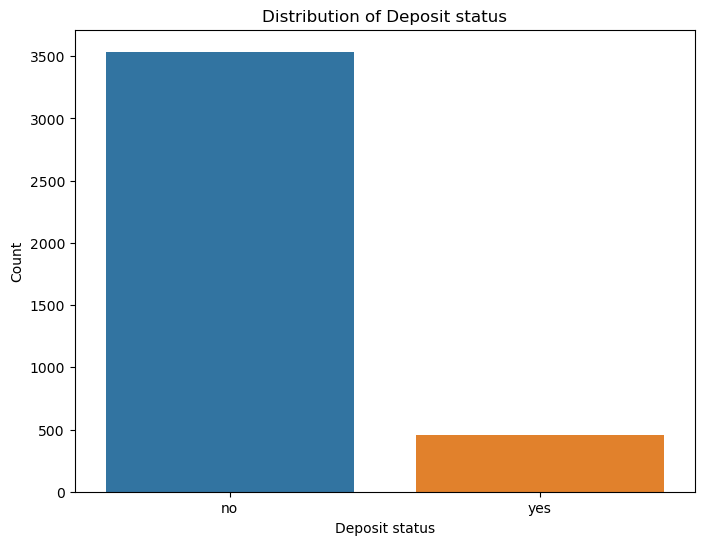

In [3]:
# Q1) Explore the distribution of the target variable ('status') to understand the class balance.
plt.figure(figsize=(8, 6))
sns.countplot(x='state', data=data)
plt.title('Distribution of Deposit status')
plt.xlabel('Deposit status')
plt.ylabel('Count')
plt.show()

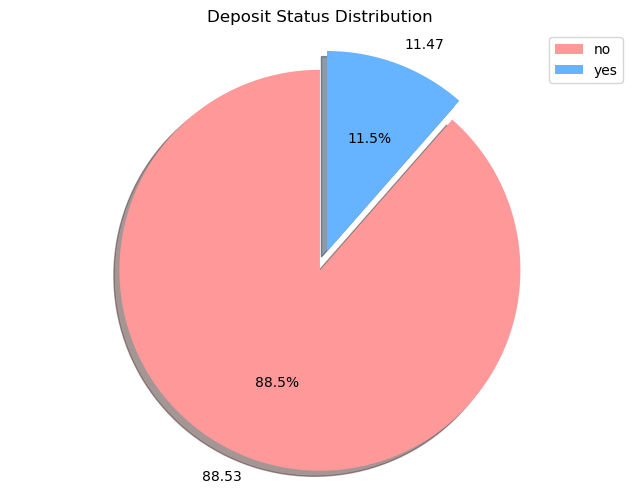

In [4]:
import matplotlib.pyplot as plt

# Sample data
state_counts = [len(data[data['state'] == 'no']), len(data[data['state'] == 'yes'])]
labels = ['no', 'yes']

# Get percentage of each value
percentages = [round(count / len(data['state']) * 100, 2) for count in state_counts]

# Define colors
colors = ['#ff9999', '#66b3ff']

# Explode the 'yes' slice
explode = (0, 0.1)

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(state_counts, labels=percentages, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True)
plt.title('Deposit Status Distribution')
plt.legend(labels, loc='upper right')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [5]:
print(state_counts)

[3536, 458]


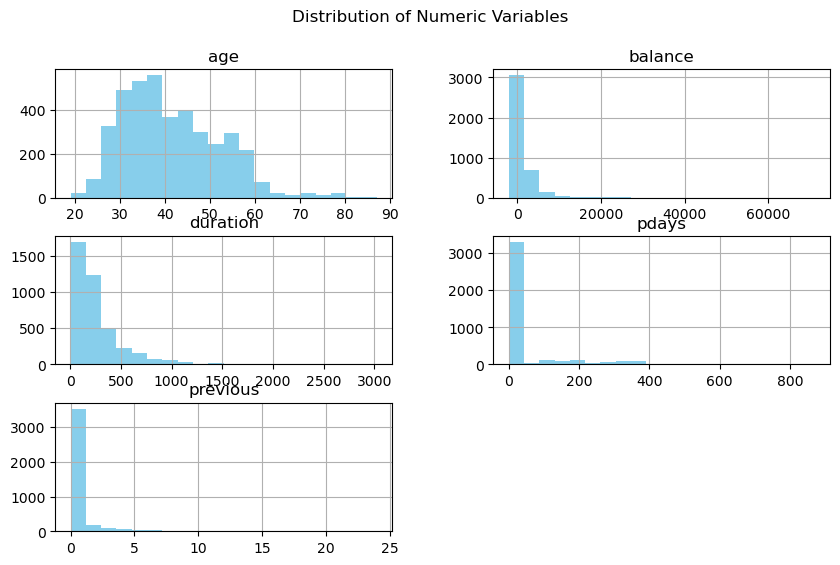

In [6]:
# Q2) Create histograms or density plots to visualize the distribution of numeric variables like 'age', 'balance', 'duration', etc.
numeric_vars = ['age', 'balance', 'duration', 'pdays', 'previous']
data[numeric_vars].hist(figsize=(10, 6), bins=20, color='skyblue')
plt.suptitle('Distribution of Numeric Variables')
plt.show()

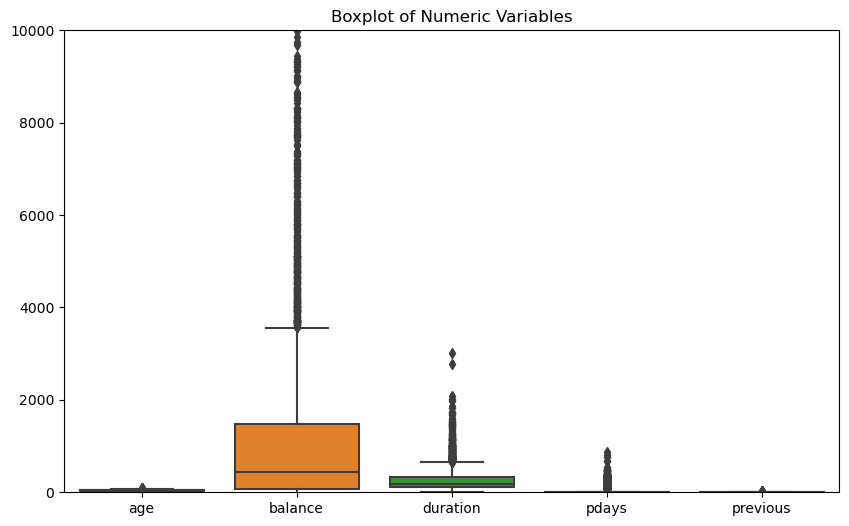

In [7]:
# Q3) Use boxplots to identify any potential outliers in numeric variables.


plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numeric_vars])
plt.title('Boxplot of Numeric Variables')
plt.ylim(0, 10000)  # Set the y-axis limits
plt.show()


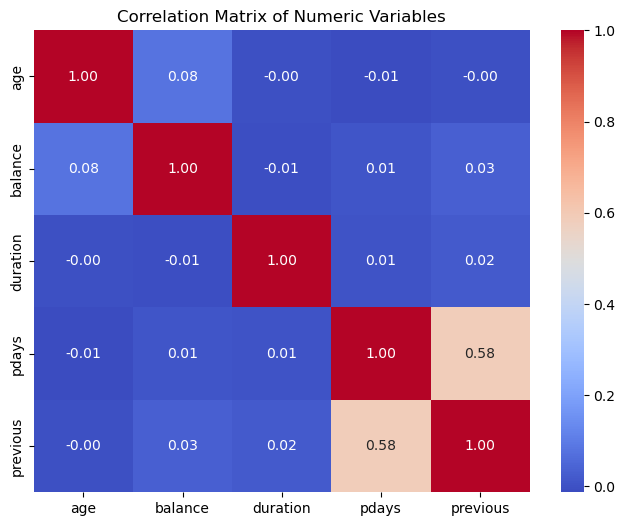

In [8]:
# Q4) Analyze the correlation between numeric variables using a correlation matrix and visualize it using a heatmap.
correlation_matrix = data[numeric_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

In [9]:
correlation_matrix

age   balance  duration     pdays  previous
age       1.000000  0.079163 -0.004494 -0.012874 -0.004047
balance   0.079163  1.000000 -0.008794  0.010599  0.031914
duration -0.004494 -0.008794  1.000000  0.006088  0.019063
pdays    -0.012874  0.010599  0.006088  1.000000  0.584997
previous -0.004047  0.031914  0.019063  0.584997  1.000000

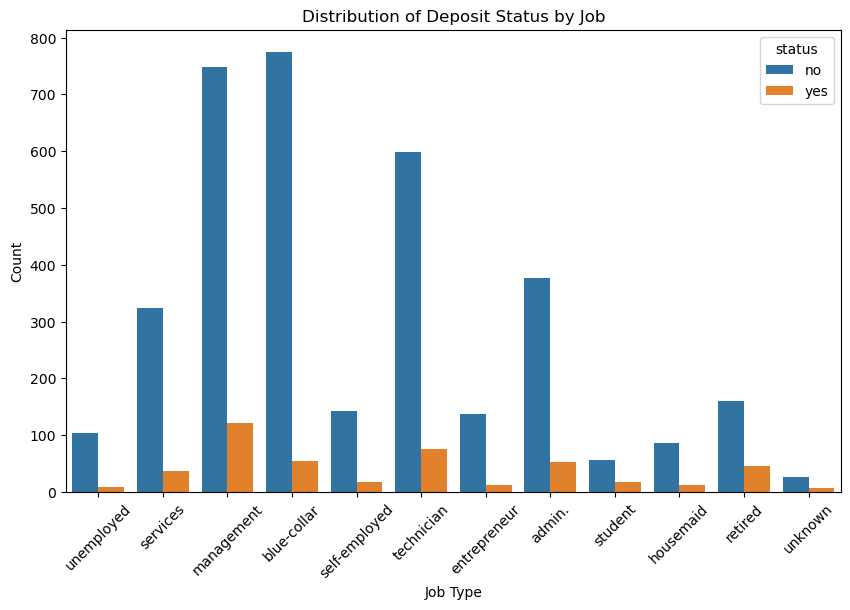

In [10]:
# Q5) Explore the relationship between categorical variables and the target variable using stacked bar plots or mosaic plots.
plt.figure(figsize=(10, 6))
sns.countplot(x='job', hue='state', data=data)
plt.title('Distribution of Deposit Status by Job')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='status')
plt.show()

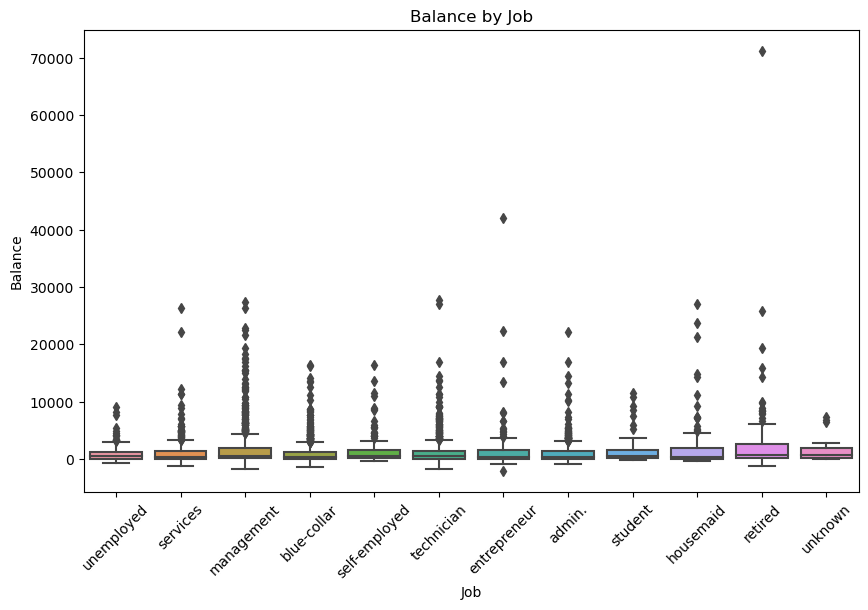

In [11]:
# Q6) Conduct bivariate analysis to understand the relationship between numeric and categorical variables using scatter plots or grouped boxplots.
plt.figure(figsize=(10, 6))
sns.boxplot(x='job', y='balance', data=data)
plt.title('Balance by Job')
plt.xlabel('Job')
plt.ylabel('Balance')
plt.xticks(rotation=45)
plt.show()

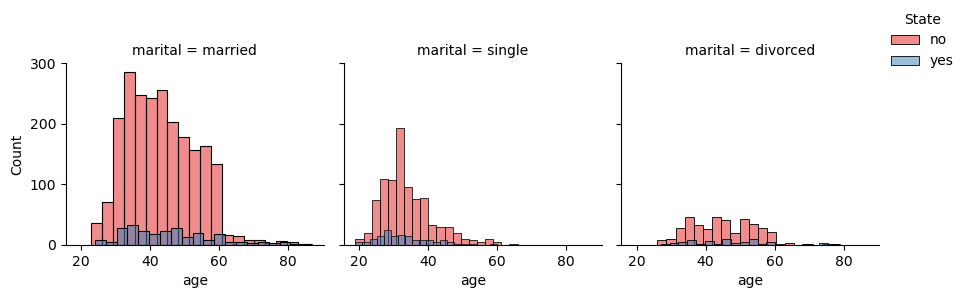

In [12]:
# Q7) Use facet grids or small multiples to compare the distribution of variables across different categories.
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette
custom_palette = sns.color_palette("Set1")

# Create the facet grid plot
g = sns.FacetGrid(data, col='marital', hue='state', palette=custom_palette)

# Map the histograms with adjusted transparency
g.map(sns.histplot, 'age', bins=20, alpha=0.5)  # Adjust alpha to control transparency

# Add legend and adjust legend position
g.add_legend(title='State', loc='upper right')

# Adjust spacing to prevent overlap with legend
plt.subplots_adjust(top=0.8)

# Show the plot
plt.show()


In [13]:
# Q8) Create pivot tables or contingency tables to calculate frequencies and proportions of categorical variables.
pivot_table = pd.pivot_table(data, index='job', columns='marital', values='state', aggfunc='count', margins=True, margins_name='Total')
print("Pivot Table:")
print(pivot_table)

Pivot Table:
marital        divorced  married  single  Total
job                                            
admin.             61.0    238.0   131.0    430
blue-collar        66.0    607.0   156.0    829
entrepreneur       11.0    123.0    16.0    150
housemaid          10.0     76.0    12.0     98
management        112.0    494.0   263.0    869
retired            37.0    160.0     8.0    205
self-employed      12.0    113.0    35.0    160
services           45.0    214.0   101.0    360
student             NaN      8.0    66.0     74
technician         81.0    362.0   231.0    674
unemployed         19.0     64.0    29.0    112
unknown             1.0     26.0     6.0     33
Total             455.0   2485.0  1054.0   3994


Summary Statistics:
               age       balance         day      duration     campaign  \
count  3994.000000   3994.000000  3994.000000  3994.000000  3994.000000   
mean     41.208312   1414.931647    15.912619   261.953681     2.781422   
std      10.585001   3016.066443     8.202369   258.893158     3.085077   
min      19.000000  -2082.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    445.500000    16.000000   184.000000     2.000000   
75%      49.000000   1468.500000    21.000000   325.750000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  3994.000000  3994.000000  
mean     39.415123     0.540310  
std      99.585572     1.651901  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    24.000000 

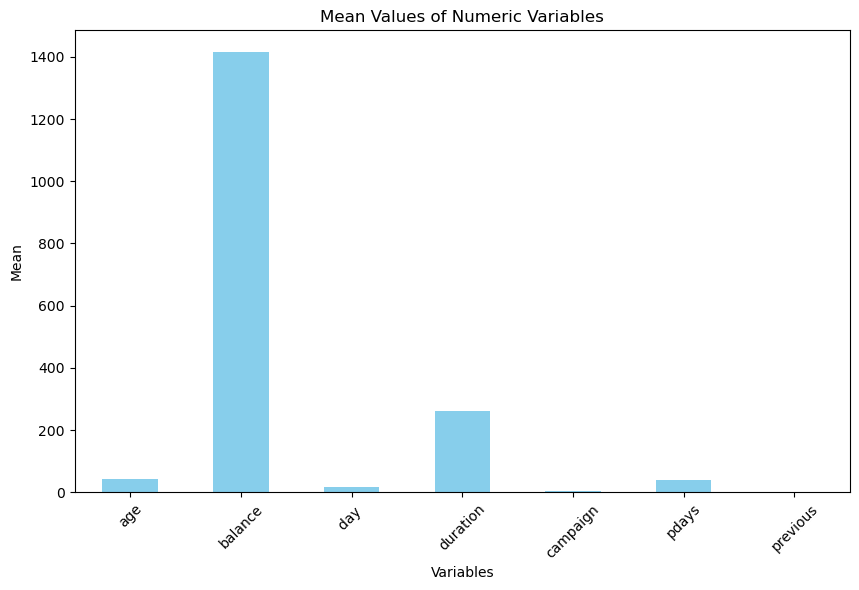

In [14]:
# Q9) Calculate summary statistics and visualize them using summary tables or bar plots.
summary_stats = data.describe()
print("Summary Statistics:")
print(summary_stats)


plt.figure(figsize=(10, 6))
summary_stats.loc['mean'].plot(kind='bar', color='skyblue')
plt.title('Mean Values of Numeric Variables')
plt.xlabel('Variables')
plt.ylabel('Mean')
plt.xticks(rotation=45)
plt.show()

In [15]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# # Let's assume 'y' is our target variable
# X = data.drop(columns=['state'])
# y = data['state']

# X_encoded = pd.get_dummies(X)  # One-hot encoding for categorical variables

# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# logreg_model = LogisticRegression(max_iter=1000)
# logreg_model.fit(X_train, y_train)
# y_pred = logreg_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Logistic Regression Accuracy:", accuracy)


In [16]:
# # Q12) Evaluate model performance using metrics such as accuracy, precision, recall, and ROC curves.
# from sklearn.metrics import classification_report, roc_auc_score

# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# # Calculate ROC AUC score
# roc_auc = roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:, 1])
# print("ROC AUC Score:", roc_auc)

In [17]:
# # Q13) Interpret model coefficients or feature importance to identify factors influencing subscription decisions.
# coefficients = pd.DataFrame({'Variable': X_encoded.columns, 'Coefficient': logreg_model.coef_[0]})
# print("Model Coefficients:")
# print(coefficients)


In [18]:
# Q15) Use clustering techniques (e.g., k-means clustering) to segment customers based on demographic and behavioral attributes.
from sklearn.cluster import KMeans

# Example: Using only numeric variables for clustering
X_cluster = data[['age', 'balance', 'duration']]

kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X_cluster)

cluster_counts = data['cluster'].value_counts().reset_index().rename(columns={'index': 'Cluster', 'cluster': 'Count'})
print(cluster_counts)


   Cluster  Count
0        0   3437
1        1    499
2        2     58


In [19]:
# Grouping data by cluster and calculating summary statistics
cluster_summary = data.groupby('cluster').agg({'balance': ['min', 'max', 'mean'], 'duration': ['min', 'max', 'mean']})

# Renaming columns for clarity
cluster_summary.columns = ['Min Balance', 'Max Balance', 'Avg Balance', 'Min Duration', 'Max Duration', 'Avg Duration']

# Displaying the tabulated summary
print(cluster_summary)

         Min Balance  Max Balance   Avg Balance  Min Duration  Max Duration  \
cluster                                                                       
0              -2082         2929    556.972069             4          3025   
1               2934        11971   5304.444890             5          2769   
2              12186        71188  18793.206897             8           654   

         Avg Duration  
cluster                
0          260.111143  
1          282.284569  
2          196.224138  


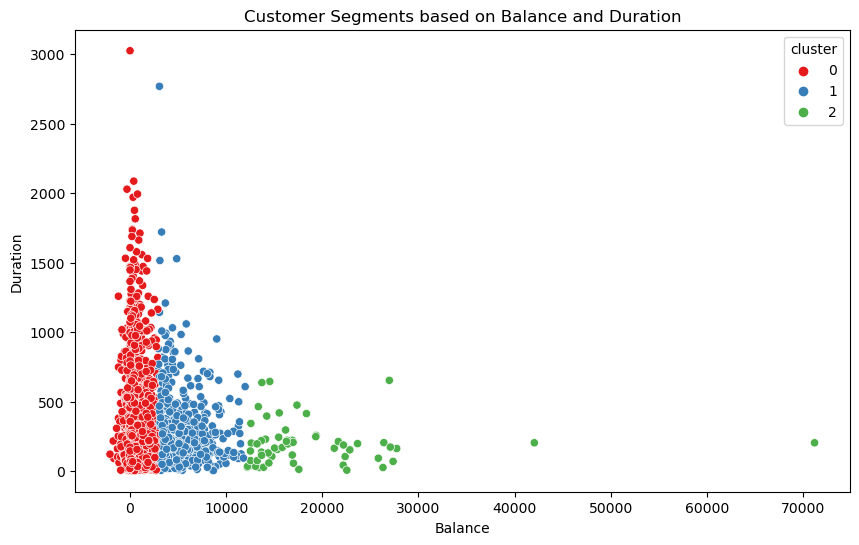

In [20]:
# Q16) Visualize customer segments using cluster profiles or silhouette plots.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='balance', y='duration', hue='cluster', data=data, palette='Set1', legend='full')
plt.title('Customer Segments based on Balance and Duration')
plt.xlabel('Balance')
plt.ylabel('Duration')
plt.show()



#balance duration status -> scatterplot

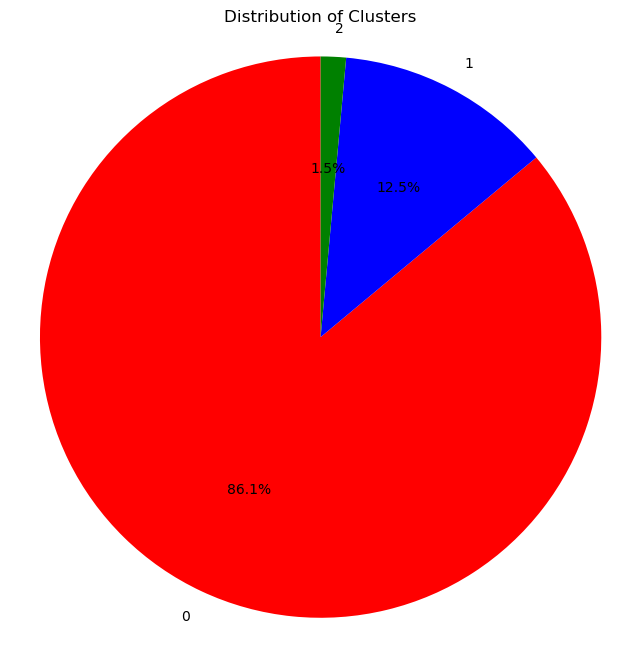

In [21]:
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts['Count'], labels=cluster_counts['Cluster'], autopct='%1.1f%%', startangle=90, colors=['red', 'blue', 'green'])
plt.title('Distribution of Clusters')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [22]:
# made data copies for self reference
data1 = data.copy()
data2 = data.copy()

data1.dropna(inplace=True)
data1.drop(columns=['cluster'], inplace=True)
data1.reset_index(drop=True, inplace=True)

print(data1.head(5))
print(data1.state.value_counts().to_frame())



   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   59  blue-collar  married  secondary      no        0     yes   no   
4   35   management   single   tertiary      no      747      no   no   

    contact  day  month  duration  campaign  pdays  previous poutcome state  
0  cellular    19   oct        79         1     -1         0  unknown    no  
1  cellular    11   may       220         1    339         4  failure    no  
2  cellular    16   apr       185         1    330         1  failure    no  
3   unknown     5   may       226         1     -1         0  unknown    no  
4  cellular    23   feb       141         2    176         3  failure    no  
     state
no    3536
yes    458


In [23]:
#filter for yes status

data_yes = data1[data1['state'] != 'no']
data_no = data1[data1['state'] != 'yes']



In [24]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier


# Separate features and target variable
X = data1.drop(columns=['state'])
y = data1['state']

# Convert categorical variables to numeric using one-hot encoding
X_encoded = pd.get_dummies(X)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_encoded, y)

# Get feature importance scores
feature_importance = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': rf_model.feature_importances_})

# Select the top 15 most important features
top_features_rf = feature_importance.nlargest(10, 'Importance')

# Print the top 15 most important features
print("Top 15 Most Important Features (Random Forest):")
print(top_features_rf)


Top 15 Most Important Features (Random Forest):
             Feature  Importance
3           duration    0.248141
0                age    0.088185
1            balance    0.086962
2               day     0.082680
49  poutcome_success    0.047306
5              pdays    0.039440
4           campaign    0.038579
6           previous    0.023180
45         month_oct    0.016340
20   marital_married    0.013204


In [25]:
# plt.figure(figsize=(10, 8))  # Adjust figure size for better visualization
# plt.barh(top_features_rf['Feature'], top_features_rf['Importance'], color='skyblue', edgecolor='black')  # Customizing colors and adding edgecolor
# plt.xlabel('Feature Importance Score', fontsize=12)  # Adding x-axis label with fontsize
# plt.ylabel('Feature', fontsize=12)  # Adding y-axis label with fontsize
# plt.title('Top 15 Most Important Features (Random Forest)', fontsize=14)  # Adding title with fontsize
# plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
# plt.grid(axis='x', linestyle='--', alpha=0.7)  # Adding grid lines for better readability
# plt.xticks(fontsize=10)  # Adjusting tick labels fontsize for x-axis
# plt.yticks(fontsize=10)  # Adjusting tick labels fontsize for y-axis
# plt.tight_layout()  # Adjust layout to prevent overlap of labels
# plt.show()

In [26]:
# catagorical encoded columns

# Assuming 'data' is your DataFrame containing numeric variables
numeric_vars = ['age', 'balance', 'duration']  # Define the list of numeric variables

# Calculate correlation matrix
correlation_matrix = data1[numeric_vars].corr()

# Display correlation matrix
print(correlation_matrix)

               age   balance  duration
age       1.000000  0.079163 -0.004494
balance   0.079163  1.000000 -0.008794
duration -0.004494 -0.008794  1.000000


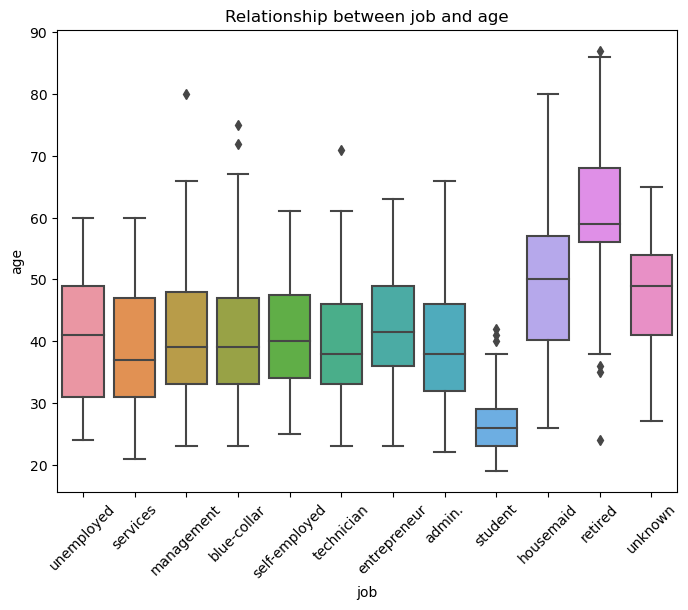

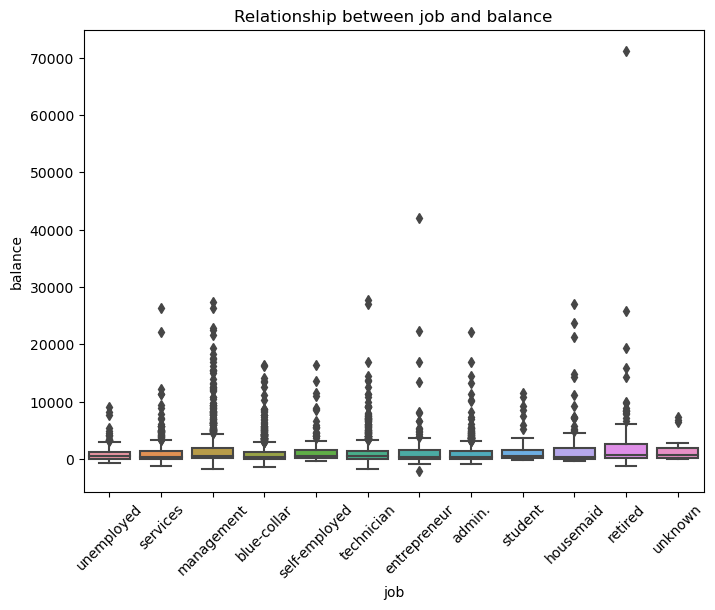

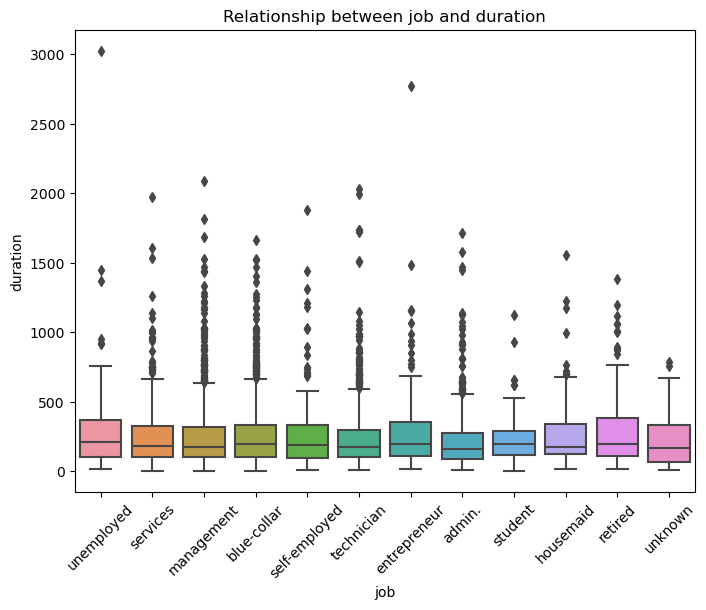

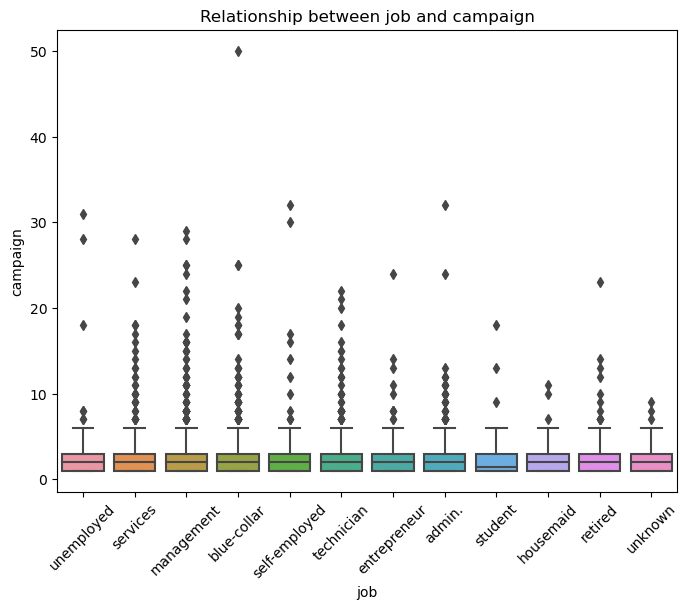

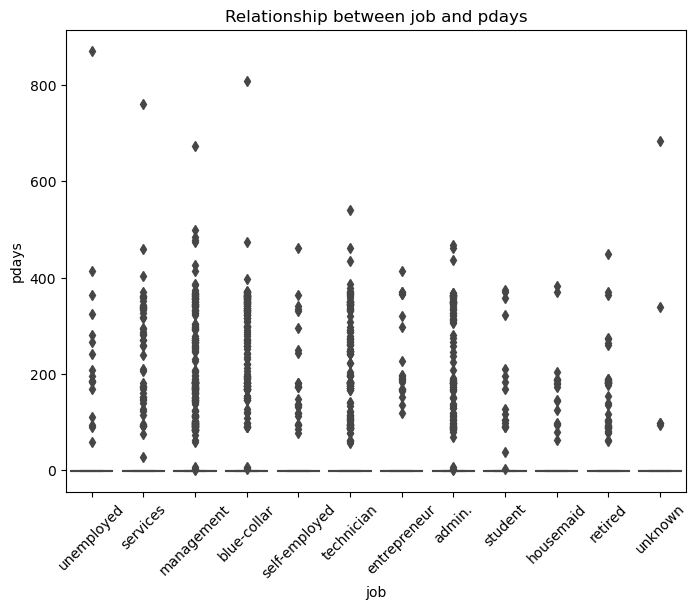

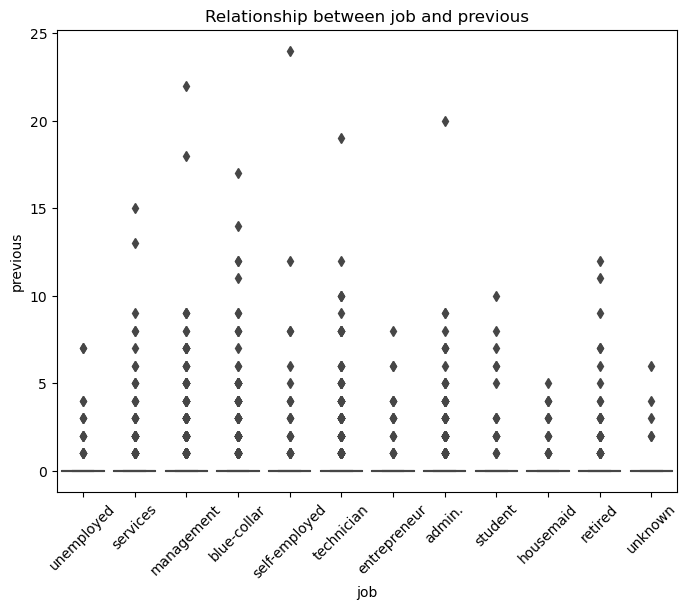

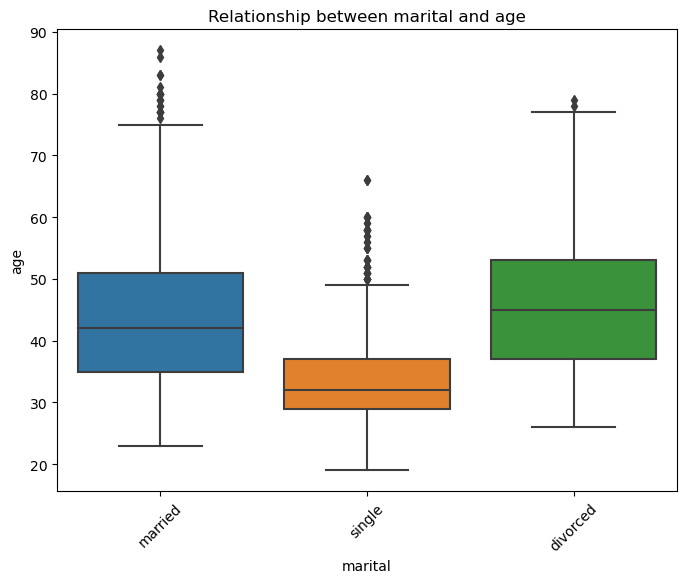

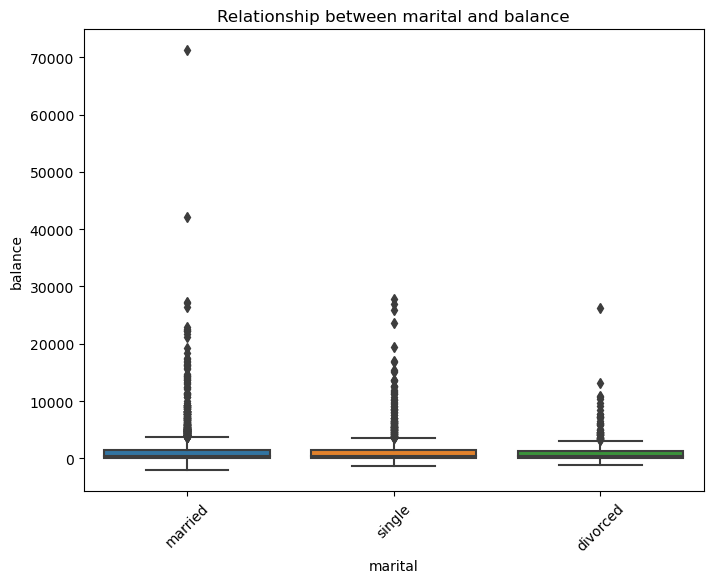

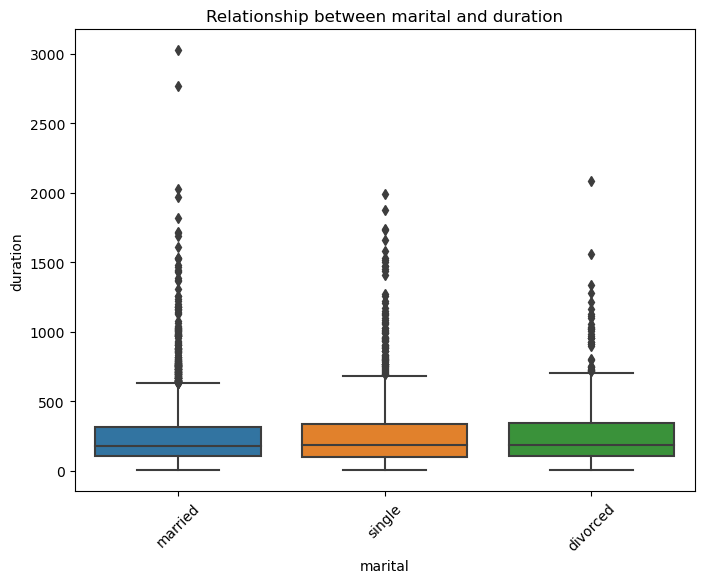

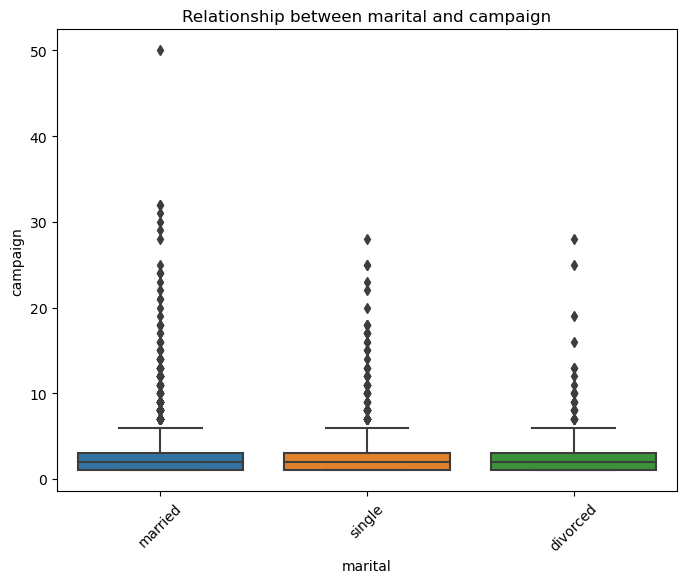

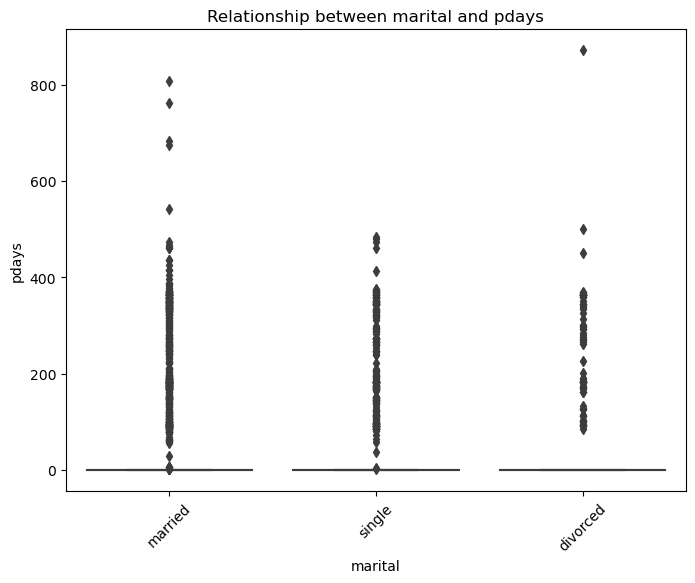

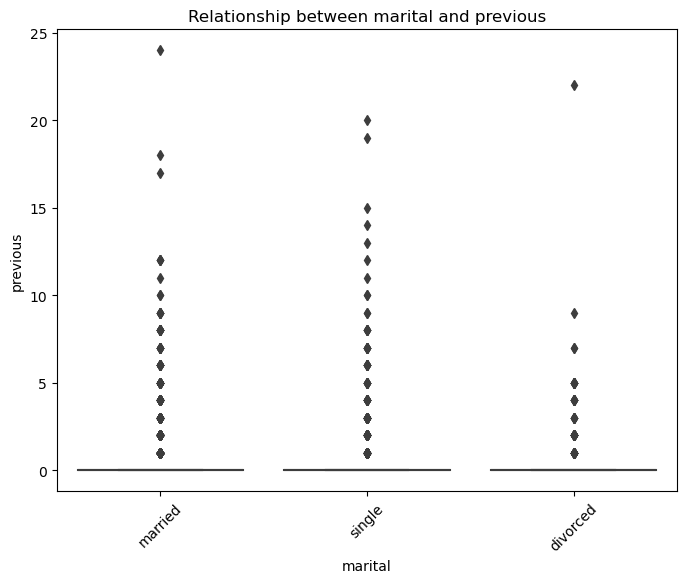

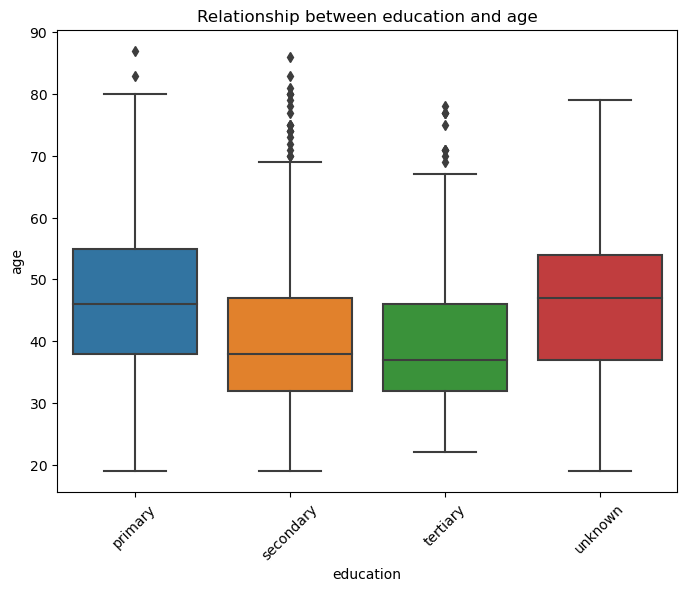

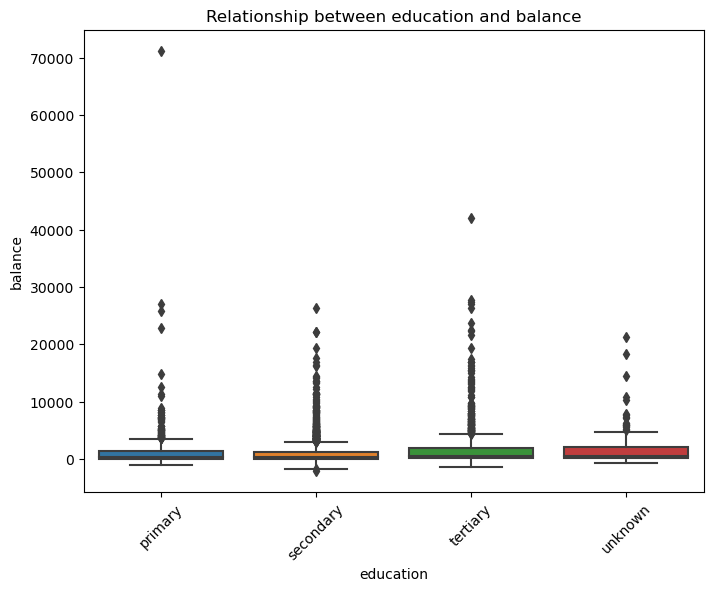

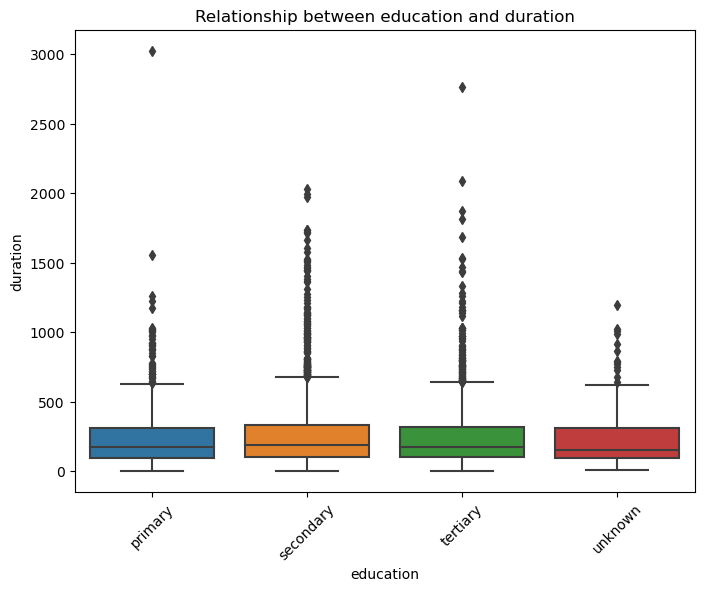

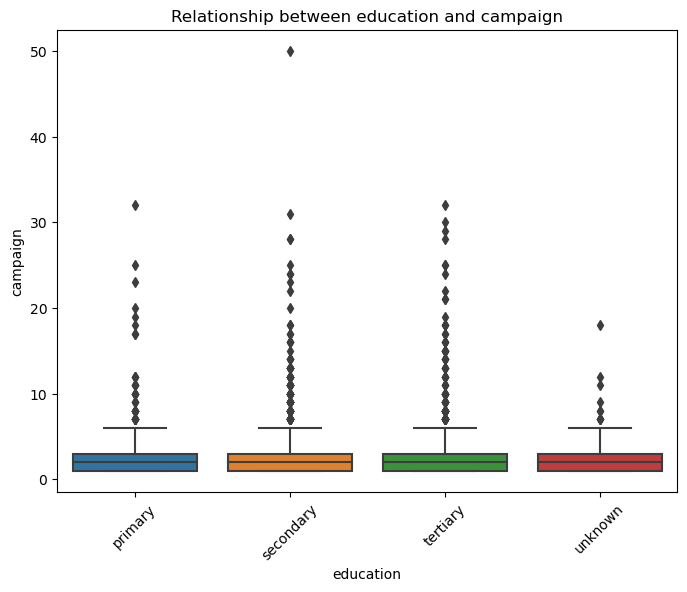

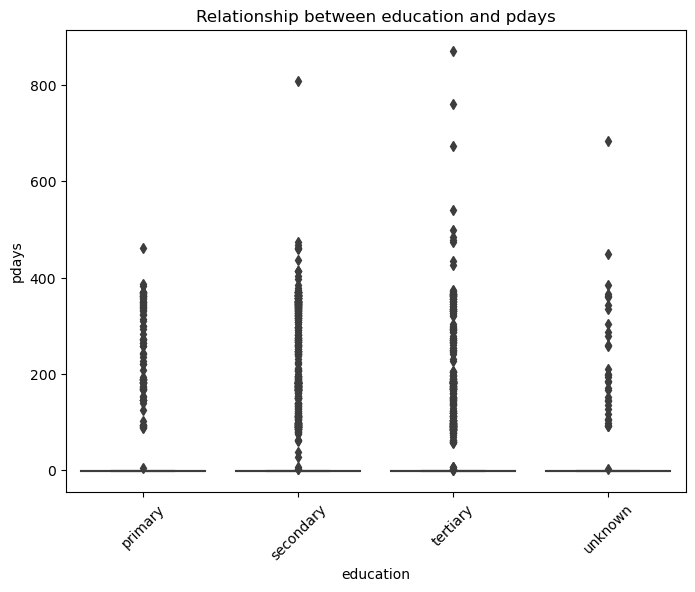

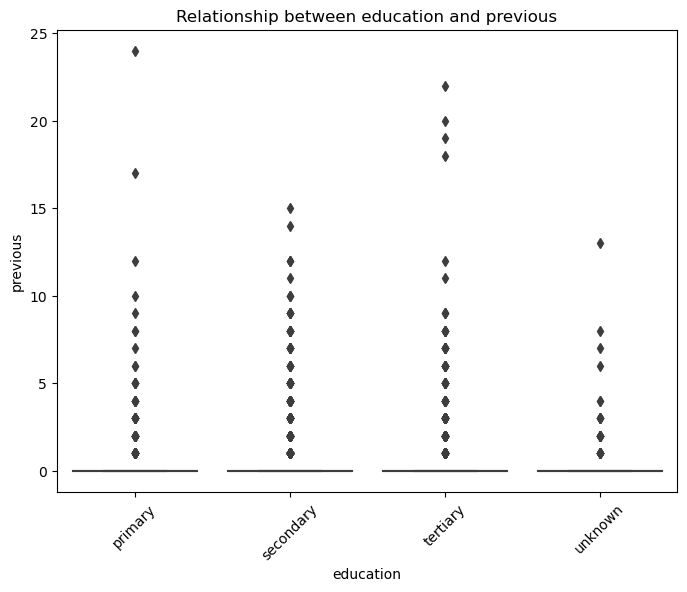

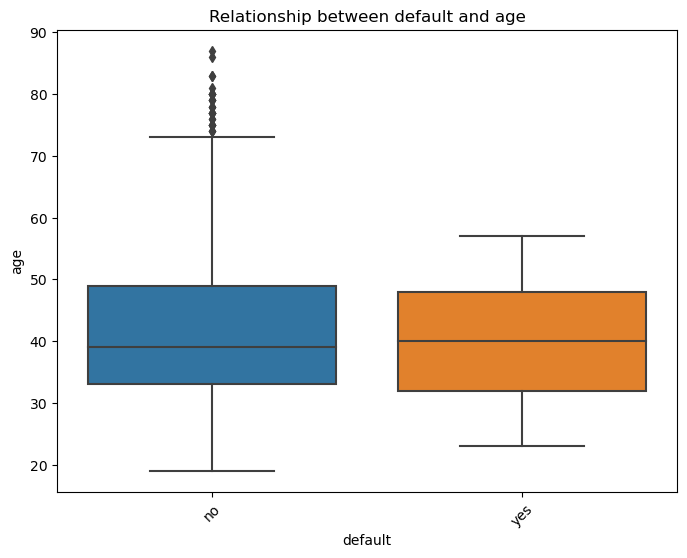

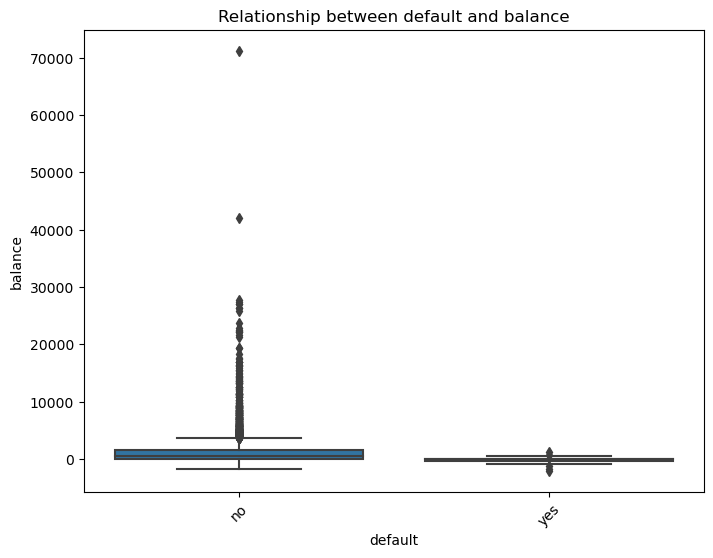

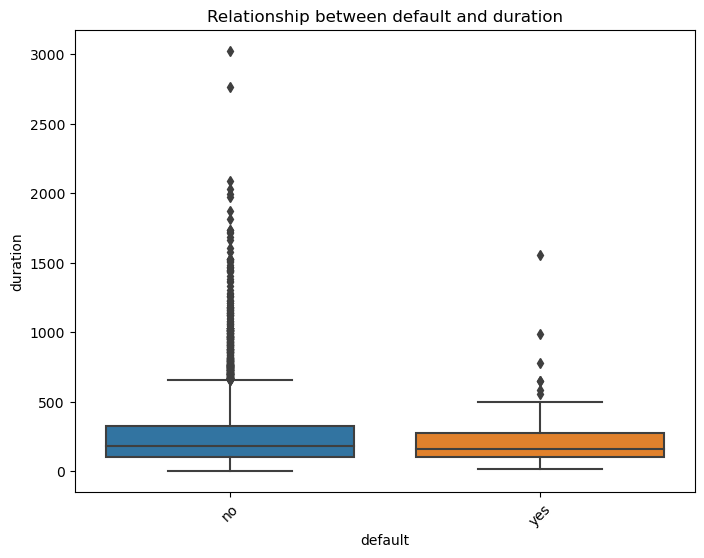

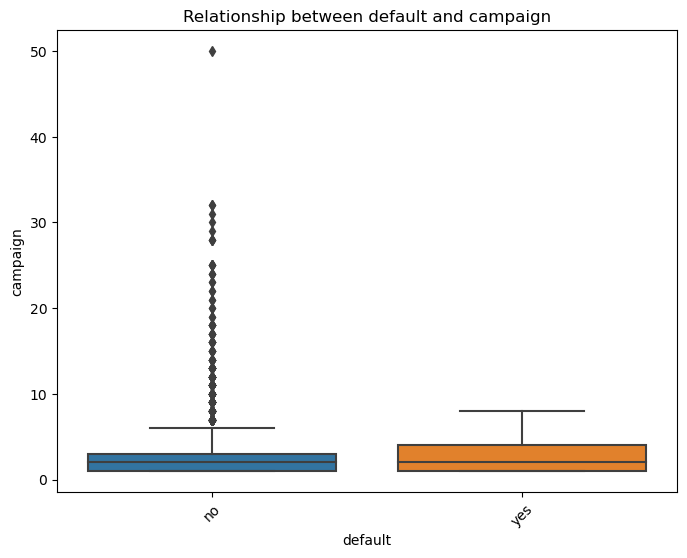

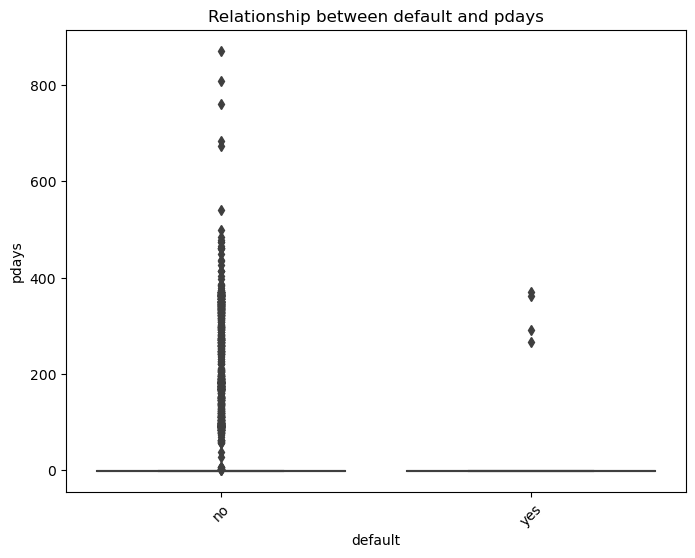

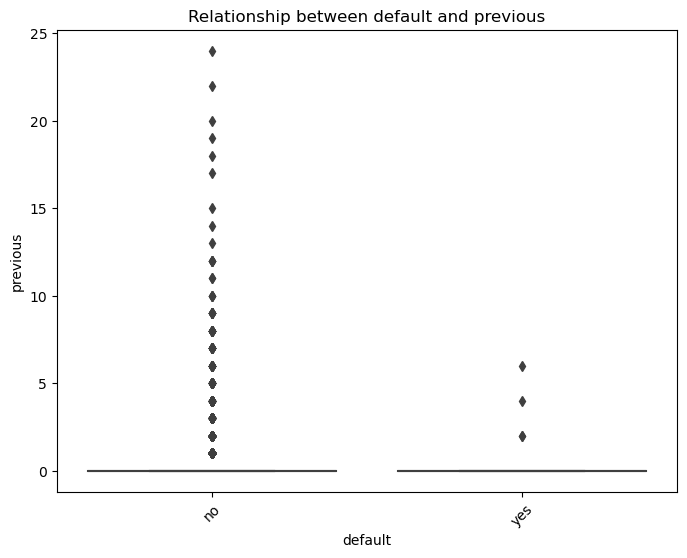

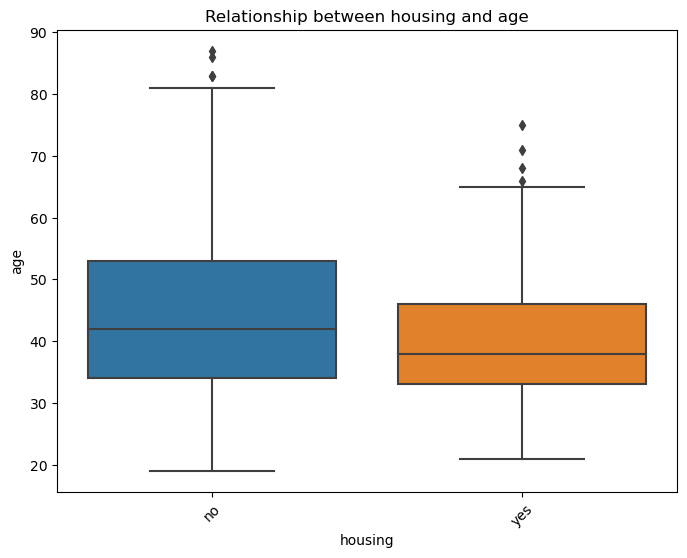

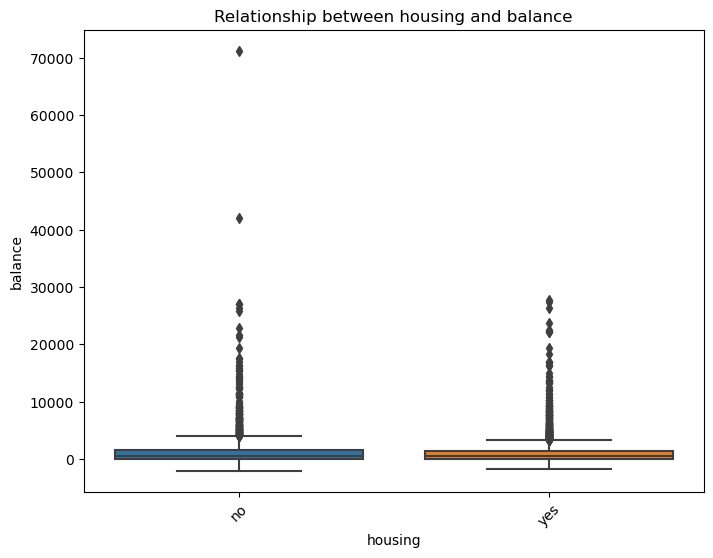

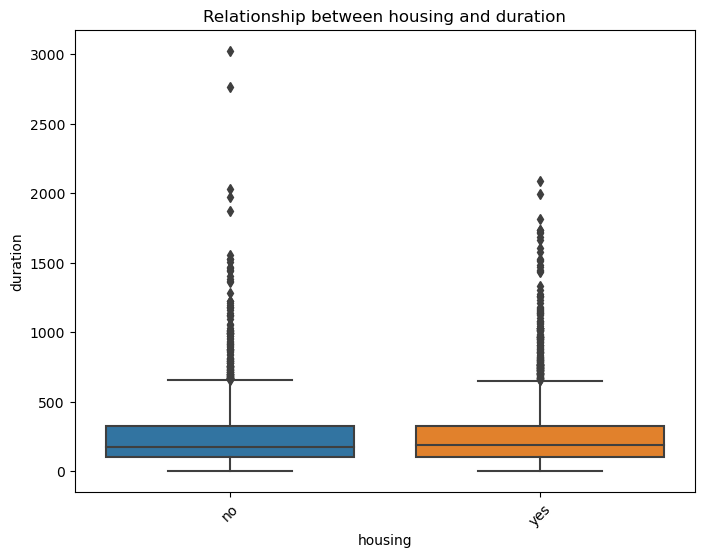

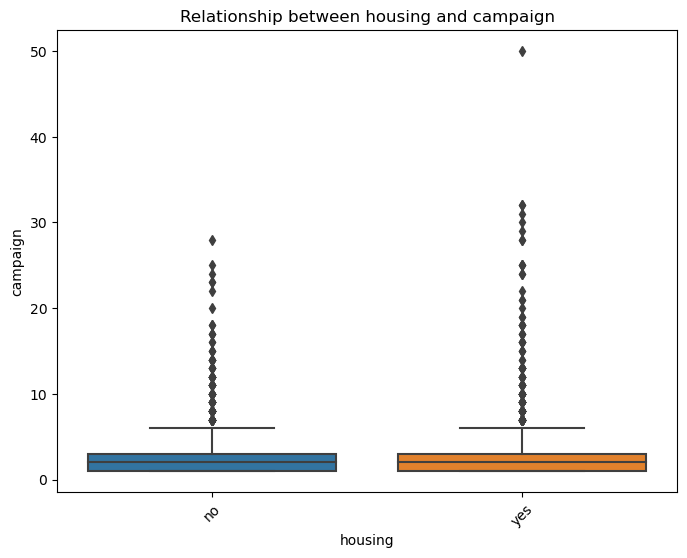

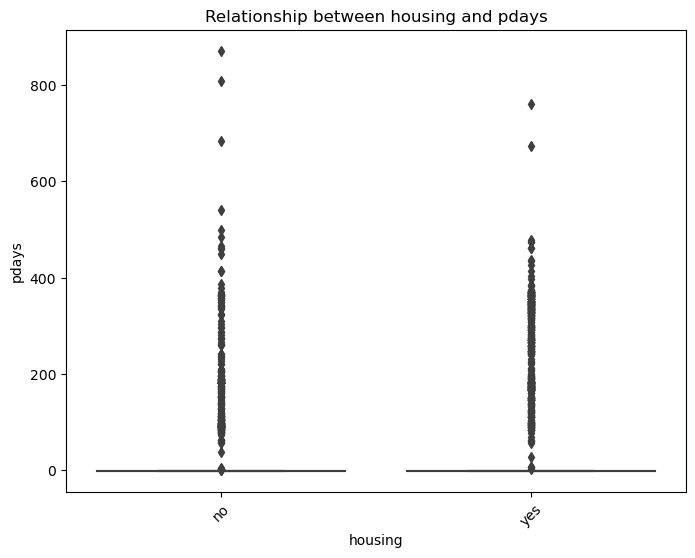

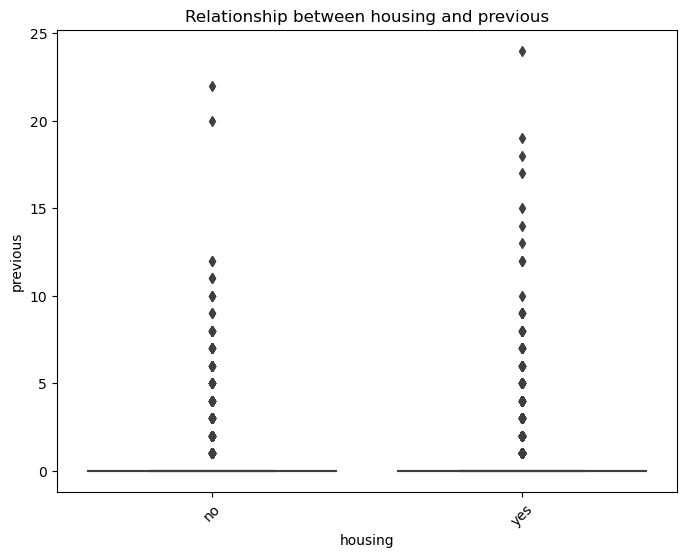

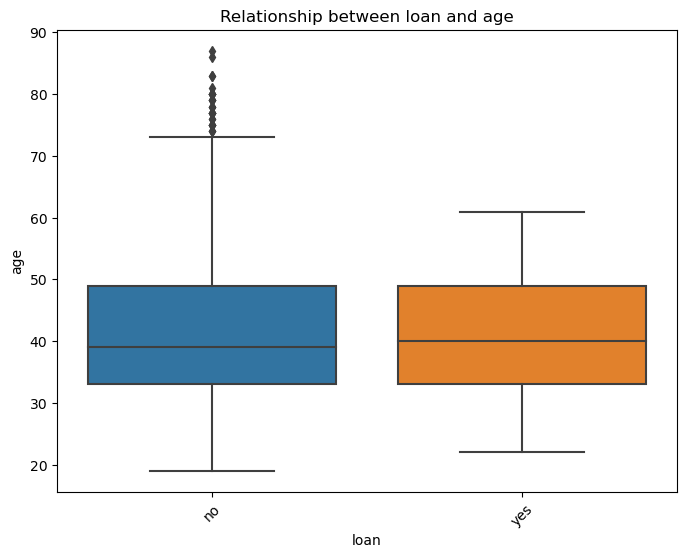

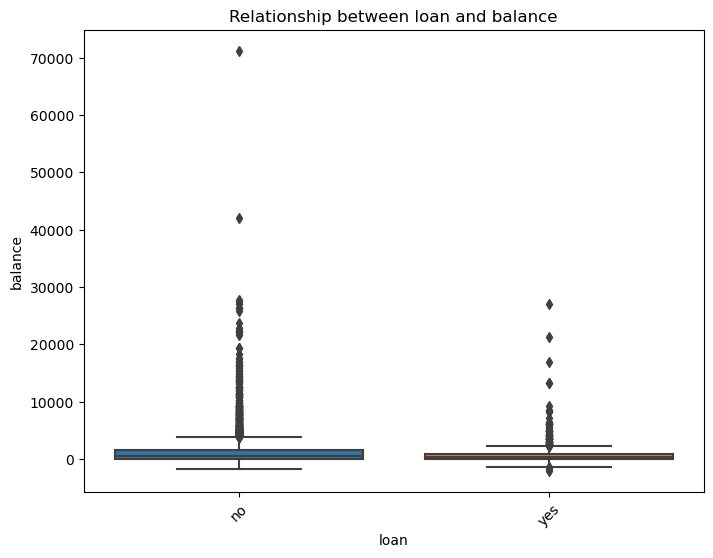

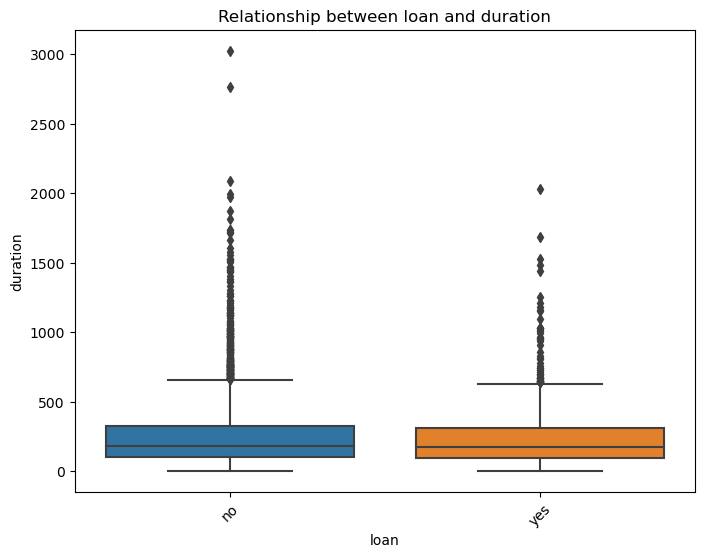

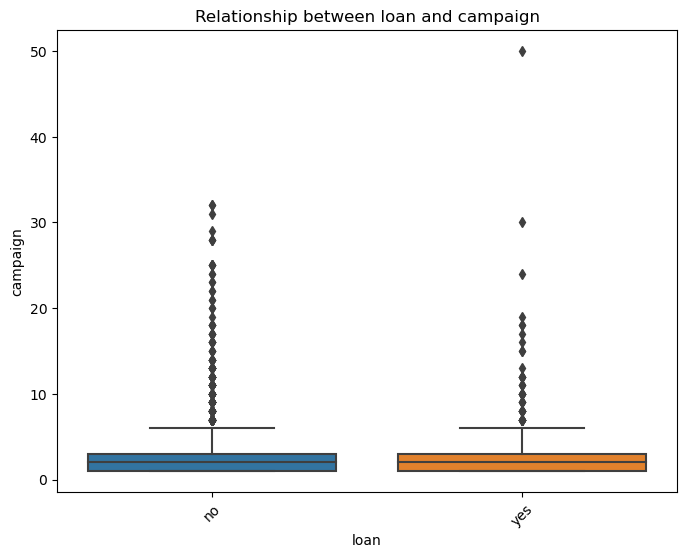

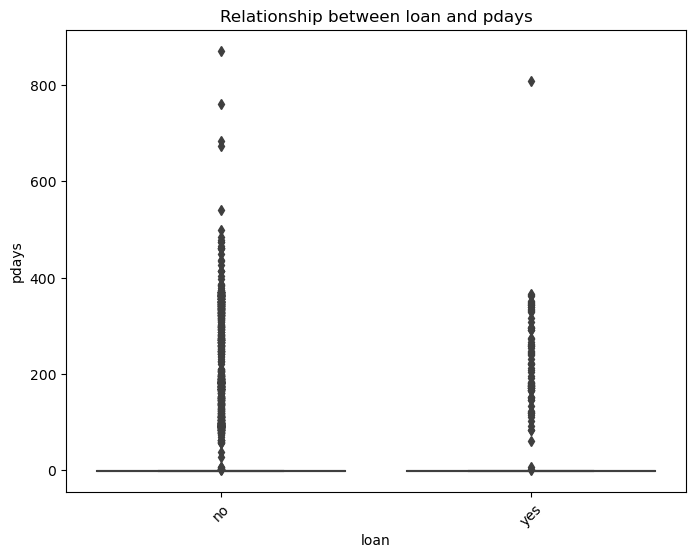

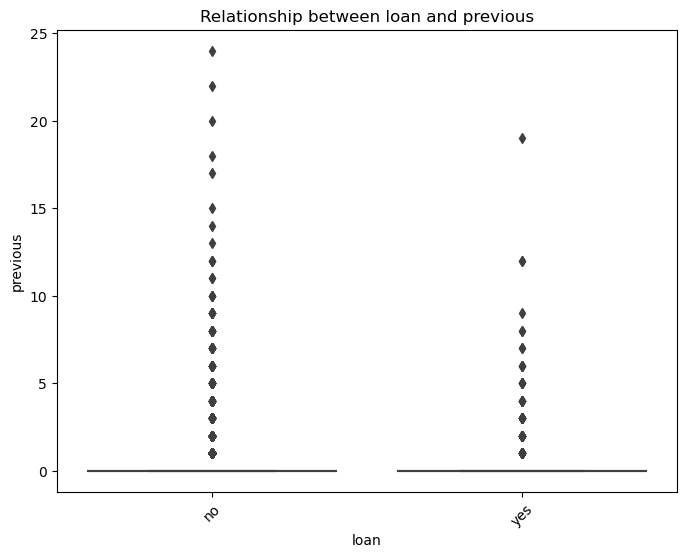

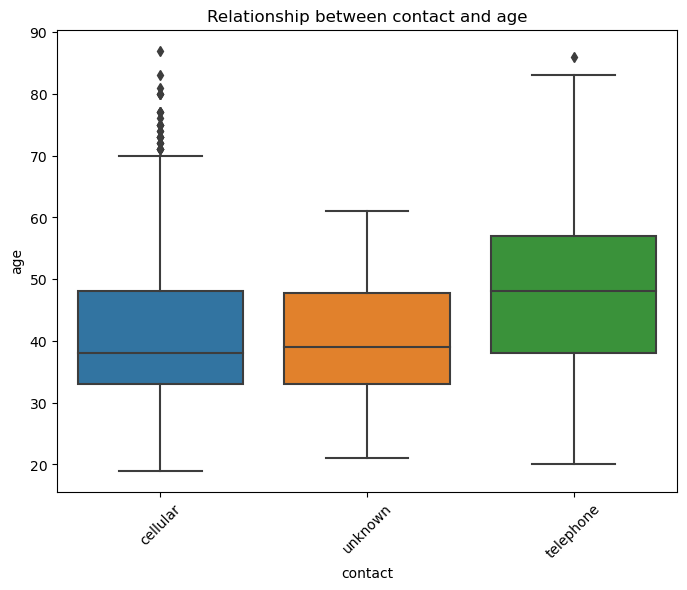

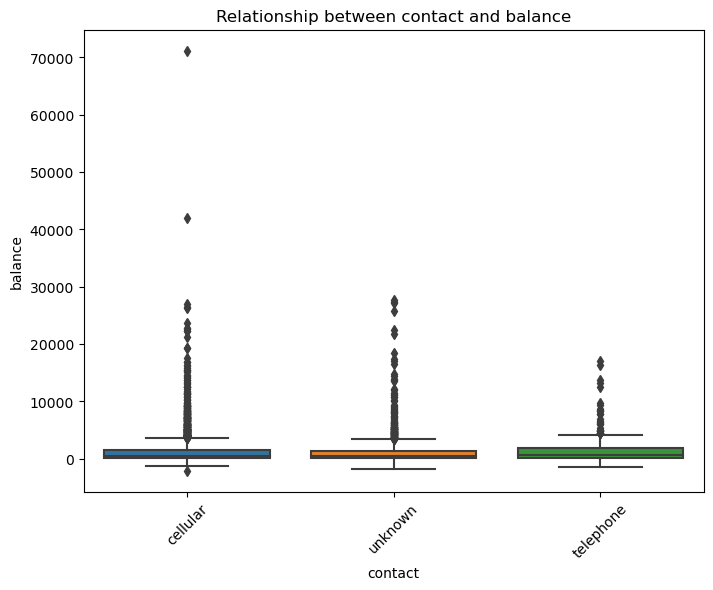

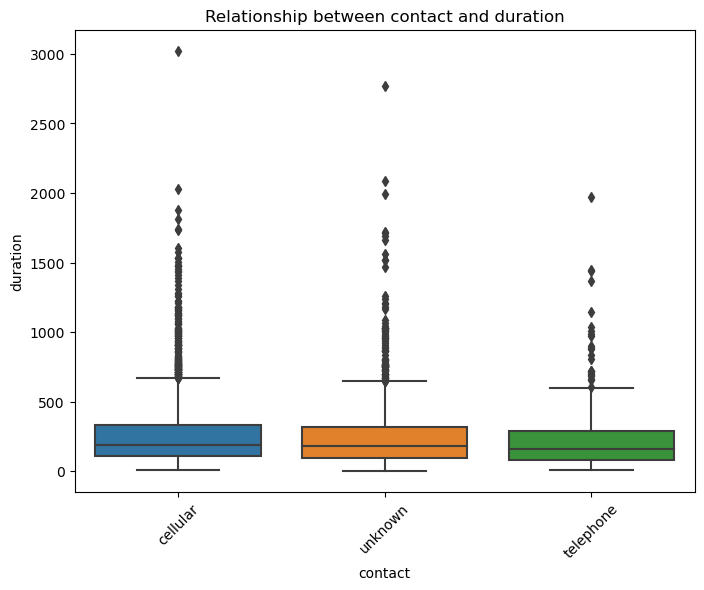

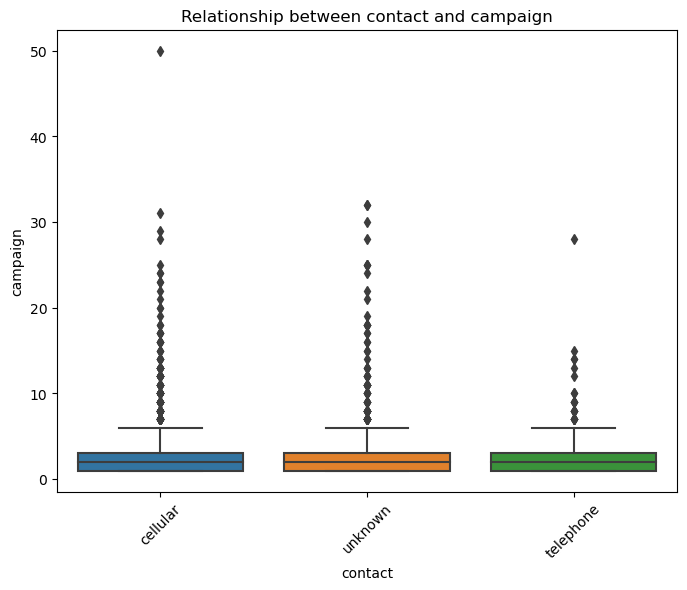

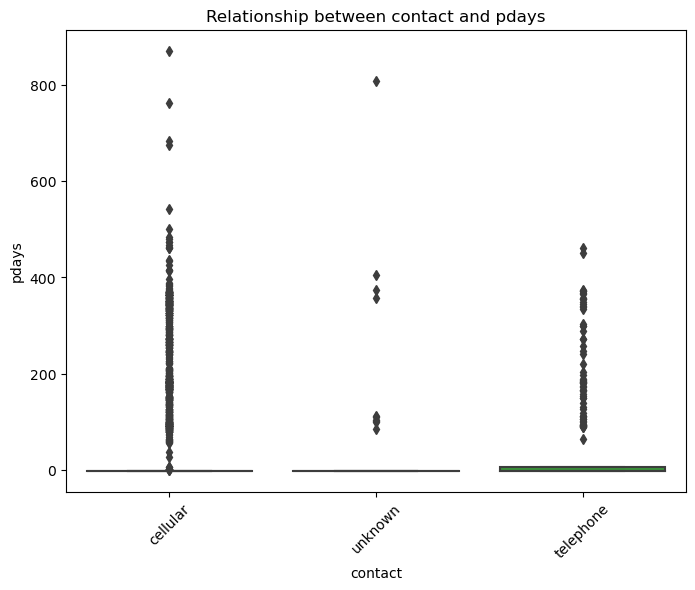

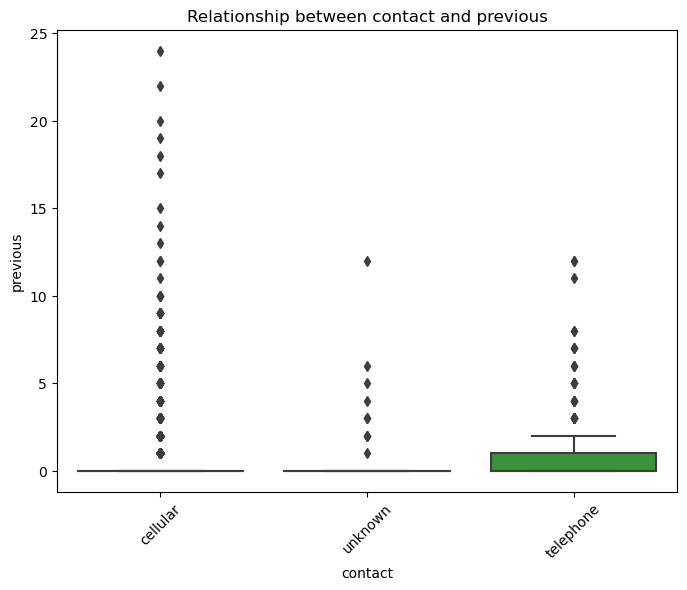

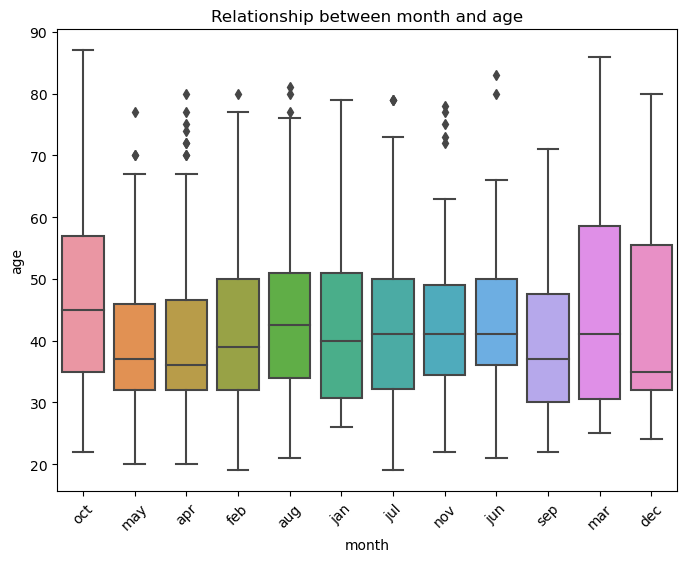

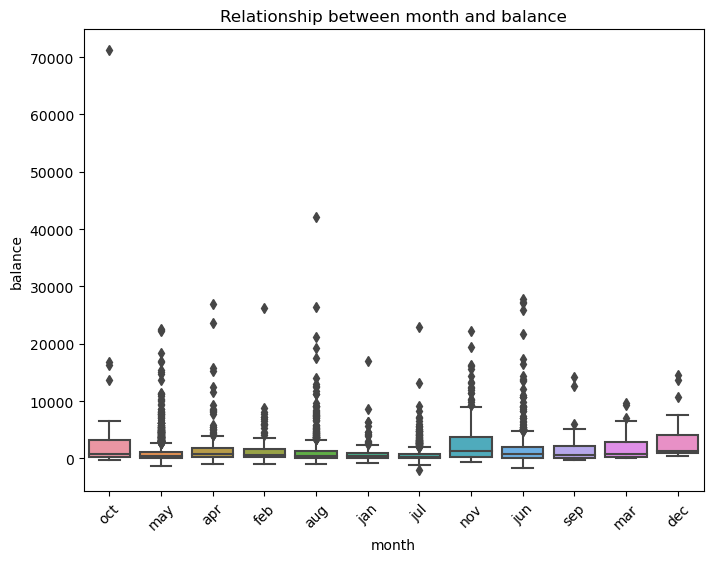

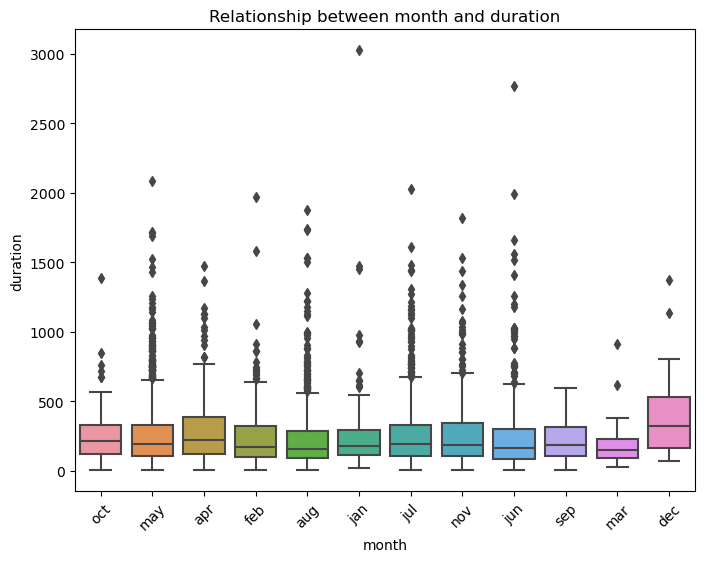

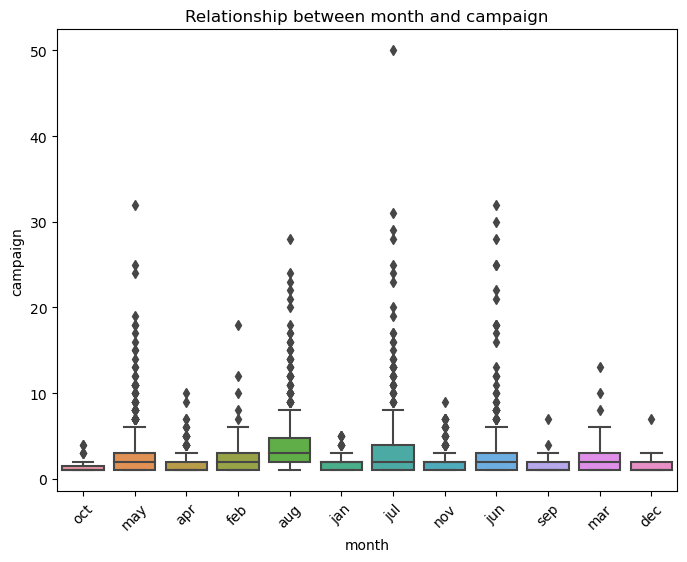

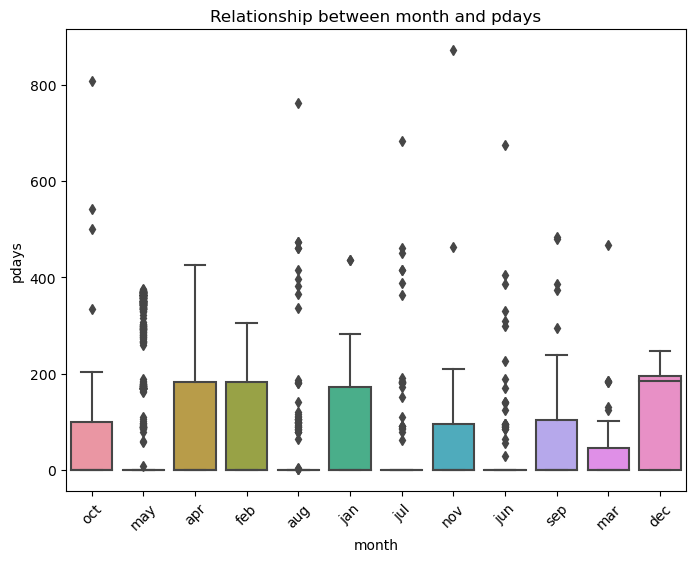

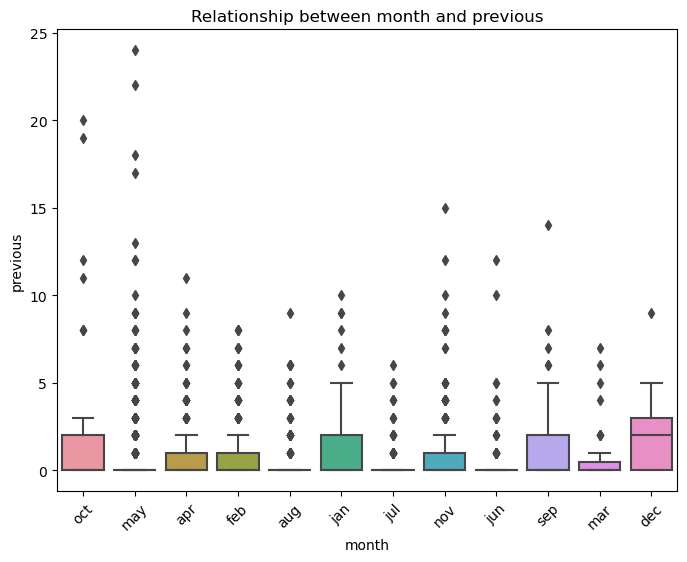

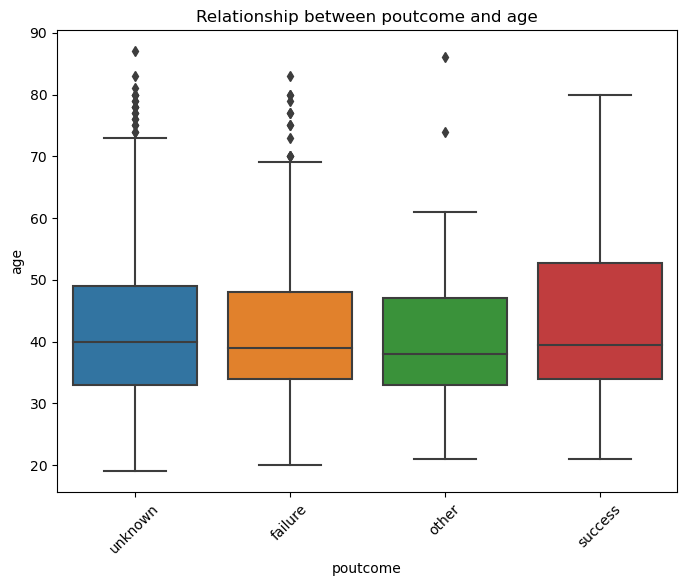

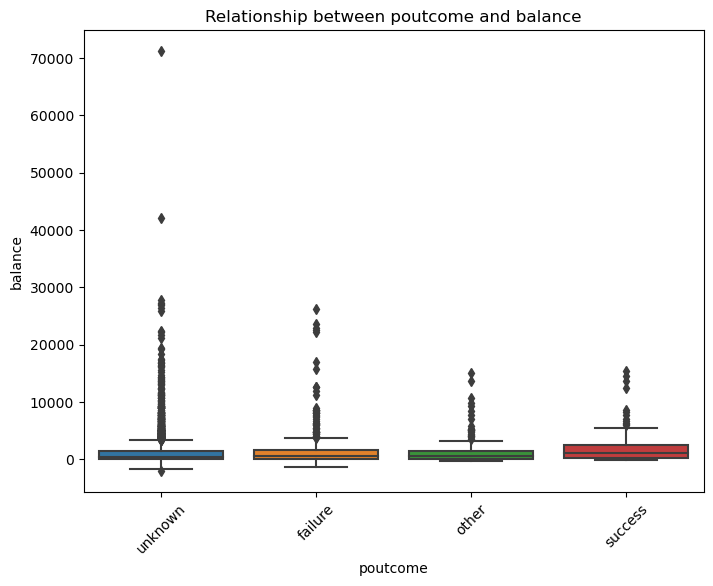

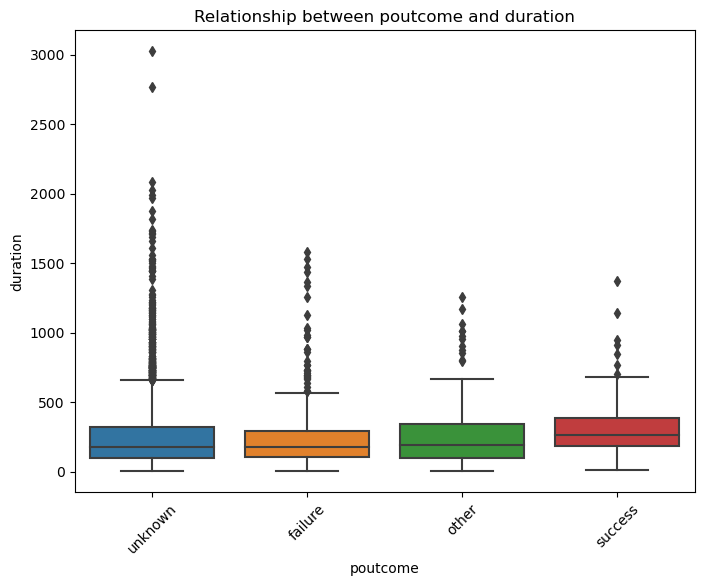

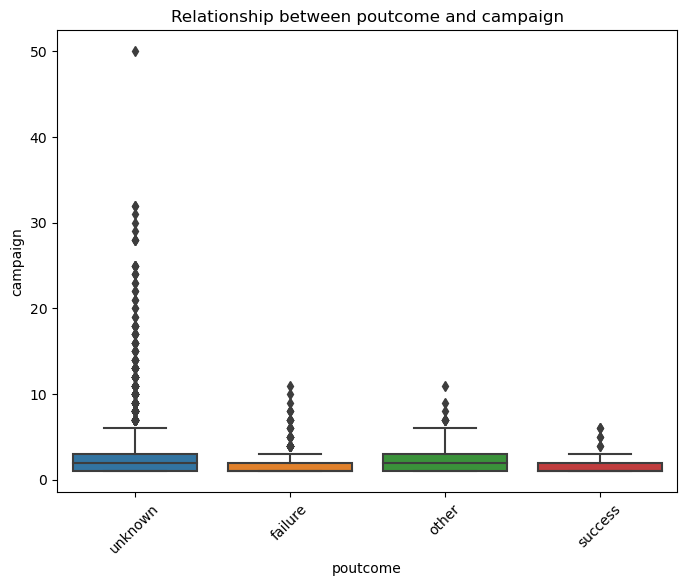

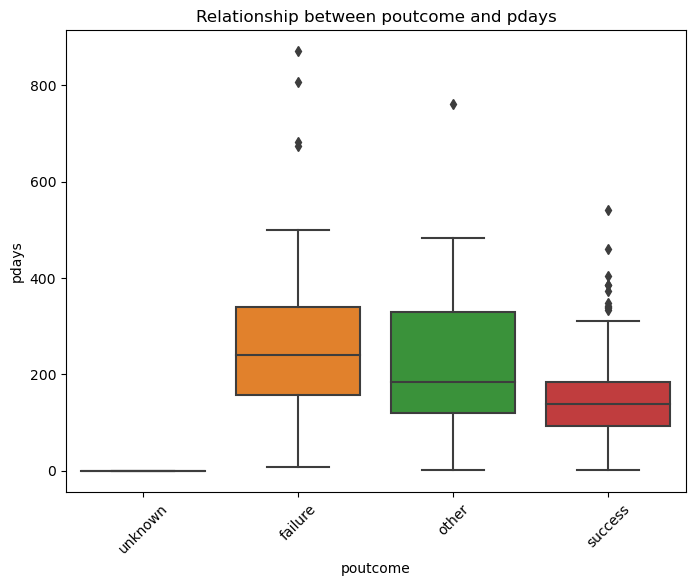

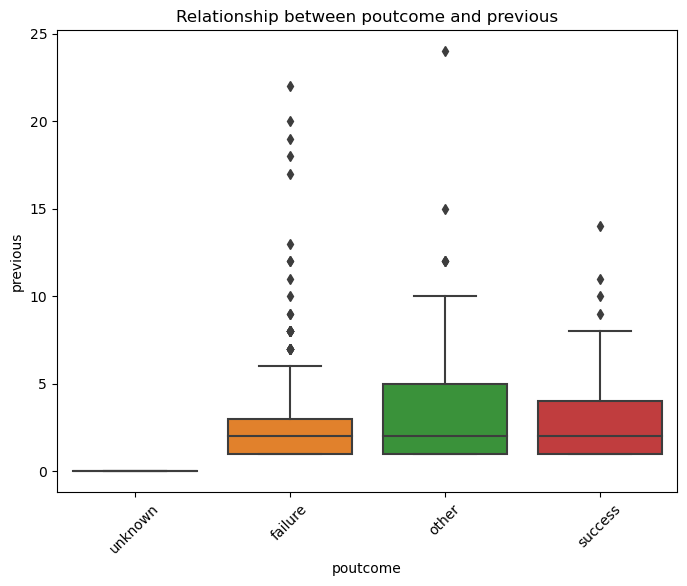

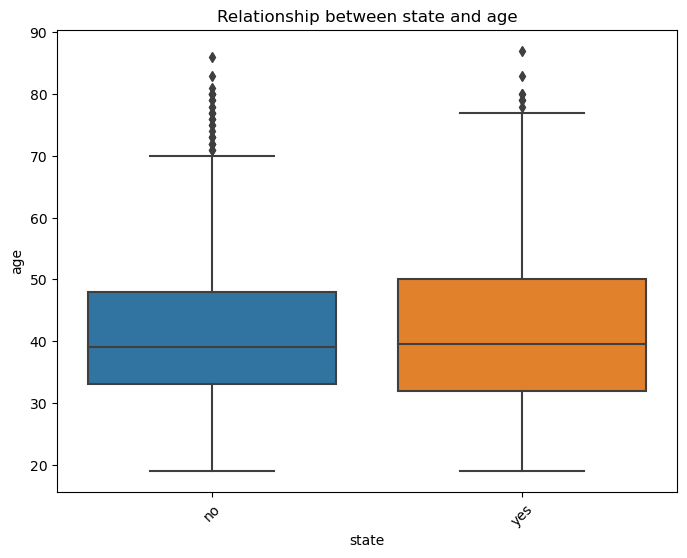

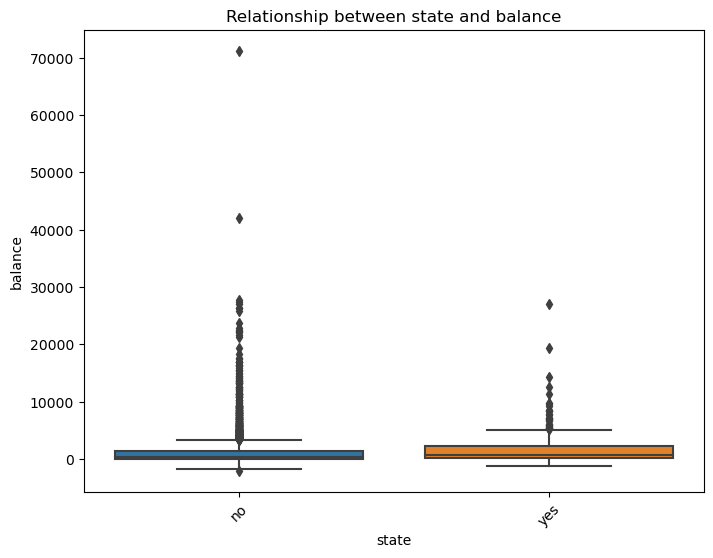

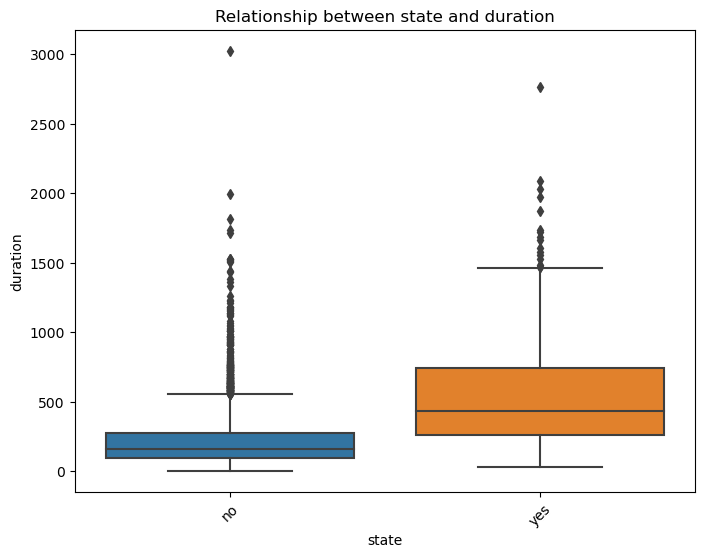

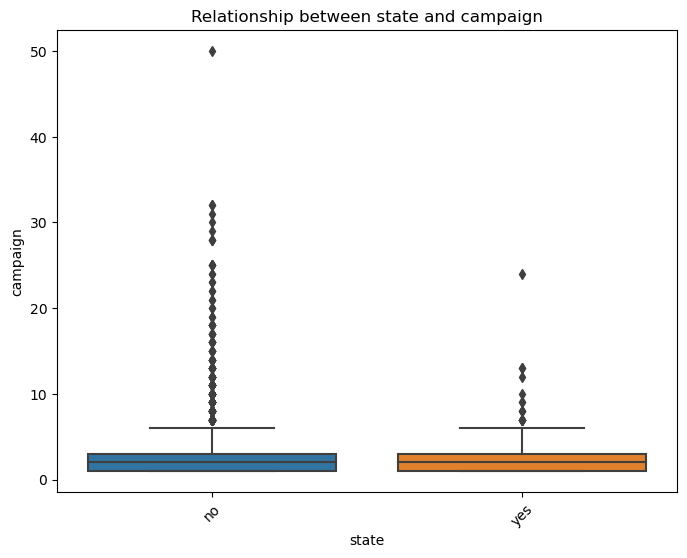

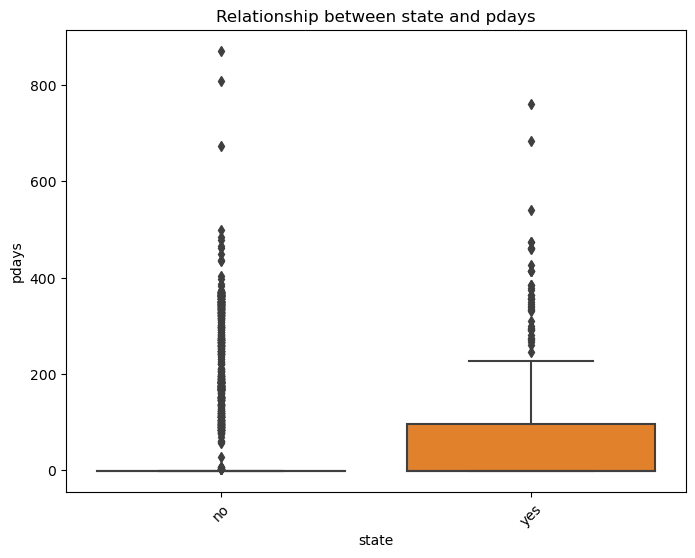

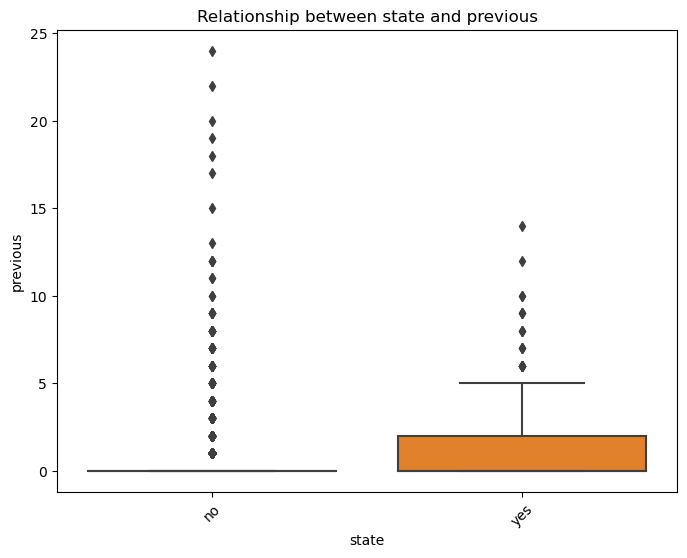

In [27]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'state']
numeric_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Plot relationships using faceting
for cat_col in categorical_cols:
    for num_col in numeric_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=cat_col, y=num_col, data=data1)
        plt.title(f'Relationship between {cat_col} and {num_col}')
        plt.xticks(rotation=45)
        plt.show()
        
        

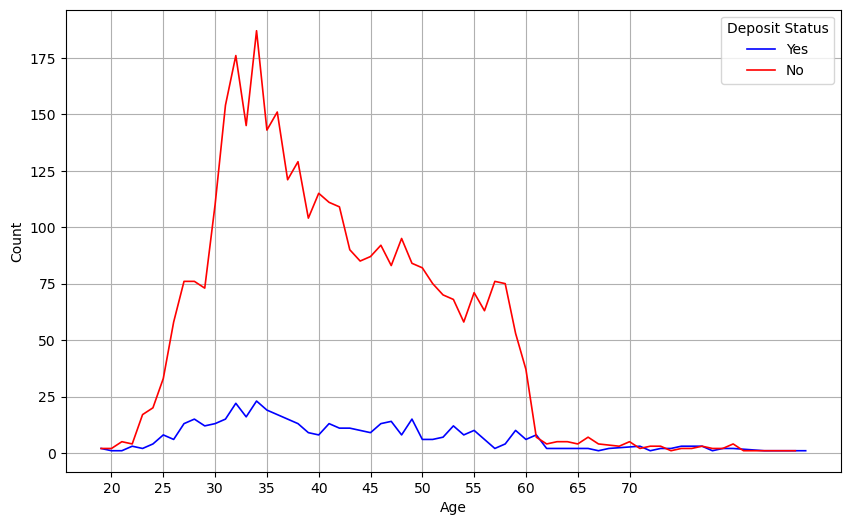

In [28]:



import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'client_df' with columns 'age' and 'state'

# Calculate count by age and state
client_count = data1.groupby(['age', 'state']).size().reset_index(name='Count')

# Define custom color palette
custom_palette = {"yes": "blue", "no": "red"}

# Plot
plt.figure(figsize=(10, 6))
for state, color in custom_palette.items():
    state_data = client_count[client_count['state'] == state]
    plt.plot(state_data['age'], state_data['Count'], label=state, color=color, linewidth=1.2)

# Customize plot
# plt.title("Relationship between Age an Deposit Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(range(20, 71, 5))
plt.legend(title="Deposit Status", labels=["Yes", "No"])
plt.grid(True)

# Show plot
plt.show()





<Figure size 800x600 with 0 Axes>

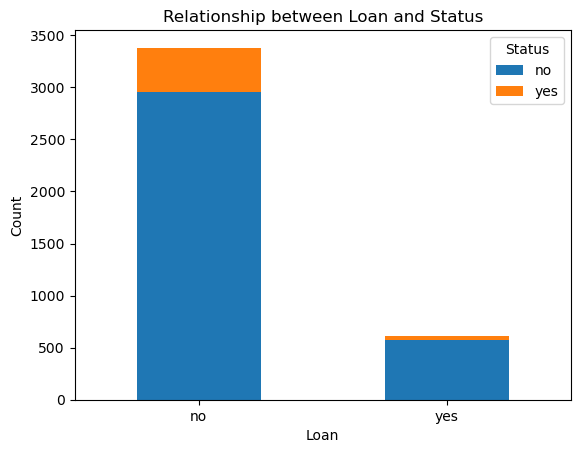

In [29]:

import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called client_df
# Plotting the relationship between 'loan' and 'status'
plt.figure(figsize=(8, 6))
data1.groupby(['loan', 'state']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Relationship between Loan and Status')
plt.xlabel('Loan')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Status')
plt.show()



#housing loan , personal loan vs deposit status

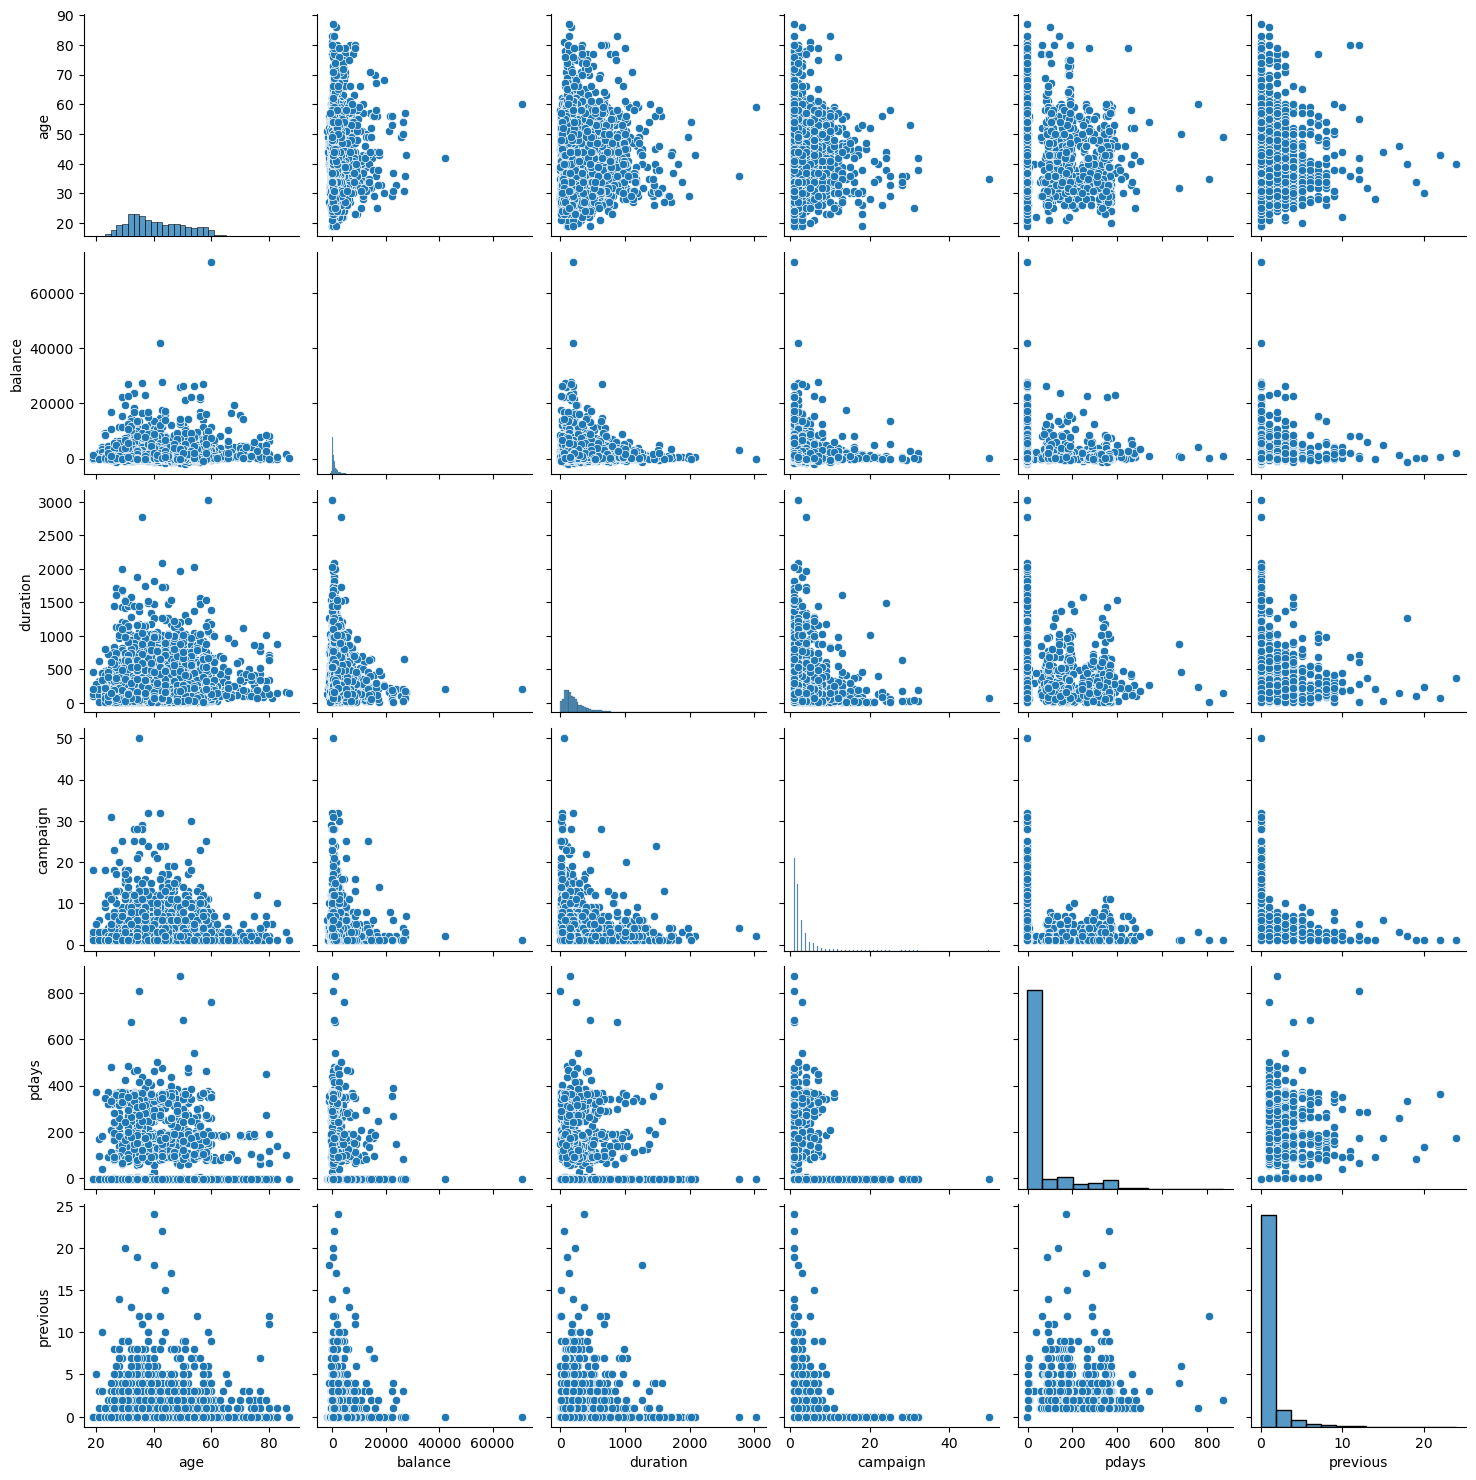

In [30]:
sns.pairplot(data1[numeric_cols])
plt.show()

In [31]:
# print(data1.info())

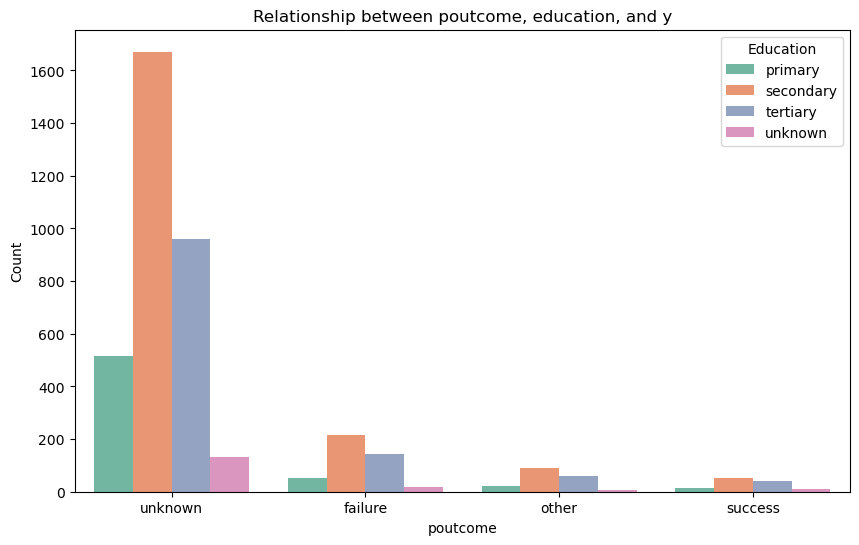

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='poutcome', hue='education', data=data1, hue_order=['primary', 'secondary', 'tertiary', 'unknown'], palette='Set2')
plt.title('Relationship between poutcome, education, and y')
plt.xlabel('poutcome')
plt.ylabel('Count')
plt.legend(title='Education')
plt.show()

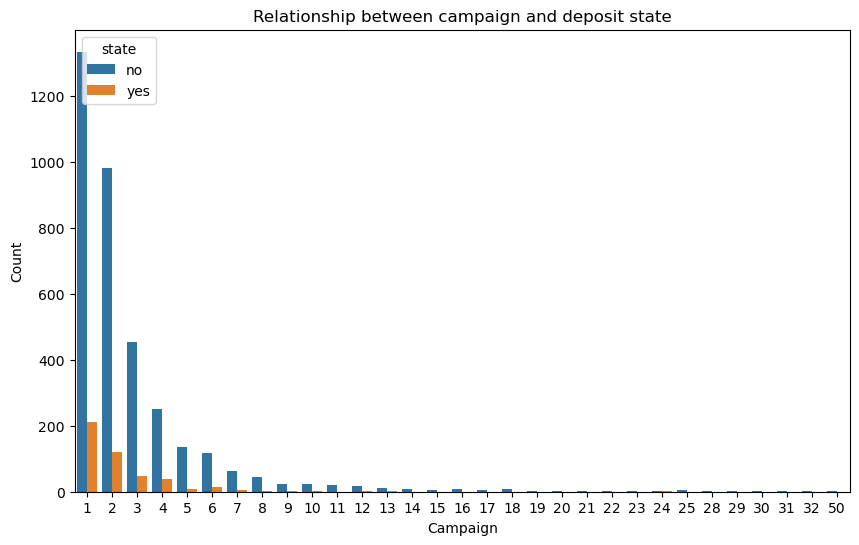

In [33]:
# Relationship between 'campaign' and 'y'
plt.figure(figsize=(10, 6))
sns.countplot(x='campaign', hue='state', data=data1)
plt.title('Relationship between campaign and deposit state')
plt.xlabel('Campaign')
plt.ylabel('Count')
plt.legend(title='state')
plt.show()

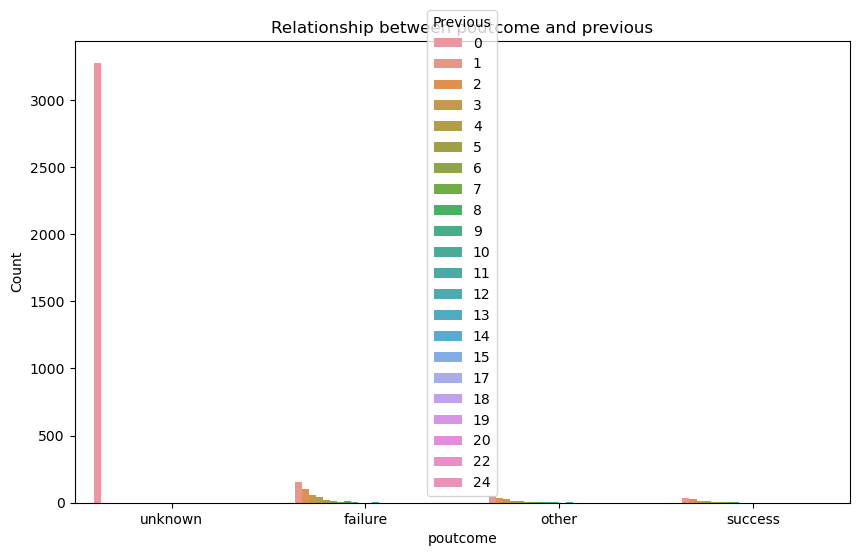

In [34]:
# Relationship between 'poutcome' and 'previous'
plt.figure(figsize=(10, 6))
sns.countplot(x='poutcome', hue='previous', data=data1)
plt.title('Relationship between poutcome and previous')
plt.xlabel('poutcome')
plt.ylabel('Count')
plt.legend(title='Previous')
plt.show()

In [35]:
# Create a pivot table to count occurrences of 'previous' for each 'poutcome'
pivot_table = data.pivot_table(index='poutcome', columns='previous', aggfunc='size', fill_value=0)

# Display the tabulated data
print(pivot_table)


previous    0    1    2   3   4   5   6   7   8   9   ...  12  13  14  15  17  \
poutcome                                              ...                       
failure      0  158  103  61  39  22  13   9  10   2  ...   2   1   0   0   1   
other        0   52   37  26  15  16   2   8   6   7  ...   3   0   0   1   0   
success      0   36   30  15  13   5   7   2   2   1  ...   0   0   1   0   0   
unknown   3277    0    0   0   0   0   0   0   0   0  ...   0   0   0   0   0   

previous  18  19  20  22  24  
poutcome                      
failure    1   1   1   1   0  
other      0   0   0   0   1  
success    0   0   0   0   0  
unknown    0   0   0   0   0  

[4 rows x 22 columns]


In [36]:
pivot_table

previous    0    1    2   3   4   5   6   7   8   9   ...  12  13  14  15  17  \
poutcome                                              ...                       
failure      0  158  103  61  39  22  13   9  10   2  ...   2   1   0   0   1   
other        0   52   37  26  15  16   2   8   6   7  ...   3   0   0   1   0   
success      0   36   30  15  13   5   7   2   2   1  ...   0   0   1   0   0   
unknown   3277    0    0   0   0   0   0   0   0   0  ...   0   0   0   0   0   

previous  18  19  20  22  24  
poutcome                      
failure    1   1   1   1   0  
other      0   0   0   0   1  
success    0   0   0   0   0  
unknown    0   0   0   0   0  

[4 rows x 22 columns]

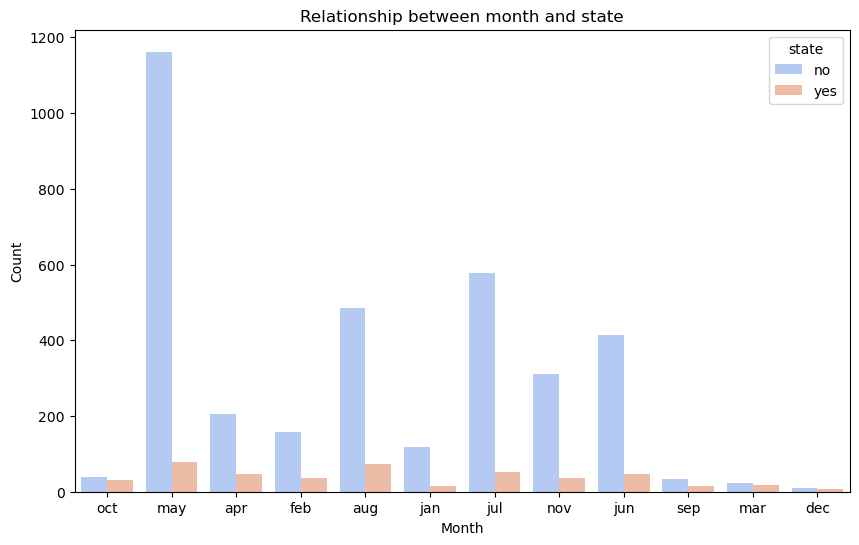

In [37]:
# Plot the relationship between 'month', 'y'
plt.figure(figsize=(10, 6))
sns.countplot(x='month', hue='state', data=data1, palette='coolwarm')
plt.title('Relationship between month and state')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='state')
plt.show()

In [38]:
# # Assuming 'data1' is your DataFrame containing the relevant columns
# cross_tab = pd.crosstab(data1['month'], data1['state'])

# # Display the tabulated data
# print(cross_tab)

In [39]:
# # Convert 'month' column to categorical type with specified order
# data['month'] = pd.Categorical(data['month'], categories=month_order, ordered=True)

# # Calculate counts of 'state' for each 'month'
# state_counts = data.groupby(['month', 'state']).size().unstack()

# # Plot the line graph
# plt.figure(figsize=(12, 6))

# # Plot lines with markers for each state
# for state in state_counts.columns:
#     plt.plot(state_counts.index, state_counts[state], marker='o', label=state)

# # Add labels and title
# plt.title('Monthly Distribution of Deposit Status')
# plt.xlabel('Month')
# plt.ylabel('Count')
# plt.legend(title='State', loc='upper right')

# # Adjust layout and add gridlines
# plt.xticks(rotation=45)
# plt.grid(True, linestyle='--', alpha=0.5)
# plt.tight_layout()

# # Show the plot
# plt.show()

In [40]:
# Calculate counts of 'state' for each 'month'
state_counts = data.groupby(['month', 'state']).size().unstack()

# Display the tabulated data
print(state_counts)

state    no  yes
month           
apr     204   47
aug     484   74
dec      11    8
feb     157   36
jan     117   15
jul     578   52
jun     415   47
mar      24   19
may    1162   79
nov     311   36
oct      40   31
sep      33   14


In [41]:
# Sort the tabulated data in descending order of 'yes' counts
state_counts_sorted = state_counts.sort_values(by='yes', ascending=False)

# Display the sorted tabulated data
print(state_counts_sorted)

state    no  yes
month           
may    1162   79
aug     484   74
jul     578   52
apr     204   47
jun     415   47
feb     157   36
nov     311   36
oct      40   31
mar      24   19
jan     117   15
sep      33   14
dec      11    8


In [42]:
# Calculate the total count of 'yes' and 'no' for each month
state_counts['total'] = state_counts['no'] + state_counts['yes']

# Calculate the percentage of 'yes' relative to the total count for each month
state_counts['yes_percentage'] = (state_counts['yes'] / state_counts['total']) * 100

state_counts['no_percentage'] = (state_counts['no'] / state_counts['total']) * 100



In [43]:
state_perc_sorted = state_counts.sort_values(by='yes_percentage', ascending=False)

print(state_perc_sorted)

state    no  yes  total  yes_percentage  no_percentage
month                                                 
mar      24   19     43       44.186047      55.813953
oct      40   31     71       43.661972      56.338028
dec      11    8     19       42.105263      57.894737
sep      33   14     47       29.787234      70.212766
apr     204   47    251       18.725100      81.274900
feb     157   36    193       18.652850      81.347150
aug     484   74    558       13.261649      86.738351
jan     117   15    132       11.363636      88.636364
nov     311   36    347       10.374640      89.625360
jun     415   47    462       10.173160      89.826840
jul     578   52    630        8.253968      91.746032
may    1162   79   1241        6.365834      93.634166


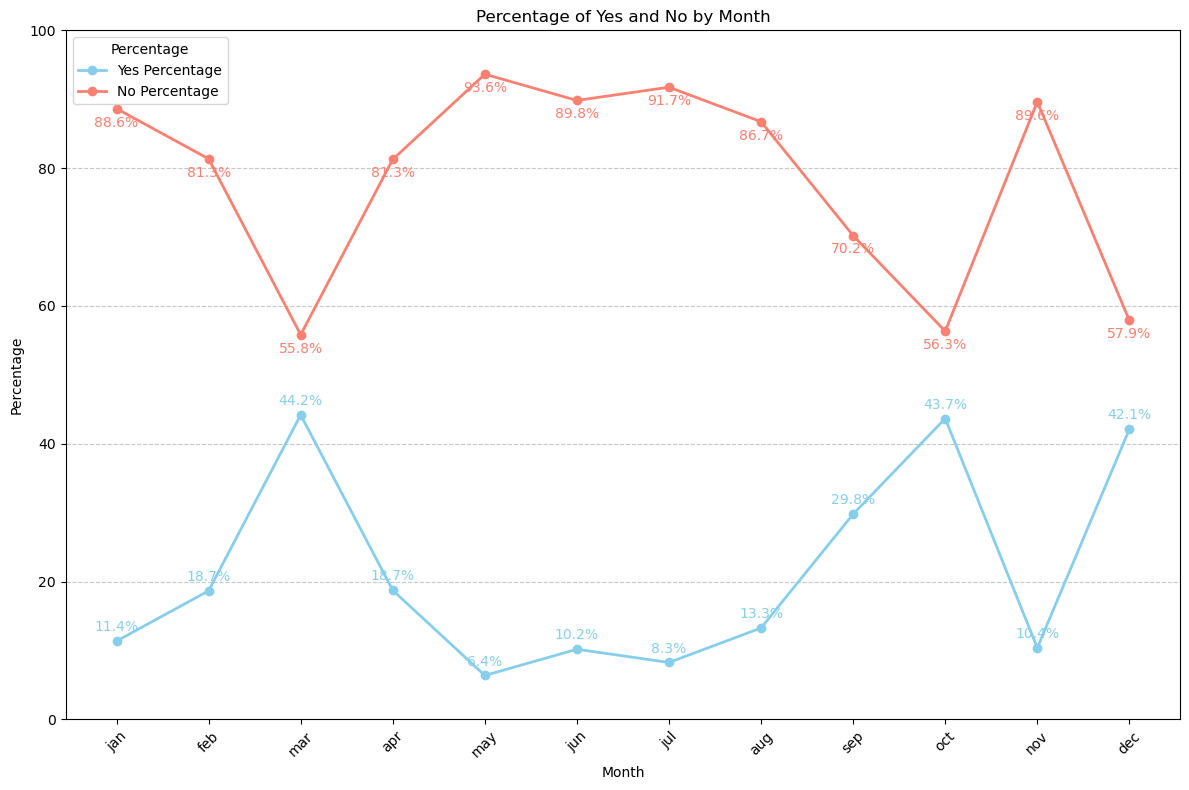

In [44]:
import matplotlib.pyplot as plt

# Sort the data by month in ascending order
# Define the order of months
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Sort the state_counts DataFrame by the custom month order
state_counts_sorted = state_counts.reindex(month_order)

# Plot the graph
plt.figure(figsize=(12, 8))

# Plot 'yes_percentage'
plt.plot(state_counts_sorted.index, state_counts_sorted['yes_percentage'], marker='o', color='skyblue', label='Yes Percentage', linewidth=2)

# Plot 'no_percentage'
plt.plot(state_counts_sorted.index, state_counts_sorted['no_percentage'], marker='o', color='salmon', label='No Percentage', linewidth=2)

# Add percentage labels for 'yes_percentage'
for month, value in zip(state_counts_sorted.index, state_counts_sorted['yes_percentage']):
    plt.text(month, value + 1, f'{value:.1f}%', ha='center', va='bottom', color='skyblue', fontsize=10)

# Add percentage labels for 'no_percentage'
for month, value in zip(state_counts_sorted.index, state_counts_sorted['no_percentage']):
    plt.text(month, value - 1, f'{value:.1f}%', ha='center', va='top', color='salmon', fontsize=10)

# Add labels, title, legend, and adjust layout
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.title('Percentage of Yes and No by Month')
plt.legend(title='Percentage')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


In [45]:
state_counts_sorted

state    no  yes  total  yes_percentage  no_percentage
month                                                 
jan     117   15    132       11.363636      88.636364
feb     157   36    193       18.652850      81.347150
mar      24   19     43       44.186047      55.813953
apr     204   47    251       18.725100      81.274900
may    1162   79   1241        6.365834      93.634166
jun     415   47    462       10.173160      89.826840
jul     578   52    630        8.253968      91.746032
aug     484   74    558       13.261649      86.738351
sep      33   14     47       29.787234      70.212766
oct      40   31     71       43.661972      56.338028
nov     311   36    347       10.374640      89.625360
dec      11    8     19       42.105263      57.894737

In [46]:
import pandas as pd
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
data_encoded = data1.apply(label_encoder.fit_transform)

# Compute chi-square statistics for each pair of categorical variables
chi2_statistic = {}
for column in data_encoded.columns:
    for other_column in data_encoded.columns:
        if column != other_column:
            contingency_table = pd.crosstab(data_encoded[column], data_encoded[other_column])
            chi2, _, _, _ = chi2_contingency(contingency_table)
            chi2_statistic[(column, other_column)] = chi2

# Convert chi-square statistics to a DataFrame
chi2_df = pd.DataFrame.from_dict(chi2_statistic, orient='index', columns=['Chi-square'])

# Display the correlation between categorical variables based on the chi-square statistics
print(chi2_df)
chi2_df

                      Chi-square
(age, job)           3228.673033
(age, marital)       1033.770964
(age, education)      524.128044
(age, default)         47.833617
(age, balance)     146654.735538
...                          ...
(state, duration)    1893.462470
(state, campaign)      29.283379
(state, pdays)        754.360643
(state, previous)     150.140477
(state, poutcome)     342.579573

[272 rows x 1 columns]


Chi-square
(age, job)           3228.673033
(age, marital)       1033.770964
(age, education)      524.128044
(age, default)         47.833617
(age, balance)     146654.735538
...                          ...
(state, duration)    1893.462470
(state, campaign)      29.283379
(state, pdays)        754.360643
(state, previous)     150.140477
(state, poutcome)     342.579573

[272 rows x 1 columns]

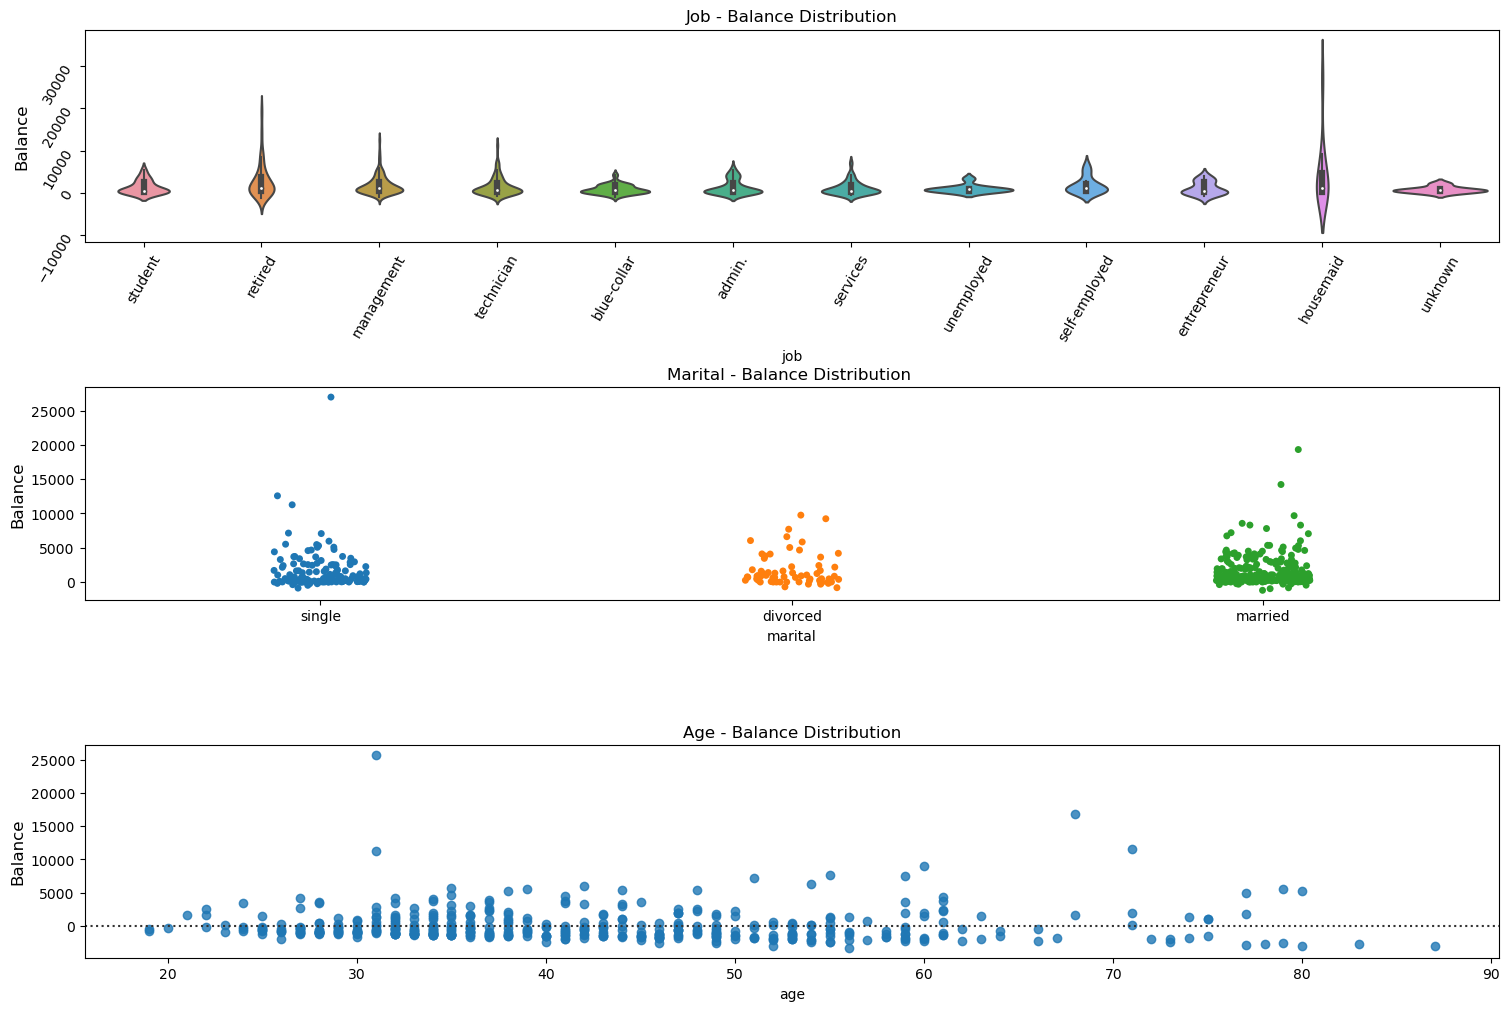

In [47]:
# Age/ Marital/ Occupation plot vs balance analysis for people who have taken term-deposit

fig, axis = plt.subplots(3)
fig.set_figwidth(15)
fig.set_figheight(10)

# Jobwise check enrollment for term-deposit
#sns.countplot(x='job', data=data[data['term_deposit']=='yes'], ax = axis[0], order = data['job'].value_counts().index) 
sns.violinplot(x='job', y='balance', data=data1[data1['state']=='yes'], ax = axis[0])
axis[0].set_ylabel('Balance', fontsize=12)
axis[0].set_title("Job - Balance Distribution", fontsize=12)    
axis[0].tick_params(labelrotation=60)


sns.stripplot(x='marital', y='balance', data=data1[data1['state']=='yes'], ax = axis[1])
axis[1].set_ylabel('Balance', fontsize=12)
axis[1].set_title("Marital - Balance Distribution ", fontsize=12)    
#axis[1].tick_params(labelrotation=60)

sns.residplot(x='age', y='balance', data=data1[data1['state']=='yes'], ax = axis[2])
#sns.scatterplot(x='age', y='balance', hue="term_deposit", data=data)
axis[2].set_ylabel('Balance', fontsize=12)
axis[2].set_title("Age - Balance Distribution", fontsize=12)    
#axis[2].tick_params(labelrotation=60)


# using padding
fig.tight_layout(pad=0.3) 

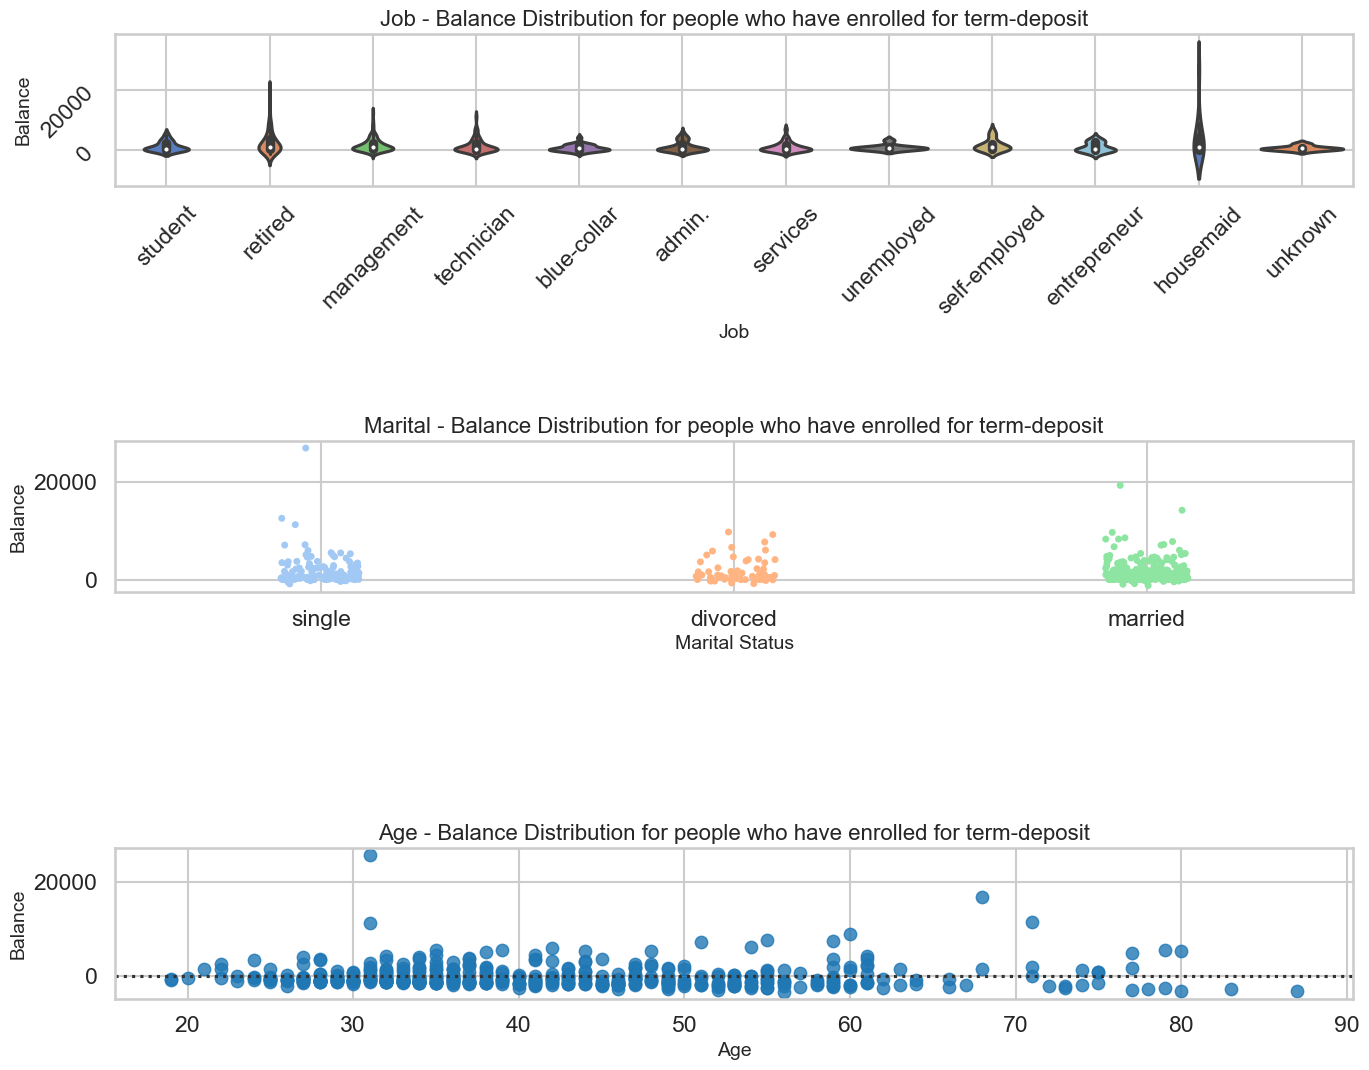

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and context for seaborn
sns.set_style("whitegrid")
sns.set_context("talk")

# Age/ Marital/ Occupation plot vs balance analysis for people who have taken term-deposit
fig, axis = plt.subplots(3)
fig.set_figwidth(15)
fig.set_figheight(12)

# Jobwise check enrollment for term-deposit
sns.violinplot(x='job', y='balance', data=data1[data1['state']=='yes'], ax=axis[0], palette="muted")
axis[0].set_ylabel('Balance', fontsize=14)
axis[0].set_xlabel('Job', fontsize=14)
axis[0].set_title("Job - Balance Distribution for people who have enrolled for term-deposit", fontsize=16)
axis[0].tick_params(labelrotation=45)
axis[0].grid(True)

# Marital status vs balance distribution
sns.stripplot(x='marital', y='balance', data=data1[data1['state']=='yes'], ax=axis[1], palette="pastel")
axis[1].set_ylabel('Balance', fontsize=14)
axis[1].set_xlabel('Marital Status', fontsize=14)
axis[1].set_title("Marital - Balance Distribution for people who have enrolled for term-deposit", fontsize=16)
axis[1].tick_params(labelrotation=0)
axis[1].grid(True)

# Age vs balance distribution
sns.residplot(x='age', y='balance', data=data1[data1['state']=='yes'], ax=axis[2], scatter_kws={"s": 80}, line_kws={"color": "red"})
axis[2].set_ylabel('Balance', fontsize=14)
axis[2].set_xlabel('Age', fontsize=14)
axis[2].set_title("Age - Balance Distribution for people who have enrolled for term-deposit", fontsize=16)
axis[2].grid(True)

# Using padding
fig.tight_layout(pad=3)

plt.show()


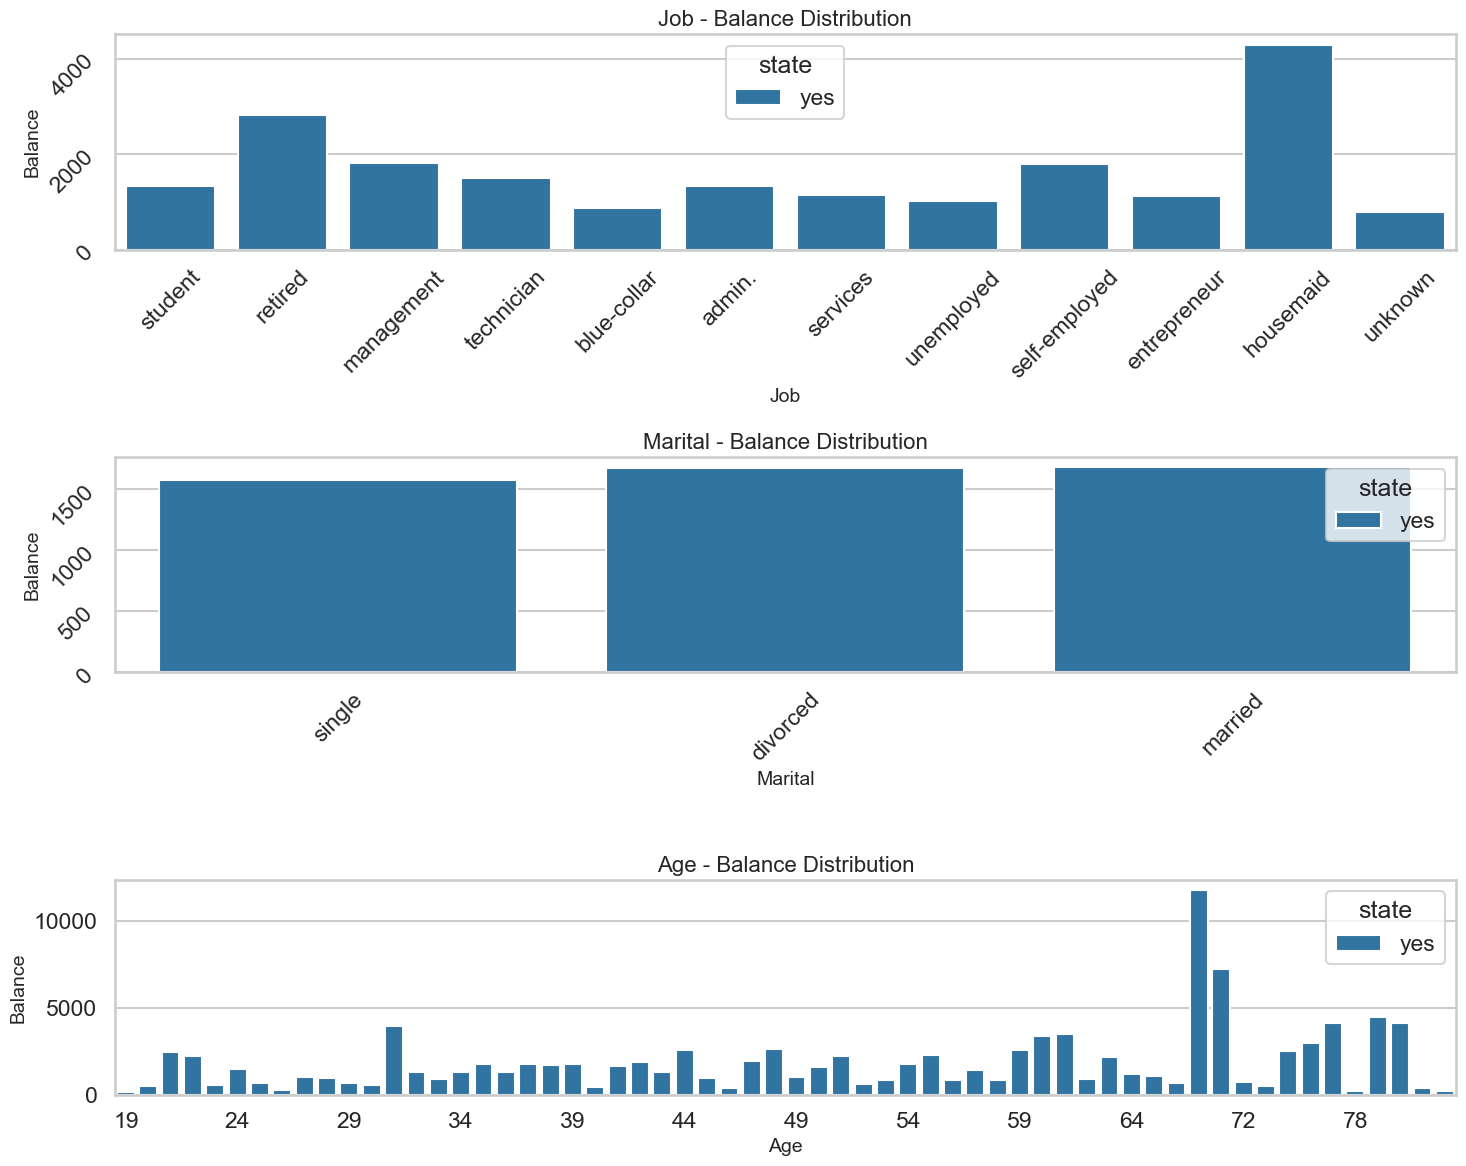

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Define custom color palette
#custom_palette = sns.color_palette("husl", 3)  # Adjust the number of colors as needed

# Set the style and context for seaborn
sns.set_style("whitegrid")
sns.set_context("talk")

# Define custom color palettes
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Blue, Orange, Green

# Age/ Marital/ Occupation plot vs balance analysis for people who have taken term-deposit
fig, axis = plt.subplots(3, figsize=(15, 12))

# Grouped barplot for Job - Balance Distribution
sns.barplot(x='job', y='balance', hue='state', data=data1[data1['state']=='yes'], ax=axis[0], palette=colors, ci=None)
axis[0].set_ylabel('Balance', fontsize=14)
axis[0].set_xlabel('Job', fontsize=14)
axis[0].set_title("Job - Balance Distribution", fontsize=16)
axis[0].tick_params(labelrotation=45)

# Grouped barplot for Marital - Balance Distribution
sns.barplot(x='marital', y='balance', hue='state', data=data1[data1['state']=='yes'], ax=axis[1], palette=colors, ci=None)
axis[1].set_ylabel('Balance', fontsize=14)
axis[1].set_xlabel('Marital', fontsize=14)
axis[1].set_title("Marital - Balance Distribution", fontsize=16)
axis[1].tick_params(labelrotation=45)

# Grouped barplot for Age - Balance Distribution
sns.barplot(x='age', y='balance', hue='state', data=data1[data1['state']=='yes'], ax=axis[2], palette=colors, ci=None)
axis[2].set_ylabel('Balance', fontsize=14)
axis[2].set_xlabel('Age', fontsize=14)
axis[2].set_title("Age - Balance Distribution", fontsize=16)
axis[2].xaxis.set_major_locator(ticker.MultipleLocator(5))

# Adjusting layout
plt.tight_layout()

plt.show()



In [50]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Group by AgeGroup and Marital
# conversions_age_marital =data_yes.groupby(['AgeGroup', 'Marital']).agg(
#     Count=('Age', 'count'),
#     NumConversions=('state', lambda x: (x == 'yes').sum())
# ).reset_index()

# # Calculate TotalCount and ConversionRate
# conversions_age_marital['TotalCount'] = conversions_age_marital.groupby('AgeGroup')['Count'].transform('sum')
# conversions_age_marital['ConversionRate'] = conversions_age_marital['NumConversions'] / conversions_age_marital['TotalCount'] * 100

# # Print the intermediate steps
# print(conversions_age_marital)

# # Rename AgeGroup
# conversions_age_marital['AgeGroup'] = conversions_age_marital['AgeGroup'].astype(str)
# conversions_age_marital['AgeGroup'].fillna('70+', inplace=True)

# # Visualizing conversions by age group and marital status
# plt.figure(figsize=(10, 6))
# sns.barplot(x='AgeGroup', y='ConversionRate', hue='Marital', data=conversions_age_marital)
# plt.title("Conversion Rates by Age Group and Marital Status")
# plt.xlabel("Age Group")
# plt.ylabel("Conversion Rate")
# plt.show()


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and context for seaborn
sns.set_style("whitegrid")
sns.set_context("talk")


# Jobwise check enrollment for term-deposit
sns.violinplot(x='job', y='balance', data=data1[data1['state']=='yes'], ax=axis[0], palette="muted", scale='count', inner='quartile')
axis[0].set_ylabel('Balance', fontsize=14)
axis[0].set_xlabel('Job', fontsize=14)
axis[0].set_title("Job - Balance Distribution for people who have enrolled for term-deposit", fontsize=16)
axis[0].tick_params(labelrotation=45)
axis[0].set_ylim(0, data1['balance'].max()*1.1)  # Adjust y-axis scale
axis[0].grid(False)  # Remove gridlines

# Using padding
fig.tight_layout(pad=3)

plt.show()


In [52]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Define the columns to be label encoded
columns_to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'state']

# Apply label encoding to each column
for column in columns_to_encode:
    data1[column] = label_encoder.fit_transform(data1[column])

# Print the encoded DataFrame
print(data1)




      age  job  marital  education  default  balance  housing  loan  contact  \
0      30   10        1          0        0     1787        0     0        0   
1      33    7        1          1        0     4789        1     1        0   
2      35    4        2          2        0     1350        1     0        0   
3      59    1        1          1        0        0        1     0        2   
4      35    4        2          2        0      747        0     0        0   
...   ...  ...      ...        ...      ...      ...      ...   ...      ...   
3989   54    2        1          3        0     1956        0     0        0   
3990   37    1        0          1        0        0        1     0        0   
3991   34    4        1          1        0     -294        1     0        2   
3992   43    9        1          1        0      275        0     0        0   
3993   44    4        1          2        0      724        1     0        0   

      day   month  duration  campaign  

Text(0.5, 1.0, 'Feature Correlation')

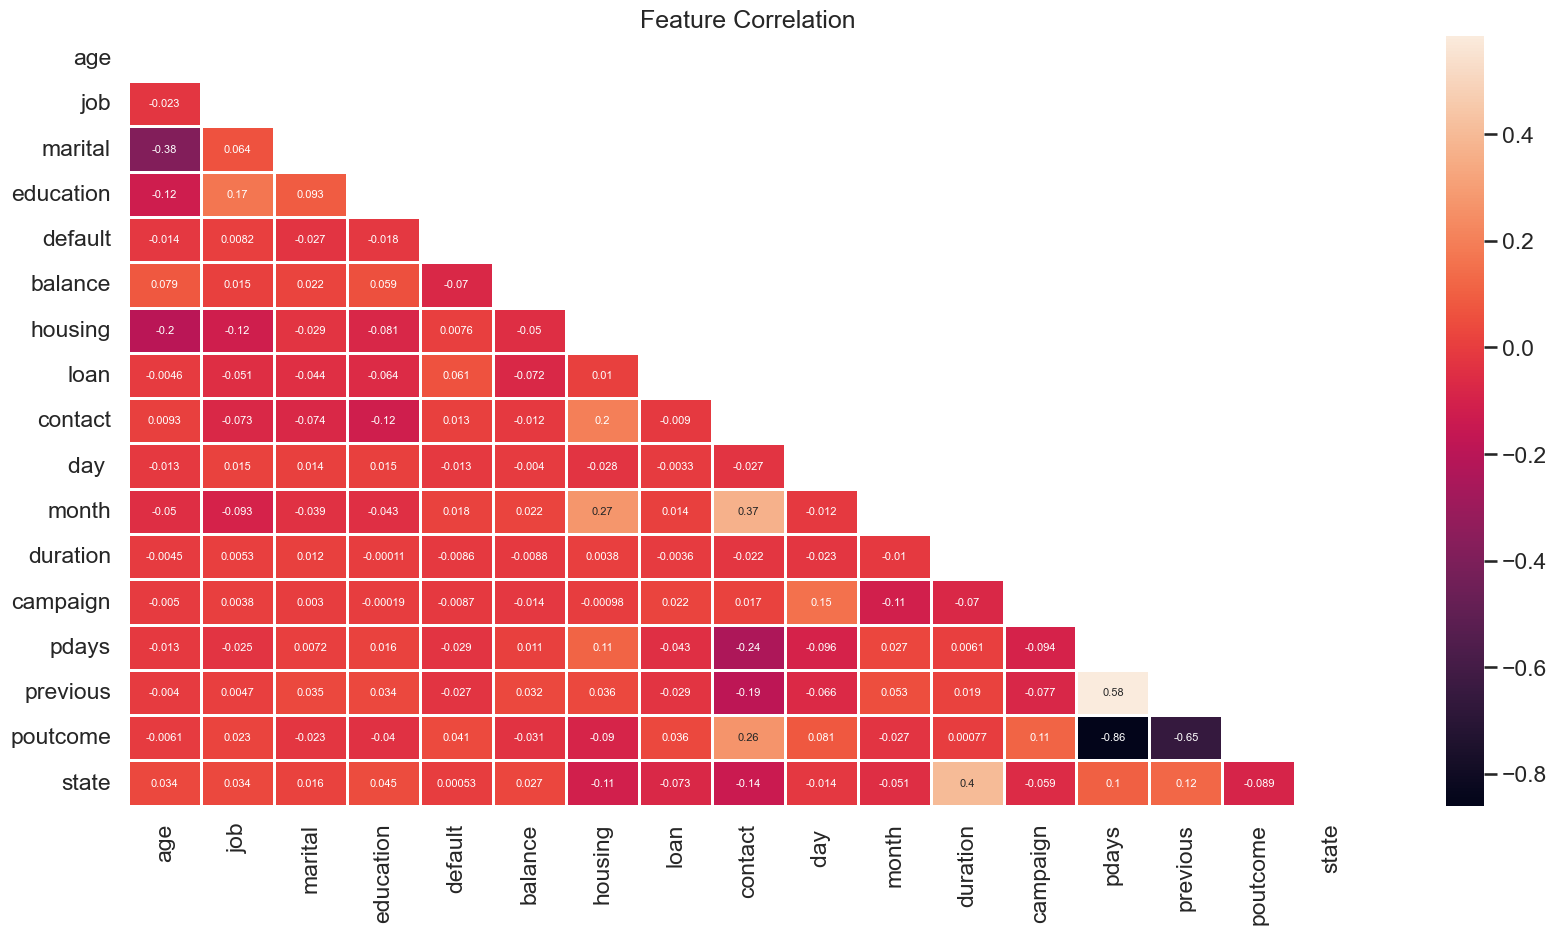

In [53]:
#numeric_vars = ['age', 'balance', 'duration', 'pdays', 'previous']

corr = data1.corr()



# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(20, 10))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, fmt='.2g', linewidths=1, annot_kws={"fontsize":8}).set_title('Feature Correlation')

In [54]:
corr

age       job   marital  education   default   balance  \
age        1.000000 -0.023276 -0.382530  -0.124648 -0.013866  0.079163   
job       -0.023276  1.000000  0.064189   0.170925  0.008215  0.014588   
marital   -0.382530  0.064189  1.000000   0.093284 -0.026912  0.022209   
education -0.124648  0.170925  0.093284   1.000000 -0.018110  0.059085   
default   -0.013866  0.008215 -0.026912  -0.018110  1.000000 -0.069826   
balance    0.079163  0.014588  0.022209   0.059085 -0.069826  1.000000   
housing   -0.195775 -0.119181 -0.028765  -0.081007  0.007585 -0.049901   
loan      -0.004640 -0.050825 -0.044205  -0.063678  0.060826 -0.072462   
contact    0.009255 -0.072832 -0.073887  -0.115878  0.013035 -0.011879   
day       -0.013275  0.015048  0.013897   0.014505 -0.013114 -0.003959   
month     -0.050167 -0.092889 -0.038700  -0.043488  0.017577  0.022452   
duration  -0.004494  0.005324  0.011726  -0.000106 -0.008557 -0.008794   
campaign  -0.004971  0.003770  0.002986  -0.000186 -0.008670 -0.014087   
pdays     -0.012874 -0.025306  0.007177   0.015537 -0.028844  0.010599   
previous  -0.004047  0.004676  0.034675   0.034068 -0.027085  0.031914   
poutcome  -0.006085  0.023107 -0.022535  -0.039625  0.041205 -0.030761   
state      0.034494  0.034109  0.016230   0.045436  0.000528  0.026933   

            housing      loan   contact      day      month  duration  \
age       -0.195775 -0.004640  0.009255 -0.013275 -0.050167 -0.004494   
job       -0.119181 -0.050825 -0.072832  0.015048 -0.092889  0.005324   
marital   -0.028765 -0.044205 -0.073887  0.013897 -0.038700  0.011726   
education -0.081007 -0.063678 -0.115878  0.014505 -0.043488 -0.000106   
default    0.007585  0.060826  0.013035 -0.013114  0.017577 -0.008557   
balance   -0.049901 -0.072462 -0.011879 -0.003959  0.022452 -0.008794   
housing    1.000000  0.009999  0.196574 -0.028180  0.270935  0.003762   
loan       0.009999  1.000000 -0.009044 -0.003255  0.013708 -0.003557   
contact    0.196574 -0.009044  1.000000 -0.026947  0.368257 -0.022408   
day       -0.028180 -0.003255 -0.026947  1.000000 -0.011981 -0.023177   
month      0.270935  0.013708  0.368257 -0.011981  1.000000 -0.010144   
duration   0.003762 -0.003557 -0.022408 -0.023177 -0.010144  1.000000   
campaign  -0.000985  0.021840  0.016549  0.154199 -0.114482 -0.069840   
pdays      0.114815 -0.043226 -0.240521 -0.095816  0.026949  0.006088   
previous   0.035752 -0.028686 -0.187212 -0.066104  0.052820  0.019063   
poutcome  -0.090244  0.035956  0.263480  0.080647 -0.027229  0.000769   
state     -0.111230 -0.072582 -0.139348 -0.013987 -0.050667  0.400020   

           campaign     pdays  previous  poutcome     state  
age       -0.004971 -0.012874 -0.004047 -0.006085  0.034494  
job        0.003770 -0.025306  0.004676  0.023107  0.034109  
marital    0.002986  0.007177  0.034675 -0.022535  0.016230  
education -0.000186  0.015537  0.034068 -0.039625  0.045436  
default   -0.008670 -0.028844 -0.027085  0.041205  0.000528  
balance   -0.014087  0.010599  0.031914 -0.030761  0.026933  
housing   -0.000985  0.114815  0.035752 -0.090244 -0.111230  
loan       0.021840 -0.043226 -0.028686  0.035956 -0.072582  
contact    0.016549 -0.240521 -0.187212  0.263480 -0.139348  
day        0.154199 -0.095816 -0.066104  0.080647 -0.013987  
month     -0.114482  0.026949  0.052820 -0.027229 -0.050667  
duration  -0.069840  0.006088  0.019063  0.000769  0.400020  
campaign   1.000000 -0.094020 -0.077266  0.113246 -0.059072  
pdays     -0.094020  1.000000  0.584997 -0.860092  0.102244  
previous  -0.077266  0.584997  1.000000 -0.651317  0.124903  
poutcome   0.113246 -0.860092 -0.651317  1.000000 -0.088836  
state     -0.059072  0.102244  0.124903 -0.088836  1.000000

In [55]:
df = data1.copy()

In [56]:
# One-hot encoding
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore',drop='if_binary')
onehot_labels = list(set(categorical_cols) - set(['job','month']))
encoded_df = pd.DataFrame(ohe.fit_transform(data[onehot_labels]).toarray(), columns=list(ohe.get_feature_names_out(onehot_labels)))
#list(ohe.get_feature_names_out(onehot_labels))
  
#Merge with main
df=df.join(encoded_df)
df.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   30   10        1          0        0     1787        0     0        0   
1   33    7        1          1        0     4789        1     1        0   
2   35    4        2          2        0     1350        1     0        0   
3   59    1        1          1        0        0        1     0        2   
4   35    4        2          2        0      747        0     0        0   

   day   ...  poutcome_other  poutcome_success  poutcome_unknown  default_yes  \
0    19  ...             0.0               0.0               1.0          0.0   
1    11  ...             0.0               0.0               0.0          0.0   
2    16  ...             0.0               0.0               0.0          0.0   
3     5  ...             0.0               0.0               1.0          0.0   
4    23  ...             0.0               0.0               0.0          0.0   

   contact_cellular  contact_telephone  contact_unknown  marital_divorced  \
0               1.0                0.0              0.0               0.0   
1               1.0                0.0              0.0               0.0   
2               1.0                0.0              0.0               0.0   
3               0.0                0.0              1.0               0.0   
4               1.0                0.0              0.0               0.0   

   marital_married  marital_single  
0              1.0             0.0  
1              1.0             0.0  
2              0.0             1.0  
3              1.0             0.0  
4              0.0             1.0  

[5 rows x 35 columns]

In [57]:
#Label Encoding for model building

le_job = LabelEncoder()
le_month = LabelEncoder()


#le.transform(data[cat_cols])
#le.inverse_transform(data[cat_cols])
o = le_job.fit_transform(data1['job'])
df['job_encoded'] = o

o = le_month.fit_transform(data1['month'])
df['month_encoded'] = o

df.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   30   10        1          0        0     1787        0     0        0   
1   33    7        1          1        0     4789        1     1        0   
2   35    4        2          2        0     1350        1     0        0   
3   59    1        1          1        0        0        1     0        2   
4   35    4        2          2        0      747        0     0        0   

   day   ...  poutcome_unknown  default_yes  contact_cellular  \
0    19  ...               1.0          0.0               1.0   
1    11  ...               0.0          0.0               1.0   
2    16  ...               0.0          0.0               1.0   
3     5  ...               1.0          0.0               0.0   
4    23  ...               0.0          0.0               1.0   

   contact_telephone  contact_unknown  marital_divorced  marital_married  \
0                0.0              0.0               0.0              1.0   
1                0.0              0.0               0.0              1.0   
2                0.0              0.0               0.0              0.0   
3                0.0              1.0               0.0              1.0   
4                0.0              0.0               0.0              0.0   

   marital_single  job_encoded  month_encoded  
0             0.0           10             10  
1             0.0            7              8  
2             1.0            4              0  
3             0.0            1              8  
4             1.0            4              3  

[5 rows x 37 columns]

Text(0.5, 1.0, 'Feature Correlation')

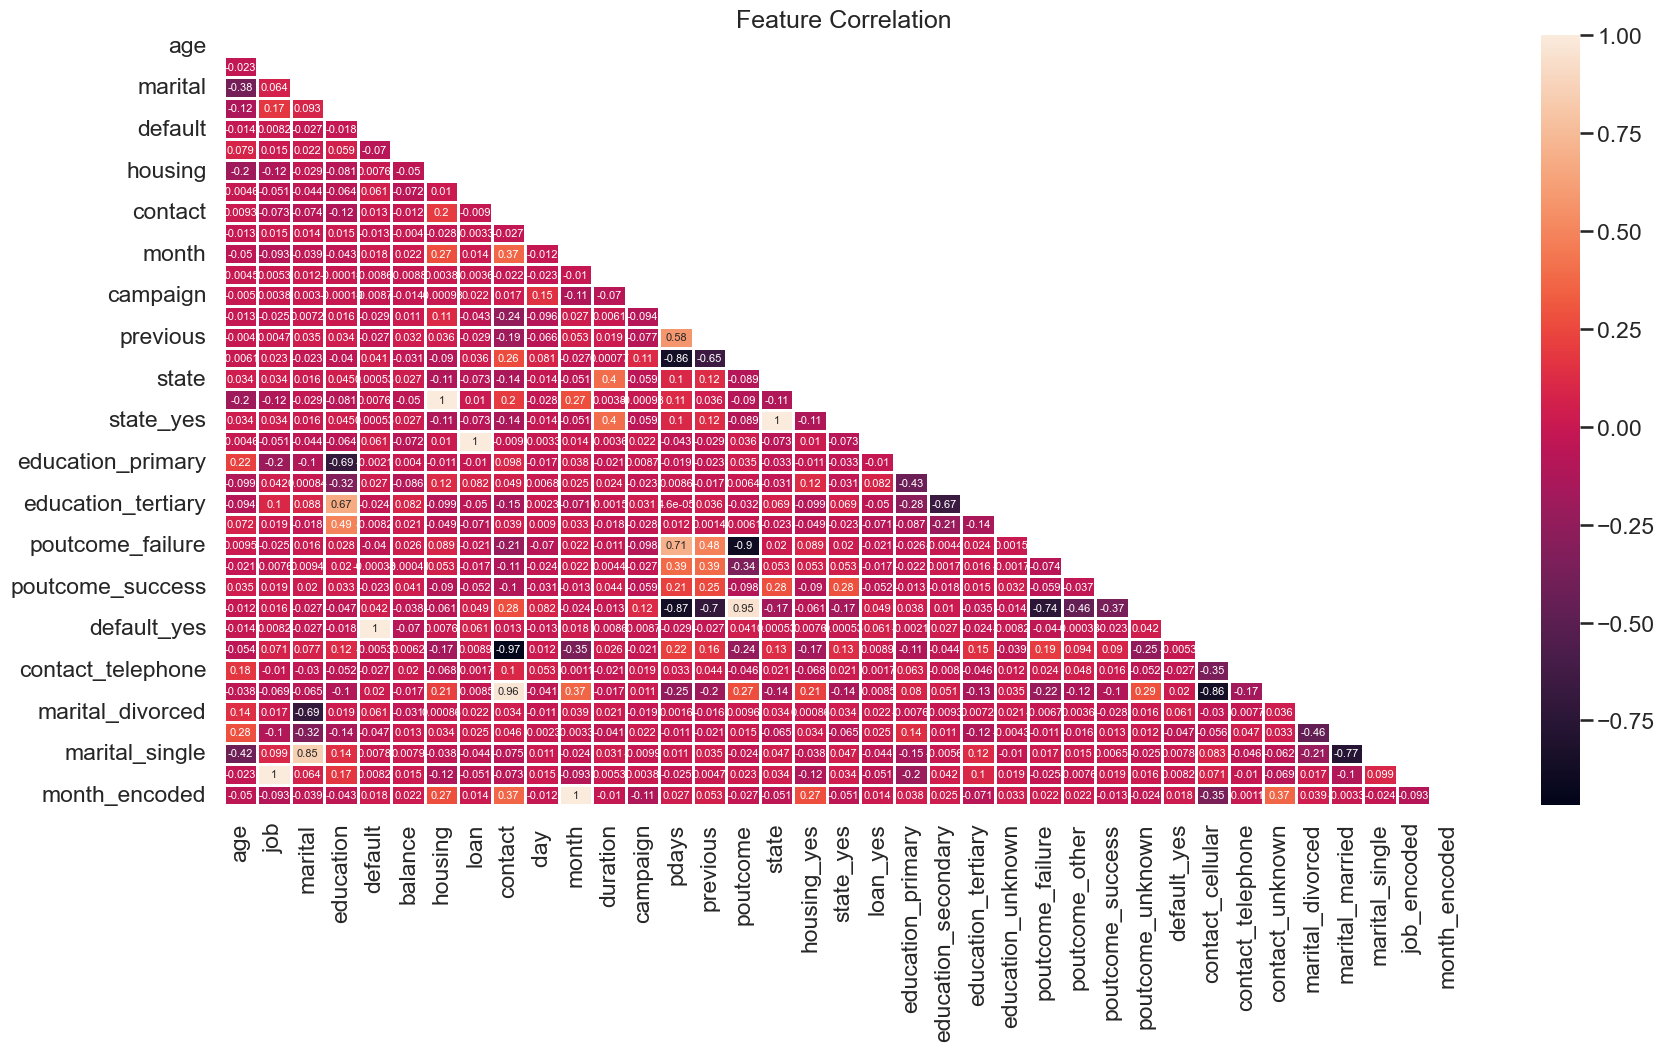

In [58]:
# Correlation Matrix
#sns.heatmap(df.corr(),vmin=0, vmax=1, cmap='coolwarm', fmt='g', linewidths=1, linecolor='black',xticklabels = df.columns, yticklabels=df.columns ).set_title('Correlation')

corr = df.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(20, 10))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, fmt='.2g', linewidths=1, annot_kws={"fontsize":8}).set_title('Feature Correlation')

In [59]:
data1.loc[:,'balance'] = (data1['balance'] - data1['balance'].mean()) / data1['balance'].std()
data1.loc[:,'duration'] = (data1['duration'] - data1['duration'].mean()) / data1['duration'].std()
data1.loc[:,'pdays'] = (data1['pdays'] - data1['pdays'].mean()) / data1['pdays'].std()

In [60]:
df_input_candidates = data1[data1.columns[data1.columns.map(lambda col: col not in ['state'])]]
y_target = data1['state']

In [61]:
le = LabelEncoder()
for col in df_input_candidates.columns[ [i == object for i in df_input_candidates.dtypes] ]:
    df_input_candidates.loc[:,col] = le.fit_transform(df_input_candidates[col])

print(df_input_candidates.head(5))

   age  job  marital  education  default   balance  housing  loan  contact  \
0   30   10        1          0        0  0.123362        0     0        0   
1   33    7        1          1        0  1.118698        1     1        0   
2   35    4        2          2        0 -0.021529        1     0        0   
3   59    1        1          1        0 -0.469131        1     0        2   
4   35    4        2          2        0 -0.221458        0     0        0   

   day   month  duration  campaign     pdays  previous  poutcome  
0    19     10 -0.706676         1 -0.405833         0         3  
1    11      8 -0.162050         1  3.008316         4         0  
2    16      0 -0.297241         1  2.917942         1         0  
3     5      8 -0.138875         1 -0.405833         0         3  
4    23      3 -0.467195         2  1.371533         3         0  


In [62]:
coefs = []

for i in range(100):
    df_filtered_yes = df_input_candidates.loc[y_target == 'yes']
    df_filtered_no = df_input_candidates.loc[y_target == 'no'].sample(df_filtered_yes.shape[0])
    
    df_homogenous = pd.concat([df_filtered_no, df_filtered_yes], ignore_index=True)
    
    rng = np.random.RandomState(seed=42)
    random_values = rng.randn(df_input_candidates.shape[0])
    df_input_candidates.loc[:,'random_values'] = random_values

    clf = RandomForestClassifier(n_estimators=200, max_depth=2, random_state=42)
    clf.fit(df_input_candidates, y_target)
    coefs.append(clf.feature_importances_)


/var/folders/c0/dqt5y2z50nj_yqkh8wgnt00r0000gn/T/ipykernel_84101/4206583905.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df_coefs.columns[sorted_idx].to_list(), fontsize=12)


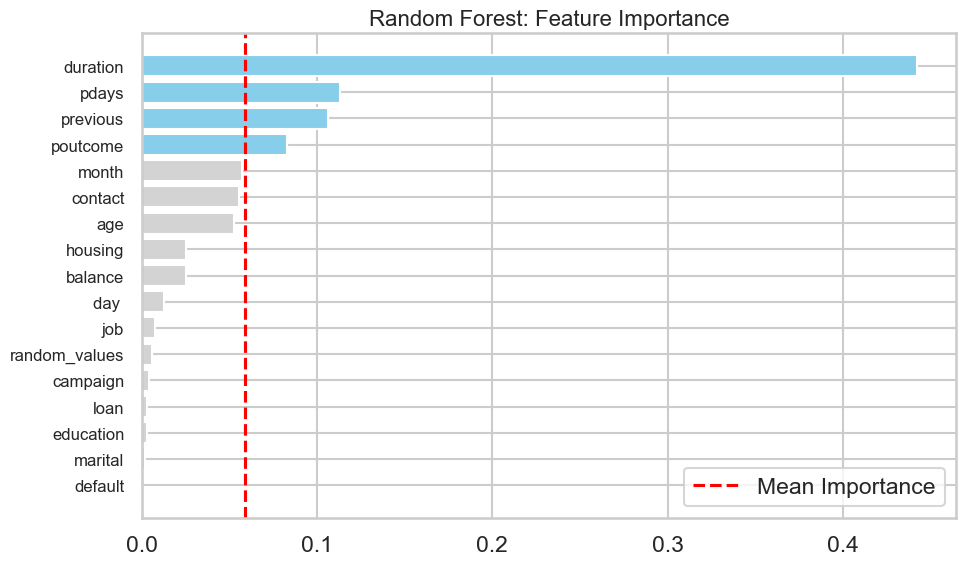

In [63]:
df_coefs = pd.DataFrame(np.array(coefs),columns=df_input_candidates.columns)

tree_feature_importances = df_coefs.mean().values
sorted_idx = tree_feature_importances.argsort()

# Define custom colors for the bars
bar_colors = ['skyblue' if importance > df_coefs.mean().mean() else 'lightgrey' for importance in tree_feature_importances[sorted_idx]]

# Create the plot
y_ticks = np.arange(0, len(df_coefs.columns))
fig, ax = plt.subplots(figsize=(10, 6))

# Plot horizontal bars
bars = ax.barh(y_ticks, tree_feature_importances[sorted_idx], color=bar_colors)

# Set y-axis labels
ax.set_yticklabels(df_coefs.columns[sorted_idx].to_list(), fontsize=12)
ax.set_yticks(y_ticks)

# Set title and adjust layout
ax.set_title("Random Forest: Feature Importance", fontsize=16)
fig.tight_layout()

# Add a vertical dashed line at the mean importance level
ax.axvline(df_coefs.mean().mean(), 0, 1, linestyle='--', color='red', label='Mean Importance')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [64]:
X = df [['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'housing_yes',
       'marital_divorced', 'marital_married', 'marital_single', 'loan_yes',
       'default_yes', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'job_encoded',
       'month_encoded']]
y = df['state_yes']

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=0)

In [66]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize Recursive Feature Elimination (RFE) with the Random Forest classifier
rfe = RFE(estimator=rf_classifier, n_features_to_select=10, step=1)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Use selected features
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]

selected_features

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome_success', 'marital_married', 'job_encoded', 'month_encoded'],
      dtype='object')

In [67]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Evaluate the model
accuracy = clf.score(X_val, y_val)
print("Random Forest Classifier Accuracy:", accuracy)


Random Forest Classifier Accuracy: 0.8911138923654568


In [68]:
# import matplotlib.pyplot as plt

# # Get feature importance scores from the random forest classifier
# feature_importance = rfe.estimator_.feature_importances_

# # Create a DataFrame with feature names and their importance scores
# feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importance})

# # Sort features by importance in descending order
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# # Plot the feature importance
# plt.figure(figsize=(10, 6))
# plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
# plt.xlabel('Importance')
# plt.ylabel('Feature')
# plt.title('Feature Importance')
# plt.show()



In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Predict
y_pred = clf.predict(X_val)

# Predict probabilities
y_pred_proba = clf.predict_proba(X_val)

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Predicted probabilities for each class
print("\nPredicted Probabilities:")
print(y_pred_proba)


Confusion Matrix:
[[681  17]
 [ 70  31]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94       698
         1.0       0.65      0.31      0.42       101

    accuracy                           0.89       799
   macro avg       0.78      0.64      0.68       799
weighted avg       0.87      0.89      0.87       799

Accuracy: 89.11%

Predicted Probabilities:
[[0.82 0.18]
 [0.83 0.17]
 [0.98 0.02]
 ...
 [0.78 0.22]
 [0.91 0.09]
 [0.72 0.28]]


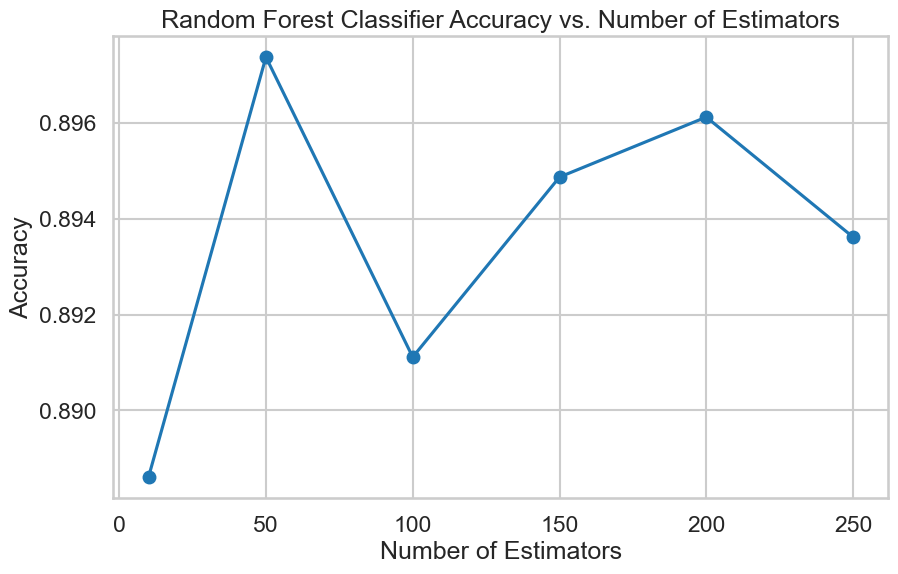

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define a range of n_estimators values
n_estimators_values = [10, 50, 100, 150, 200, 250]

# Initialize lists to store accuracy values
accuracies = []

# Loop through each value of n_estimators
for n_estimators in n_estimators_values:
    # Initialize the Random Forest classifier
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    
    # Evaluate the model on the validation data
    y_pred = clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, accuracies, marker='o')
plt.title('Random Forest Classifier Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [71]:
# # Example new data
# new_data = pd.DataFrame({
#     'age': [28, 45, 50], 
#     'balance': [2000, 3500, 10000], 
#     'duration': [150, 200, 100], 
#     'campaign': [2, 1, 1], 
#     'pdays': [-1, -1, -1], 
#     'previous': [0, 1, 0], 
    
#     'job': ['unemployed', 'technician', 'entrepreneur'], 
#     'marital': ['married', 'divorced', 'married'], 
#     'education': ['primary', 'secondary', 'tertiary'], 
#     'default': ['no', 'no', 'no'], 
   
#     'housing': ['yes', 'no', 'yes'], 
#     'loan': ['no', 'yes', 'no'], 
#     'contact': ['cellular', 'telephone', 'cellular'], 
#     'day': [5, 20, 15], 
#     'month': ['nov', 'jun', 'apr'], 
   
    
   
#     'poutcome': ['unknown', 'success', 'unknown']
# })

# # Convert categorical variables to numerical using one-hot encoding
# new_data_encoded = pd.get_dummies(new_data)

# # Ensure the new data has the same columns as the training data
# # If some columns are missing in the new data, you can add them with appropriate default values

# # Predict using the trained Random Forest classifier
# new_predictions = clf.predict(new_data_encoded)

# # Print the predicted classes
# print("Predicted classes:", new_predictions)

In [72]:
data1.head()

age  job  marital  education  default   balance  housing  loan  contact  \
0   30   10        1          0        0  0.123362        0     0        0   
1   33    7        1          1        0  1.118698        1     1        0   
2   35    4        2          2        0 -0.021529        1     0        0   
3   59    1        1          1        0 -0.469131        1     0        2   
4   35    4        2          2        0 -0.221458        0     0        0   

   day   month  duration  campaign     pdays  previous  poutcome  state  
0    19     10 -0.706676         1 -0.405833         0         3      0  
1    11      8 -0.162050         1  3.008316         4         0      0  
2    16      0 -0.297241         1  2.917942         1         0      0  
3     5      8 -0.138875         1 -0.405833         0         3      0  
4    23      3 -0.467195         2  1.371533         3         0      0

In [73]:
# # Calculate counts
# counts = data1.groupby(['loan', 'deposit', 'status']).size().unstack(fill_value=0)

# # Plot grouped bar chart
# counts.plot(kind='bar', stacked=False)
# plt.title('Relationship between Loan, Deposit, and Status')
# plt.xlabel('Loan')
# plt.ylabel('Count')
# plt.xticks(rotation=45)
# plt.legend(title='Status')
# plt.show()



In [74]:
# Create a contingency table of counts
table = pd.crosstab(data1['job'], data1['state'])

# Add a total column to the table
table['Total'] = table.sum(axis=1)

# Display the table
print(table)


state    0    1  Total
job                   
0      377   53    430
1      775   54    829
2      138   12    150
3       86   12     98
4      748  121    869
5      160   45    205
6      143   17    160
7      324   36    360
8       57   17     74
9      598   76    674
10     103    9    112
11      27    6     33


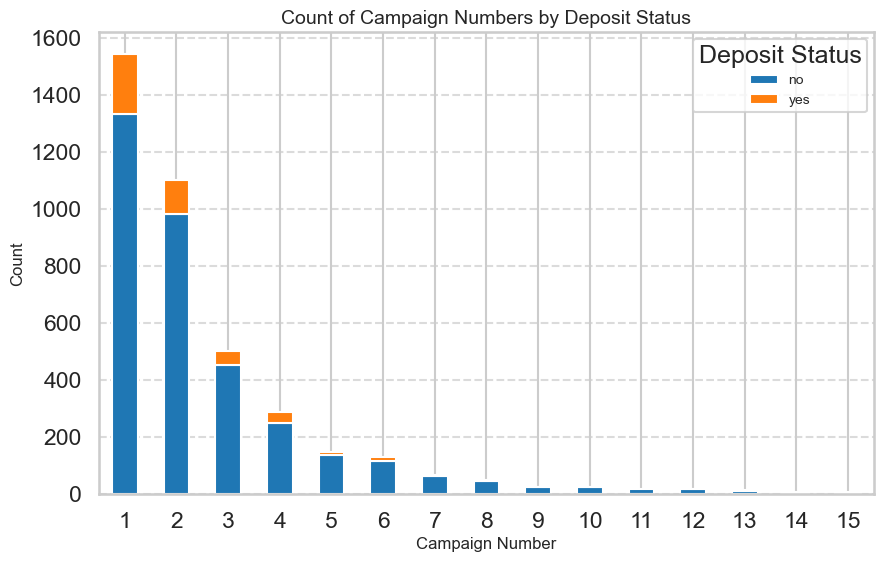

In [75]:

# Group by 'campaign' and calculate the count of each campaign number
campaign_counts = data2.groupby('campaign')['state'].value_counts().unstack().fillna(0)

# # Plot
# campaign_counts.plot(kind='bar', stacked=True)
# plt.xlabel('Campaign Number')
# plt.ylabel('Count')
# plt.title('Count of Campaign Numbers by Customer Status')
# plt.legend(title='Customer Status')
# plt.show()

campaign_counts_filtered = campaign_counts.loc[1:15]


# Plot
campaign_counts_filtered.plot(kind='bar', stacked=True, figsize=(10, 6))  # Adjust figure size
plt.xlabel('Campaign Number', fontsize=12)  # Set x-axis label and adjust font size
plt.ylabel('Count', fontsize=12)  # Set y-axis label and adjust font size
plt.title('Count of Campaign Numbers by Deposit Status', fontsize=14)  # Set title and adjust font size
plt.legend(title='Deposit Status', fontsize=10)  # Set legend title and adjust font size
plt.xticks(rotation=0)  # Rotate x-axis labels to 0 degrees
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.show()

In [76]:
# # Calculate counts for each job and state combination
# job_state_counts = df1.groupby(['job', 'state']).size().reset_index(name='count')


# job_state_counts_sorted = job_state_counts[job_state_counts['state'] == 'yes'].sort_values(by='count', ascending=False)

# # Sort the data in descending order by count
# #job_state_counts_sorted = job_state_counts.sort_values(by='count', ascending=False)
# job_state_counts_sorted

In [77]:
# import pandas as pd

# # Calculate counts for each job and state combination
# conversionsAgeMarital = data_yes.groupby(pd.cut(data_yes['age'], bins=range(20, 71, 10))).apply(lambda x: x.groupby('marital').agg(
#     Count=('age', 'count'),
#     NumConversions=('state', lambda s: (s == 'yes').sum())
# )).reset_index()

# # Calculate TotalCount and ConversionRate
# conversionsAgeMarital['TotalCount'] = conversionsAgeMarital.groupby('age')['Count'].transform('sum')
# conversionsAgeMarital['ConversionRate'] = conversionsAgeMarital['NumConversions'] / conversionsAgeMarital['TotalCount'] * 100

# # Rename AgeGroup
# conversionsAgeMarital['AgeGroup'] = pd.cut(conversionsAgeMarital['age'], bins=range(20, 71, 10))
# conversionsAgeMarital['AgeGroup'] = conversionsAgeMarital['AgeGroup'].astype(str)
# conversionsAgeMarital.loc[conversionsAgeMarital['AgeGroup'] == 'nan', 'AgeGroup'] = '70+'

# # Print the tabulated data
# print(conversionsAgeMarital)


In [78]:
campaign_counts_sorted = campaign_counts.sort_values(by='campaign', ascending=True)
campaign_counts_sorted

state         no    yes
campaign               
1         1333.0  210.0
2          982.0  121.0
3          454.0   49.0
4          250.0   38.0
5          137.0    9.0
6          116.0   15.0
7           62.0    6.0
8           46.0    3.0
9           24.0    2.0
10          24.0    1.0
11          19.0    0.0
12          18.0    1.0
13          12.0    2.0
14           8.0    0.0
15           6.0    0.0
16           7.0    0.0
17           6.0    0.0
18           7.0    0.0
19           2.0    0.0
20           2.0    0.0
21           2.0    0.0
22           2.0    0.0
23           2.0    0.0
24           2.0    1.0
25           4.0    0.0
28           3.0    0.0
29           1.0    0.0
30           1.0    0.0
31           1.0    0.0
32           2.0    0.0
50           1.0    0.0

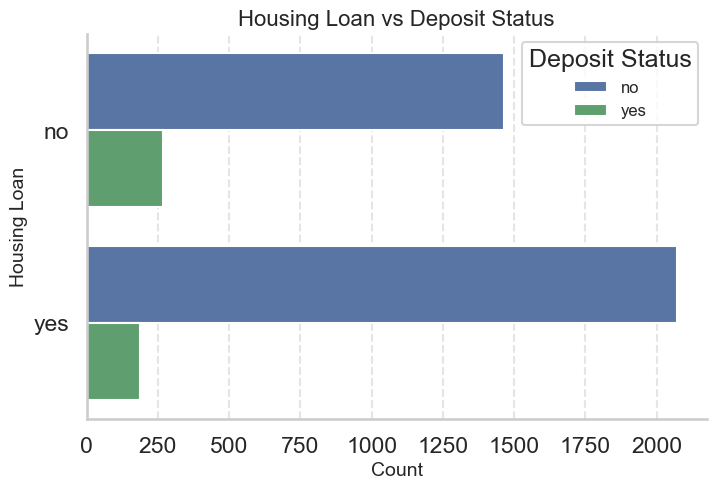

In [79]:
# Set a custom color palette
colors = ['#4c72b0', '#55a868']

# Plot
plt.figure(figsize=(8, 5))  # Adjust plot size
sns.countplot(y='housing', hue='state', data=data2, palette=colors)

# Customize labels and title
plt.xlabel('Count', fontsize=14)
plt.ylabel('Housing Loan', fontsize=14)
plt.title('Housing Loan vs Deposit Status', fontsize=16)

# Increase font size of legend
plt.legend(title='Deposit Status', fontsize=12)

# Add gridlines
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.show()

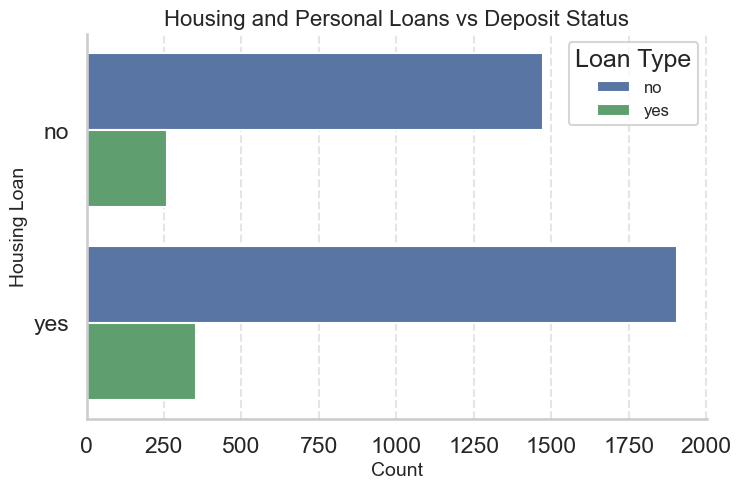

In [80]:
# Set a custom color palette
colors = ['#4c72b0', '#55a868']

# Plot
plt.figure(figsize=(8, 5))  # Adjust plot size
sns.countplot(y='housing', hue='loan', data=data2, palette=colors)  # Change hue to 'loan'

# Customize labels and title
plt.xlabel('Count', fontsize=14)
plt.ylabel('Housing Loan', fontsize=14)
plt.title('Housing and Personal Loans vs Deposit Status', fontsize=16)  # Update title

# Increase font size of legend
plt.legend(title='Loan Type', fontsize=12)

# Add gridlines
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.show()


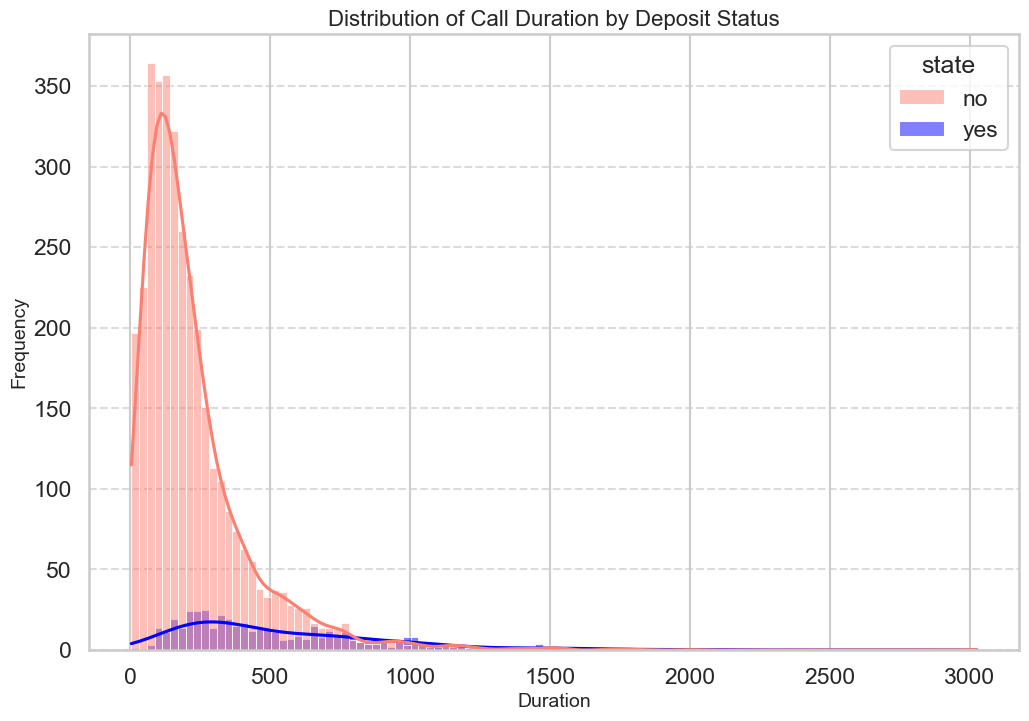

In [81]:
# # Set a custom color palette
custom_palette = {'yes': 'blue', 'no': 'salmon'}

# Beautify the plot
plt.figure(figsize=(12, 8))  # Adjust figure size
sns.histplot(data=data2, x='duration', hue='state', kde=True, palette=custom_palette)
plt.xlabel('Duration', fontsize=14)  # Add x-axis label with adjusted font size
plt.ylabel('Frequency', fontsize=14)  # Add y-axis label with adjusted font size
plt.title('Distribution of Call Duration by Deposit Status', fontsize=16)  # Add title with adjusted font size
#plt.legend(title='Deposit Status', fontsize=12, title_fontsize=14, loc='upper right')  # Adjust legend title and font sizes
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.show()


In [82]:
# Group by 'duration' and 'state' and calculate counts
duration_state_counts = data2.groupby(['duration', 'state']).size().unstack(fill_value=0)

# Display the tabulated data
print(duration_state_counts)

state     no  yes
duration         
4          1    0
5          8    0
6          2    0
7          4    0
8          6    0
...       ..  ...
1994       1    0
2029       0    1
2087       0    1
2769       0    1
3025       1    0

[837 rows x 2 columns]


In [83]:
# Calculate the sum of 'yes' counts for each duration
duration_state_counts['sum_yes'] = duration_state_counts['yes']

# Sort the DataFrame by the sum of 'yes' counts in descending order
duration_state_counts_sorted = duration_state_counts.sort_values(by='sum_yes', ascending=False)

# Drop the 'sum_yes' column as it was only used for sorting
duration_state_counts_sorted.drop(columns='sum_yes', inplace=True)

# Display the sorted tabulated data
print(duration_state_counts_sorted)

state     no  yes
duration         
185       13    4
415        1    3
352        1    3
93         6    3
587        2    3
...       ..  ...
340        6    0
341        5    0
346        2    0
348        2    0
3025       1    0

[837 rows x 2 columns]


In [84]:
print(duration_state_counts_sorted.head(20))


state     no  yes
duration         
185       13    4
415        1    3
352        1    3
93         6    3
587        2    3
161       15    3
213        8    3
223        6    3
224        6    3
250        6    3
328        3    3
261        4    3
388        2    3
397        3    3
429        4    2
232        5    2
386        4    2
222        9    2
215        6    2
796        0    2


In [85]:
# Calculate the weighted average duration for state = yes
weighted_avg_duration = (duration_state_counts_sorted['yes'] * duration_state_counts_sorted.index).sum() / duration_state_counts_sorted['yes'].sum()

print("Average Duration of calls for status = yes:", weighted_avg_duration/60, "mins")

Average Duration of calls for status = yes: 9.161244541484715 mins


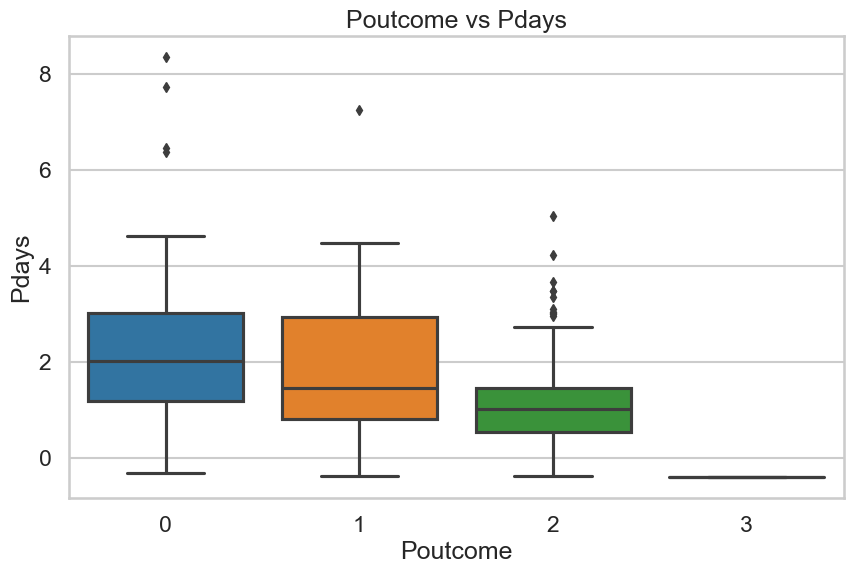

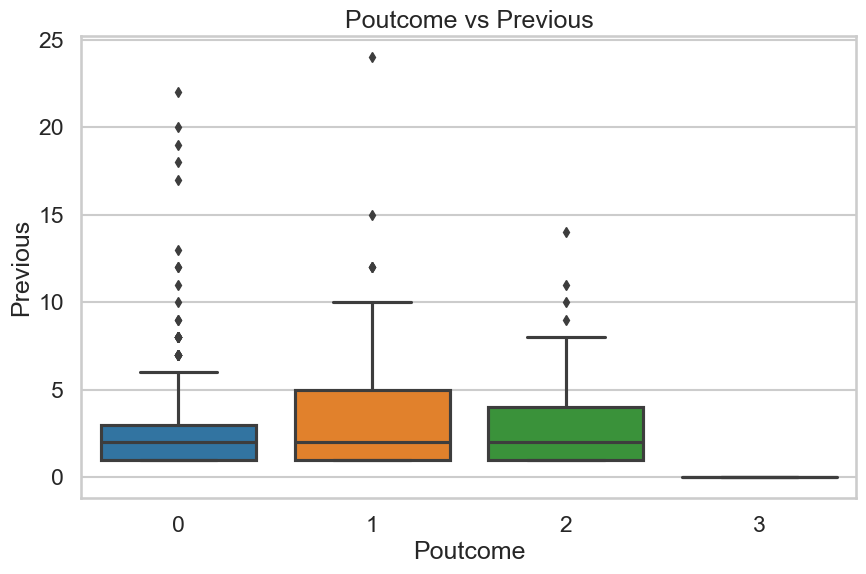

In [86]:
# Plot poutcome vs pdays
plt.figure(figsize=(10, 6))
sns.boxplot(data=data1, x='poutcome', y='pdays')
plt.title('Poutcome vs Pdays')
plt.xlabel('Poutcome')
plt.ylabel('Pdays')
plt.show()

# Plot poutcome vs previous
plt.figure(figsize=(10, 6))
sns.boxplot(data=data1, x='poutcome', y='previous')
plt.title('Poutcome vs Previous')
plt.xlabel('Poutcome')
plt.ylabel('Previous')
plt.show()

In [87]:
# #Calculate the average duration for customers with status 'yes'
# average_duration_yes = duration_state_counts['yes'].mean()

# print("Average duration for customers with status 'yes':", average_duration_yes)

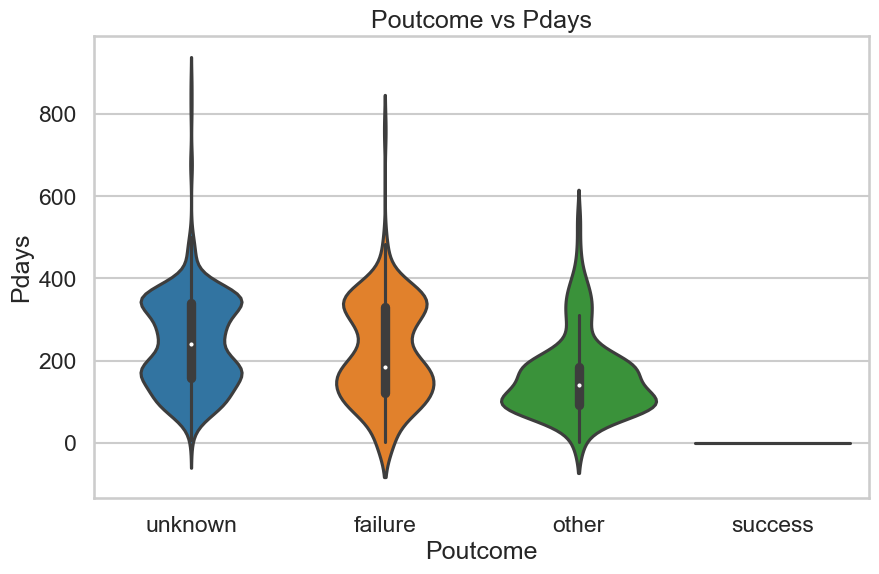

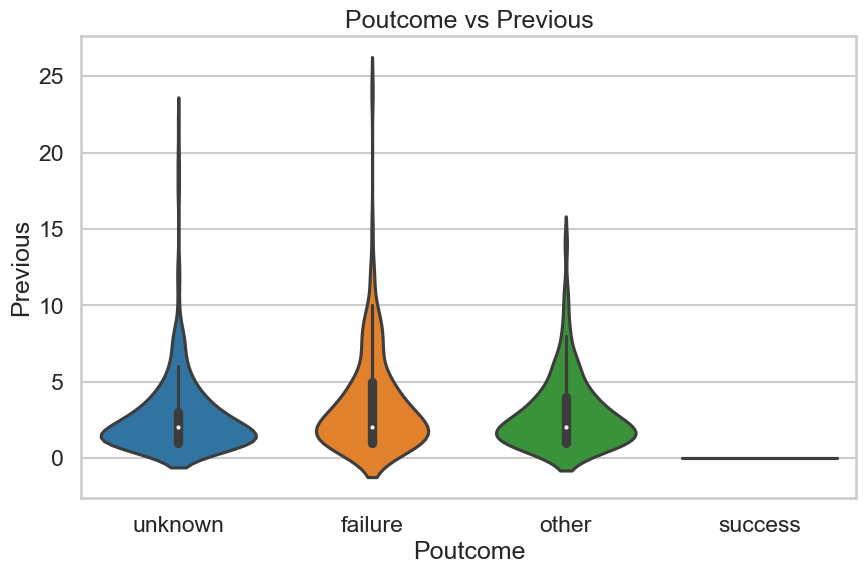

In [88]:
# Define the tick labels
poutcome_labels = ['unknown', 'failure', 'other', 'success']

# Plot poutcome vs pdays with violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='poutcome', y='pdays')
plt.title('Poutcome vs Pdays')
plt.xlabel('Poutcome')
plt.ylabel('Pdays')
plt.xticks(ticks=[0, 1, 2, 3], labels=poutcome_labels)  # Set the custom tick labels
plt.show()

# Plot poutcome vs previous with violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='poutcome', y='previous')
plt.title('Poutcome vs Previous')
plt.xlabel('Poutcome')
plt.ylabel('Previous')
plt.xticks(ticks=[0, 1, 2, 3], labels=poutcome_labels)  # Set the custom tick labels
plt.show()


In [89]:
print(data1['poutcome'].unique())

[3 0 1 2]


In [90]:
# Group the data by 'poutcome' and calculate summary statistics
summary_stats_pdays = data1.groupby('poutcome')['pdays'].describe()
summary_stats_previous = data1.groupby('poutcome')['previous'].describe()

# Print the summary statistics
print("Summary Statistics for Pdays by Poutcome:")
print(summary_stats_pdays)
print("\nSummary Statistics for Previous by Poutcome:")
print(summary_stats_previous)


Summary Statistics for Pdays by Poutcome:
           count      mean           std       min       25%       50%  \
poutcome                                                                 
0          427.0  2.042981  1.148281e+00 -0.325500  1.180742  2.024238   
1          176.0  1.807544  1.212805e+00 -0.375708  0.806692  1.456887   
2          114.0  1.223111  9.703278e-01 -0.385750  0.530548  1.005014   
3         3277.0 -0.405833  1.576757e-14 -0.405833 -0.405833 -0.405833   

               75%       max  
poutcome                      
0         3.018358  8.350455  
1         2.922962  7.245878  
2         1.451866  5.036722  
3        -0.405833 -0.405833  

Summary Statistics for Previous by Poutcome:
           count      mean       std  min  25%  50%  75%   max
poutcome                                                      
0          427.0  2.824356  2.712269  1.0  1.0  2.0  3.0  22.0
1          176.0  3.511364  3.164064  1.0  1.0  2.0  5.0  24.0
2          114.0  2.929825  2

In [91]:
print(data1.head(1))

   age  job  marital  education  default   balance  housing  loan  contact  \
0   30   10        1          0        0  0.123362        0     0        0   

   day   month  duration  campaign     pdays  previous  poutcome  state  
0    19     10 -0.706676         1 -0.405833         0         3      0  


In [92]:
print(data['poutcome'].unique())

['unknown' 'failure' 'other' 'success']


In [93]:
print(data.head(1))

   age         job  marital education default  balance housing loan   contact  \
0   30  unemployed  married   primary      no     1787      no   no  cellular   

   day  month  duration  campaign  pdays  previous poutcome state  cluster  
0    19   oct        79         1     -1         0  unknown    no        0  


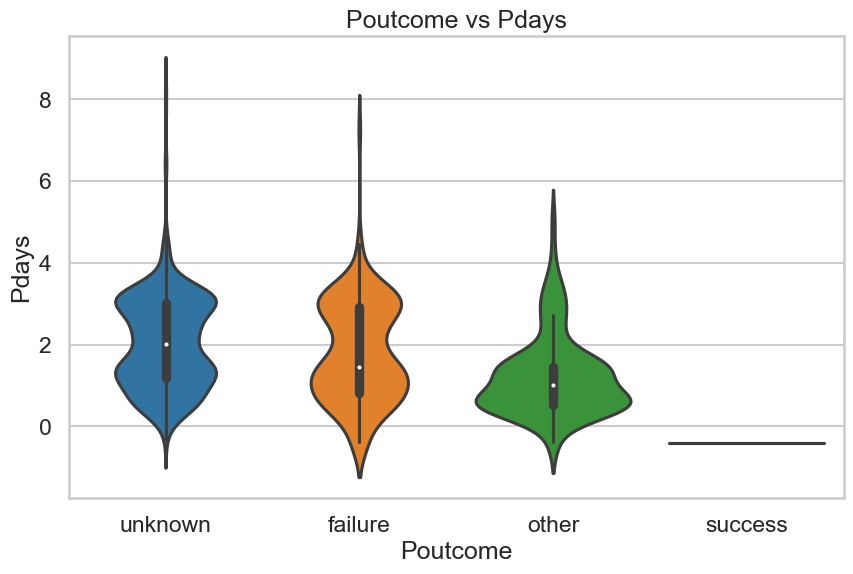

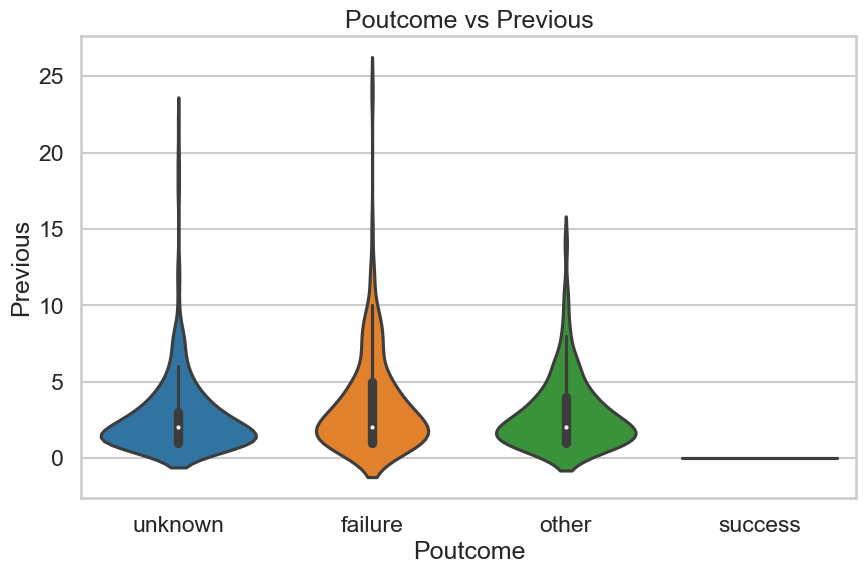

In [94]:
# Define the tick labels
poutcome_labels = ['unknown', 'failure', 'other', 'success']

# Plot poutcome vs pdays with violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=data1, x='poutcome', y='pdays')
plt.title('Poutcome vs Pdays')
plt.xlabel('Poutcome')
plt.ylabel('Pdays')
plt.xticks(ticks=[0, 1, 2, 3], labels=poutcome_labels)  # Set the custom tick labels
plt.show()

# Plot poutcome vs previous with violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=data1, x='poutcome', y='previous')
plt.title('Poutcome vs Previous')
plt.xlabel('Poutcome')
plt.ylabel('Previous')
plt.xticks(ticks=[0, 1, 2, 3], labels=poutcome_labels)  # Set the custom tick labels
plt.show()


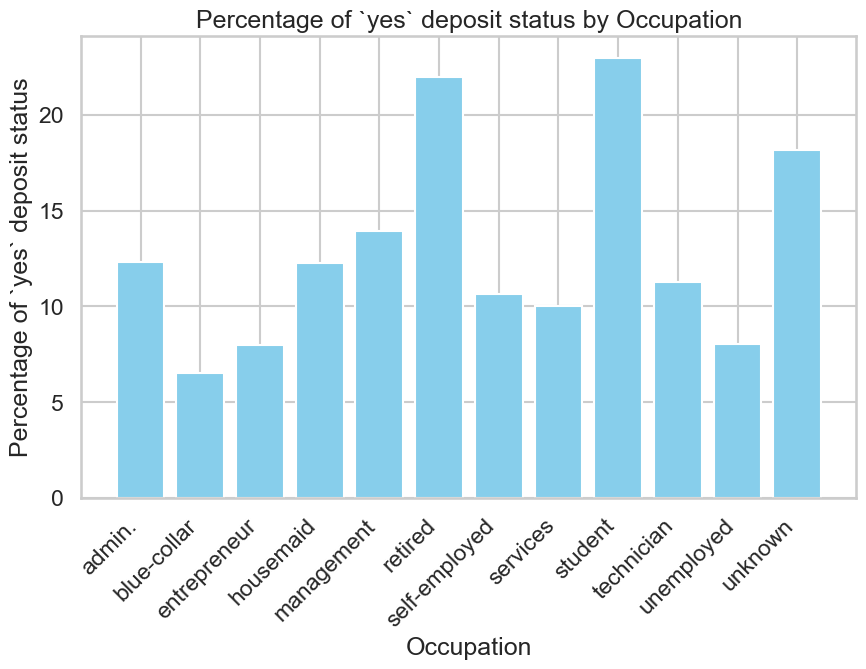

In [95]:
# Group by 'job' and calculate the percentage of 'yes' in each group
percentage_yes_by_job = data.groupby('job')['state'].apply(lambda x: (x == 'yes').mean() * 100).reset_index(name='percentage')

# Plot the percentage of 'yes' by job
plt.figure(figsize=(10, 6))
plt.bar(percentage_yes_by_job['job'], percentage_yes_by_job['percentage'], color='skyblue')
plt.xlabel('Occupation')
plt.ylabel('Percentage of `yes` deposit status')
plt.title('Percentage of `yes` deposit status by Occupation')
plt.xticks(rotation=45, ha='right')
plt.show()

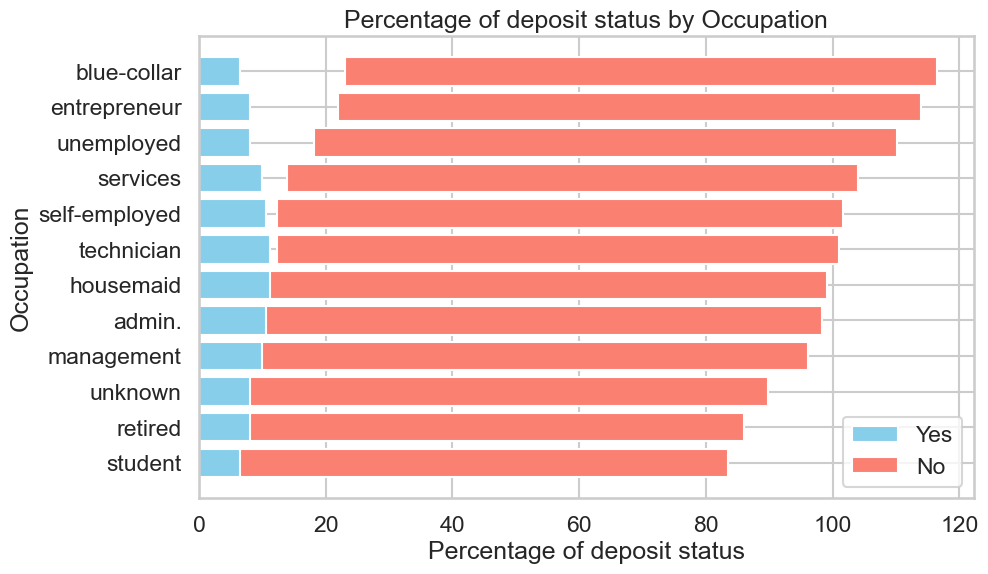

In [104]:
import matplotlib.pyplot as plt

# Group by 'job' and calculate the percentage of 'yes' and 'no' in each group
percentage_yes_by_job = data.groupby('job')['state'].apply(lambda x: (x == 'yes').mean() * 100).reset_index(name='percentage_yes')
percentage_no_by_job = data.groupby('job')['state'].apply(lambda x: (x == 'no').mean() * 100).reset_index(name='percentage_no')

# Sort the dataframe by percentage of 'yes' in descending order
percentage_yes_by_job = percentage_yes_by_job.sort_values(by='percentage_yes', ascending=False)
percentage_no_by_job = percentage_no_by_job.sort_values(by='percentage_no', ascending=False)

# Plot the percentage of 'yes' and 'no' by job as stacked bars
plt.figure(figsize=(10, 6))
plt.barh(percentage_yes_by_job['job'], percentage_yes_by_job['percentage_yes'], color='skyblue', label='Yes')  # 'Yes' status bars
plt.barh(percentage_no_by_job['job'], percentage_no_by_job['percentage_no'], color='salmon', label='No', left=percentage_yes_by_job['percentage_yes'])  # 'No' status bars stacked on top of 'Yes'
plt.xlabel('Percentage of deposit status')
plt.ylabel('Occupation')
plt.title('Percentage of deposit status by Occupation')
plt.legend()
plt.show()


In [105]:
data.state.unique()

array(['no', 'yes'], dtype=object)

In [102]:
percentage_no_by_job

job  percentage
8         student   77.027027
5         retired   78.048780
11        unknown   81.818182
4      management   86.075949
0          admin.   87.674419
3       housemaid   87.755102
9      technician   88.724036
6   self-employed   89.375000
7        services   90.000000
10     unemployed   91.964286
2    entrepreneur   92.000000
1     blue-collar   93.486128

<function matplotlib.pyplot.gca(**kwargs)>

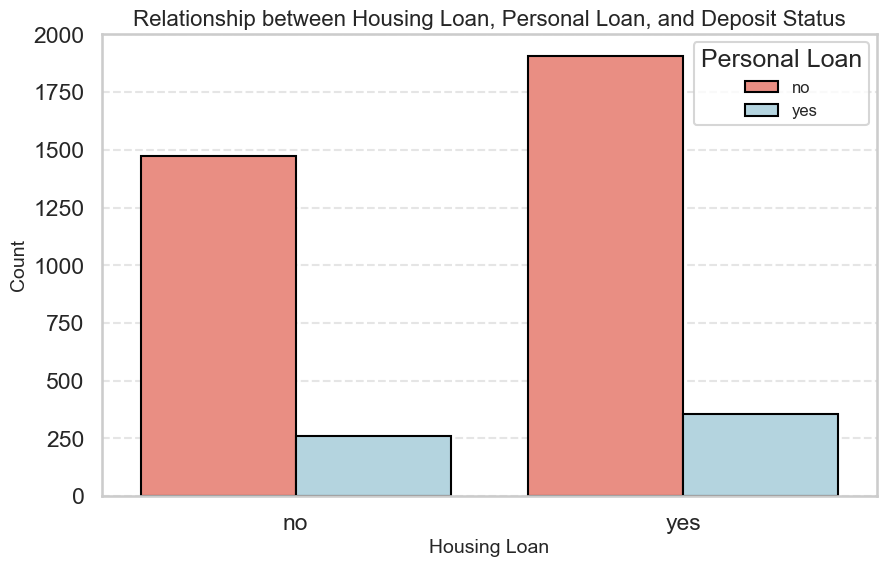

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = {'yes': 'lightblue', 'no': 'salmon'}

# Set the figure size
plt.figure(figsize=(10, 6))

# Grouped bar plot
sns.countplot(data=data2, x='housing', hue='loan', palette=custom_palette, 
              edgecolor='k', linewidth=1.5)

# Customize labels and title
plt.xlabel('Housing Loan', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Relationship between Housing Loan, Personal Loan, and Deposit Status', fontsize=16)

# Increase font size of legend
plt.legend(title='Personal Loan', fontsize=12)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Remove top and right spines
plt.gca


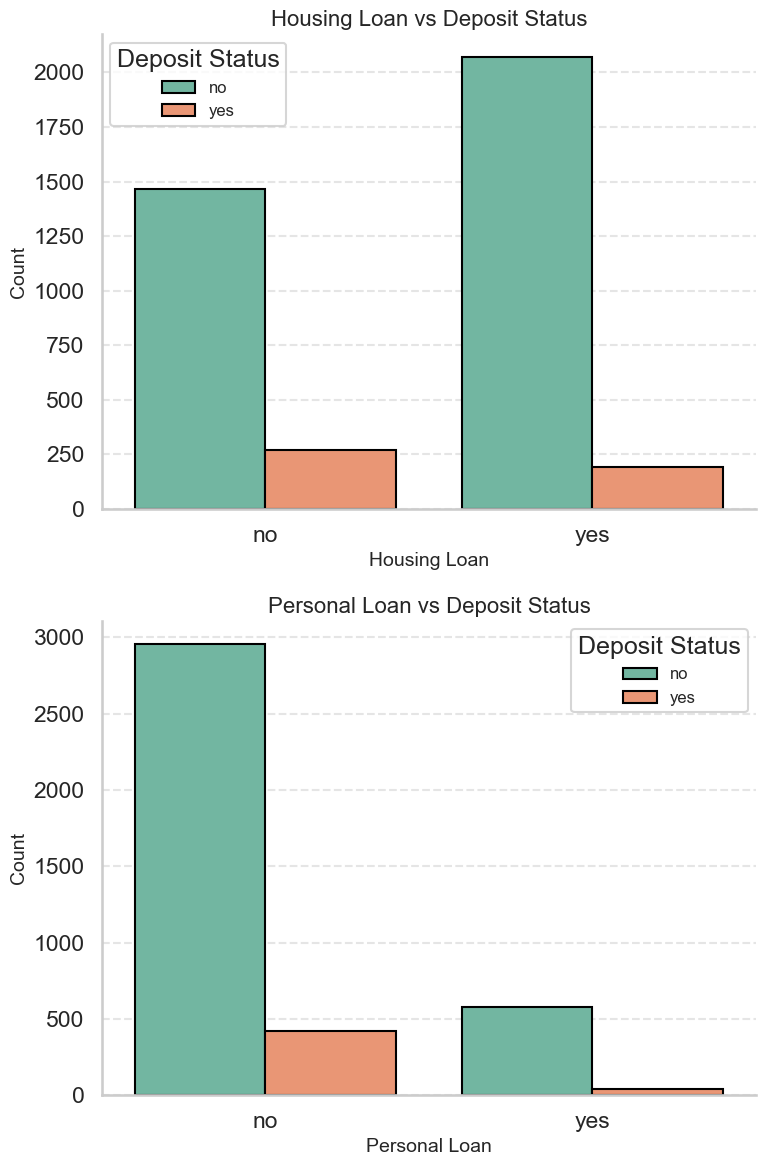

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots arranged vertically
fig, axs = plt.subplots(2, 1, figsize=(8, 12))

# Plot 1: Housing Loan vs Status
sns.countplot(data=data2, x='housing', hue='state', palette='Set2',
              edgecolor='k', linewidth=1.5, ax=axs[0])

# Customize labels and title for Plot 1
axs[0].set_xlabel('Housing Loan', fontsize=14)
axs[0].set_ylabel('Count', fontsize=14)
axs[0].set_title('Housing Loan vs Deposit Status', fontsize=16)
axs[0].legend(title='Deposit Status', fontsize=12)

# Plot 2: Personal Loan vs Status
sns.countplot(data=data2, x='loan', hue='state', palette='Set2',
              edgecolor='k', linewidth=1.5, ax=axs[1])

# Customize labels and title for Plot 2
axs[1].set_xlabel('Personal Loan', fontsize=14)
axs[1].set_ylabel('Count', fontsize=14)
axs[1].set_title('Personal Loan vs Deposit Status', fontsize=16)
axs[1].legend(title='Deposit Status', fontsize=12)

# Add gridlines
for ax in axs:
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()
